<a href="https://colab.research.google.com/github/Nair987/MSc-Project-/blob/main/FinalMScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#Taking CSV file from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Performing Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')
df.head()

Time        V1        V2       V3        V4        V5        V6  \
0 0.000000 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388   
1 0.000000  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361   
2 1.000000 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499   
3 1.000000 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203   
4 2.000000 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28     Amount  Class  
0 -0.021053 149.620000      0  
1  0.014724   2.690000      0  
2 -0.059752 378.660000      0  
3  0.061458 123.500000      0  
4  0.215153  69.990000      0

#Lisitng out the Columnn Names

In [ ]:
column_list = (list(df.columns))
print(column_list)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


#Identifying the different datatypes present in the dataframe

In [ ]:
print("Data types of the columns in the data frame:", df.dtypes)

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
print("Shape of the data frame:", df.shape)

Shape of the data frame: (284807, 31)


#Observing the detailed information about the dataframe

In [ ]:
print("Information about the data frame:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Handling Missing Values

**Checking for any missing values present in each columns**

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total  Percent
Time        0 0.000000
V16         0 0.000000
Amount      0 0.000000
V28         0 0.000000
V27         0 0.000000
V26         0 0.000000
V25         0 0.000000
V24         0 0.000000
V23         0 0.000000
V22         0 0.000000
V21         0 0.000000
V20         0 0.000000
V19         0 0.000000
V18         0 0.000000
V17         0 0.000000
V15         0 0.000000
V1          0 0.000000
V14         0 0.000000
V13         0 0.000000
V12         0 0.000000
V11         0 0.000000
V10         0 0.000000
V9          0 0.000000
V8          0 0.000000
V7          0 0.000000
V6          0 0.000000
V5          0 0.000000
V4          0 0.000000
V3          0 0.000000
V2          0 0.000000
Class       0 0.000000

##Observation

**We can see that there are no missing value present in the dataframe.**

#Outliers treatment

**As the whole dataset is transformed with PCA, so assuming that the outliers are already treated.**

**We are not performing any outliers treatment on the dataframe, though we still see outliers available.**

#Observing the distribution of our class

**Calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent"**

**It then computes the percentage of each class and stores it in "normal_share" and "fraud_share" variables, respectively.**

**Then prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.**

In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


**Computes the percentage of normal and fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.**

**The output includes the percentage of normal transactions and fraudulent transactions, as well as the imbalance percentage between the two.**

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034


In [ ]:
imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Imbalance Percentage = 0.173047500131896


#Data Visualisation

**Creating a figure that displays two subplots side by side, with the left subplot showing the number of transactions in each class (0 or 1) and the right subplot showing the percentage of transactions in each class.**

**Creating bar charts for the two subplots using the 'plot' method of the pandas DataFrame 'classes'. The y-axis label of the left subplot is set to 'Number of Transactions', and the x-axis label is set to 'Class', with a title of 'Number of Class Distributions'. Similarly, the y-axis label of the right subplot is set to 'Percentage of Transactions', and the x-axis label is set to 'Class', with a title of 'Percentage of Distributions'.**

<Figure size 2000x600 with 0 Axes>

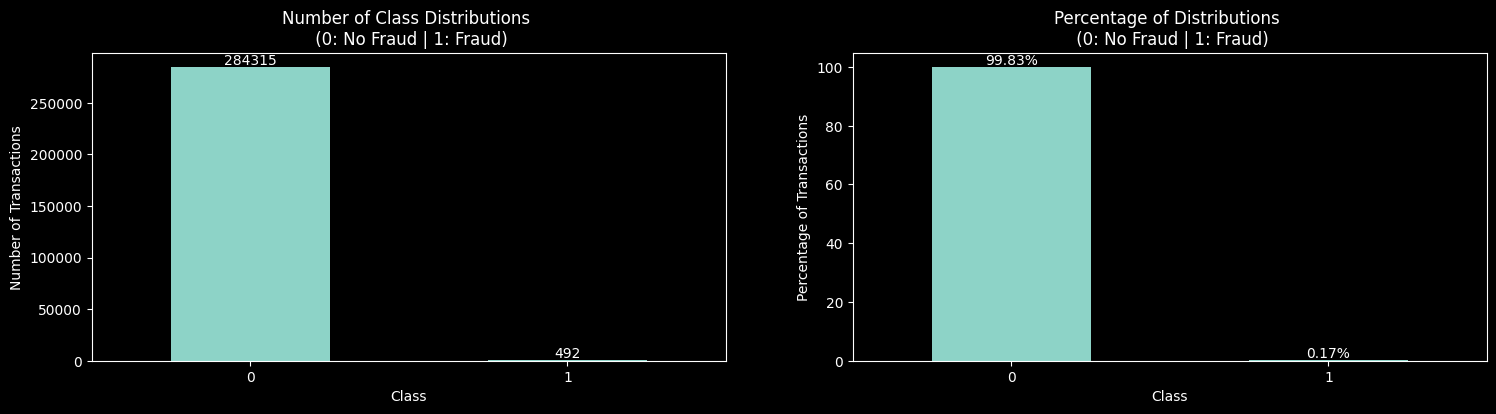

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')

    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')

    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

##Observation

**The dataset has very high imbalance class. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.**

**The percentage of distribution for majority class is 99.83% and minority class is 0.17%**

#Creating a scatter plot of Time vs Class with color-coded points and a legend.

**Creating a scatter plot of the Time variable on the x-axis and the Class variable on the y-axis.**

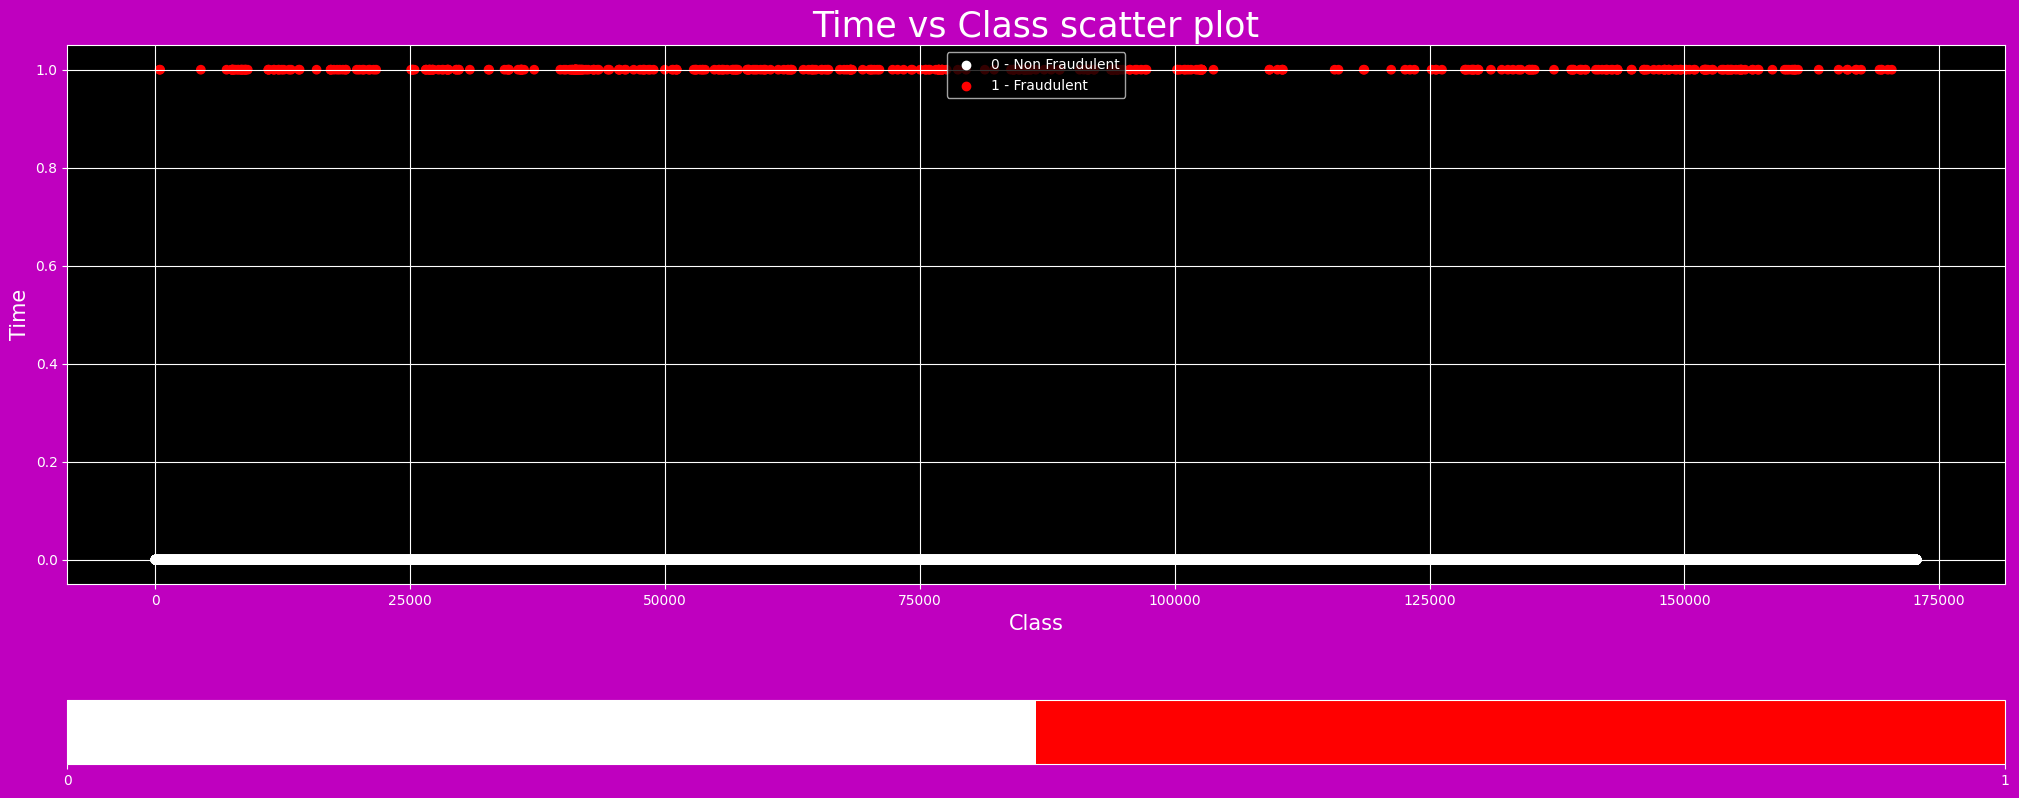

In [ ]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

**The points in the plot are color-coded using the cmap parameter based on whether a transaction is fraudulent or not.**

**A colorbar is added to show the correspondence between color and class.**

**A legend is also added to clarify the colors used for each class.**



##Observation

**There is not much insight which can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.**

#Creating a scatter plot of Amount vs Class with color-coded points and a legend.

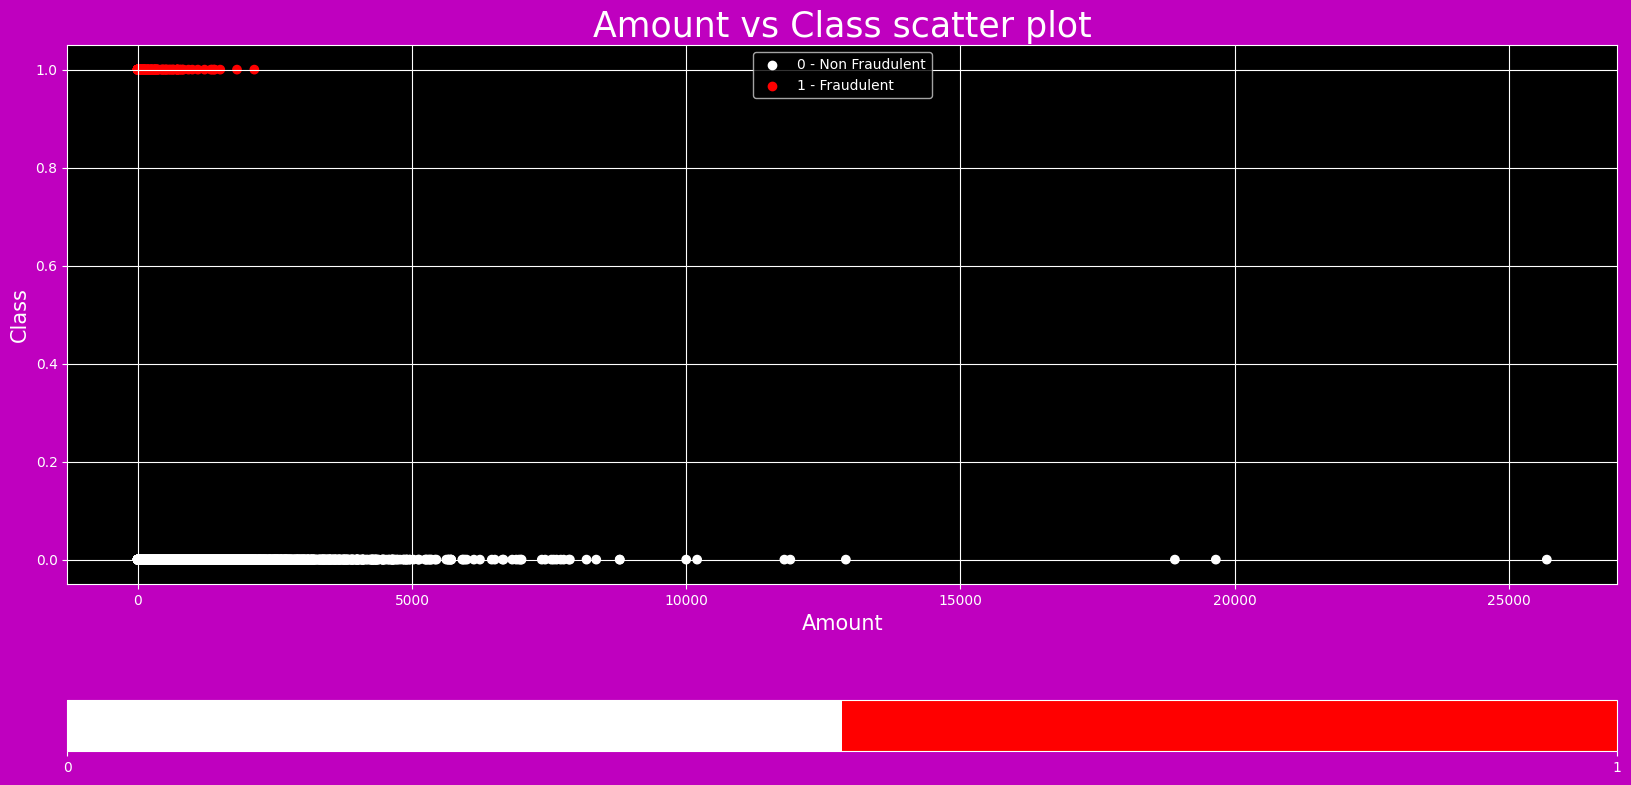

In [ ]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Using the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Setting the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Creating a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

##Observation

**Clearly low amount transactions are more likely to be fraudulent than high amount transaction.**

#Creating correlation matrix plot

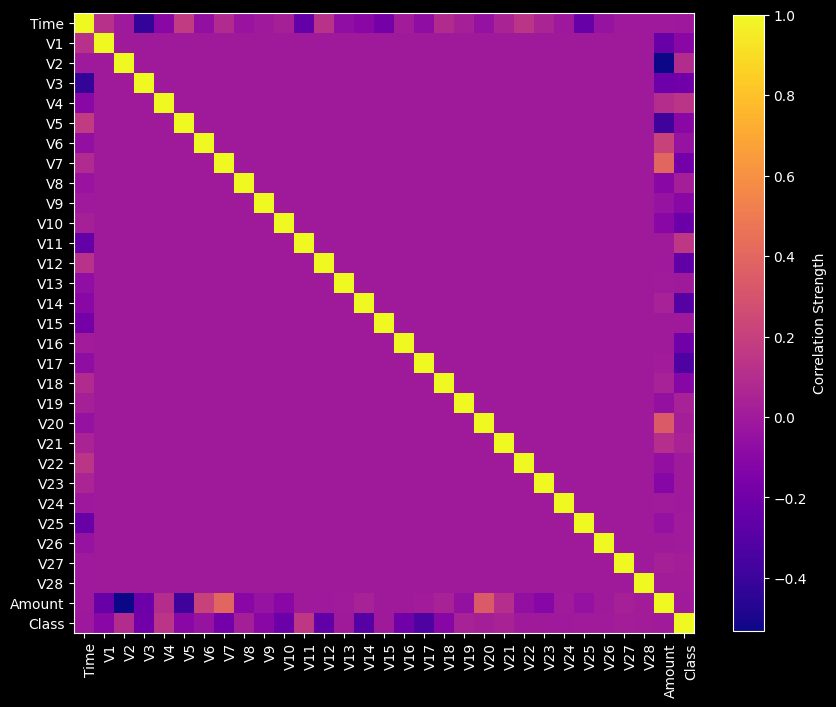

In [ ]:
def corrplot(data):
 with plt.style.context('dark_background'):
      corr = data.corr()
      fig, ax = plt.subplots(figsize=(10, 10))
      im = ax.imshow(corr, cmap='plasma')
      ax.set_xticks(np.arange(len(data.columns)))
      ax.set_yticks(np.arange(len(data.columns)))
      ax.set_xticklabels(data.columns, rotation=90)
      ax.set_yticklabels(data.columns)
      plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
      plt.colorbar(im, aspect=20, shrink = 0.80 , pad = 0.05, label='Correlation Strength')
      plt.show()
corrplot(df)

##Observation

**There are no features but there is high correlatation , corr > .75**

#Plotting the distributions of all the features { Density Plots }

<Figure size 640x480 with 0 Axes>

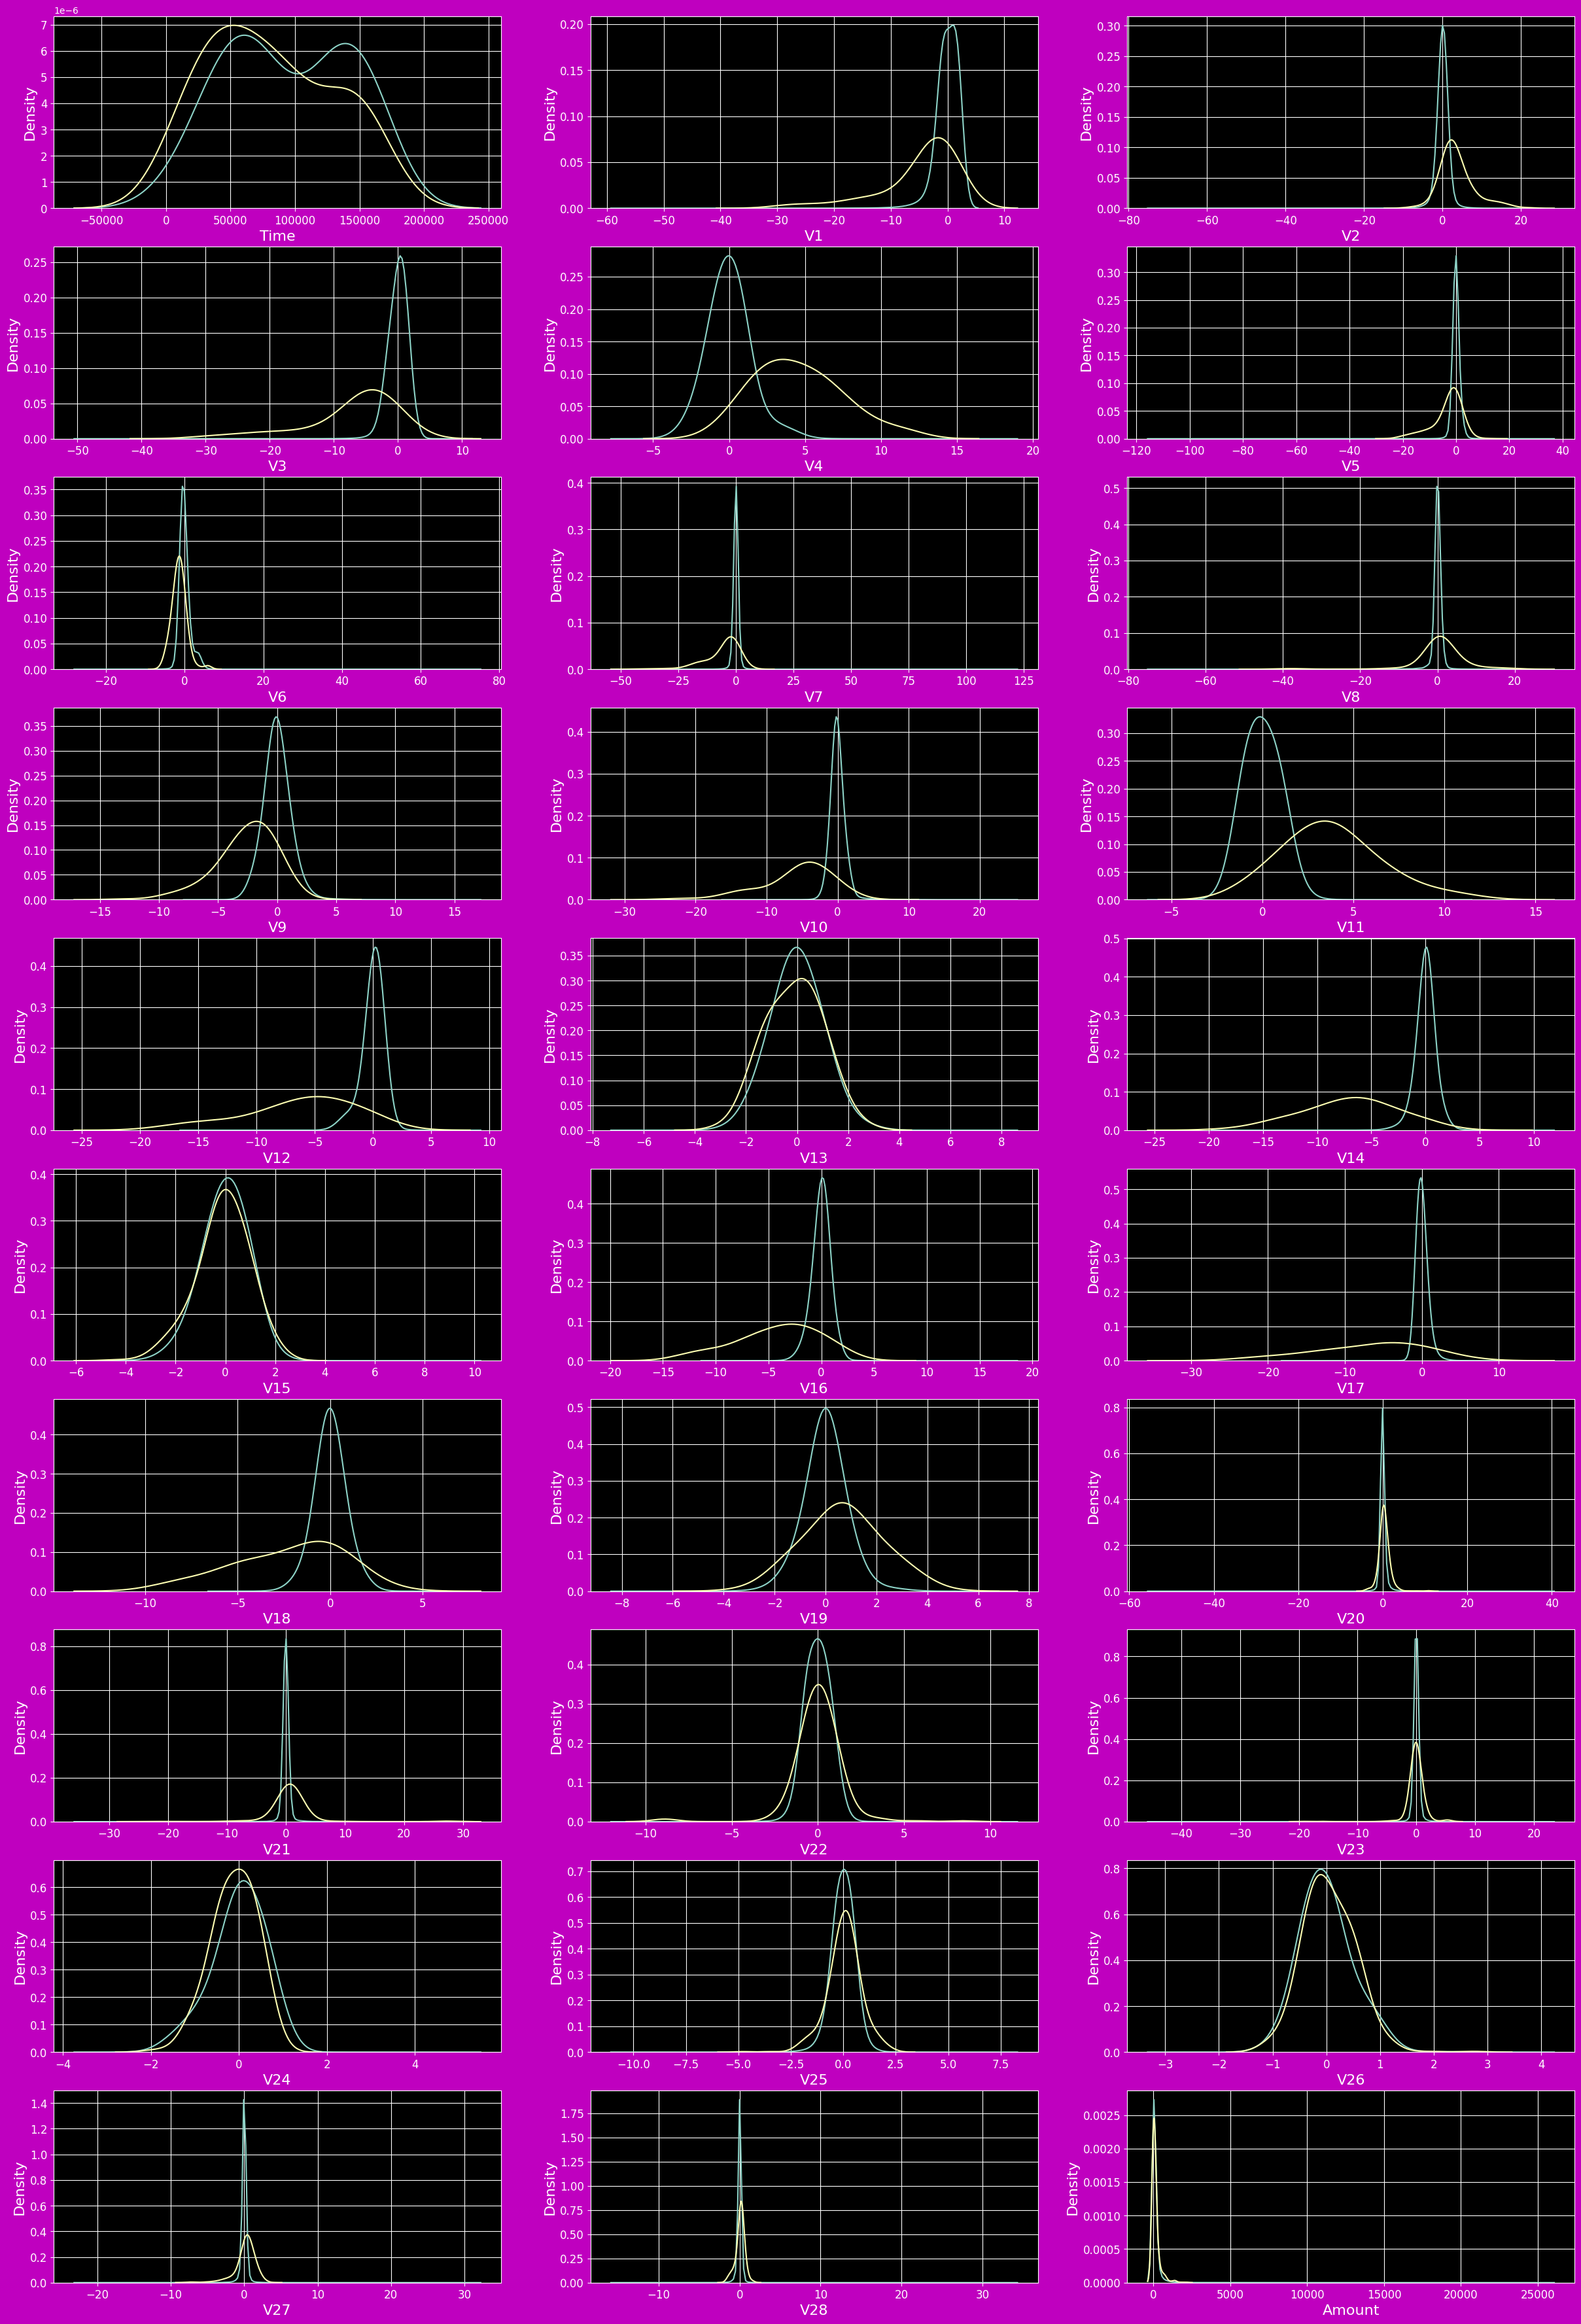

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

##Observation

**Most of the features distributions are overlapping for both the fraud and non-fraud transactions**

Dropping Time column as this feature is not going to help in the model building.

In [ ]:
df = df.drop("Time", axis = 1)
df.head()

V1        V2       V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

      Amount  Class  
0 149.620000      0  
1   2.690000      0  
2 378.660000      0  
3 123.500000      0  
4  69.990000      0

#**Splitting the data into train & test data**

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

#Checking the split of the class label

In [ ]:
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


#Saving the testing set for evaluation

In [ ]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


#**Feature Scaling using RobustScaler Scaler**

**Scalling Amount column**

**As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field**

In [ ]:
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10       V11       V12       V13       V14  \
265518  1.139880  1.406819 -0.157403 -0.113729  0.510277  0.061258 -0.066555   
180305  0.674782  0.045826  0.284864 -0.254903  0.325560 -0.405327  0.721068   
42664  -5.037523  0.000772 -2.009561 -0.386845  1.820161  0.747777  0.122746   
198723  0.010010 -1.118447  1.756121  0.093136 -0.722450 -0.468757 -0.195288   
82325  -0.113817 -0.044782 -0.558955 -0.251076 -0.054708 -0.782698  0.134659   

             V15       V16       V17       V18       V19       V20       V21  \
265518  1.328702  0.352514 -0.765670  0.141938 -0.451365 -0.134435  0.076197   
180305 -0.148445 -0.754029 -0.270842 -0.695698 -0.274411 -0.227279  0.038628   
42664  -1.723285  1.123344 -0.724616  0.147255  0.004631  1.280856 -2.798352   
198723 -0.638683 -0.065888  0.072781  0.768237  0.257424 -0.490642 -0.139670   
82325  -0.483007 -2.096099 -0.399525  1.597589 -0.082746 -0.275297 -0.243245   

             V22       V23       V24       V25       V26       V27       V28  \
265518  0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
180305  0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
42664   0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   
198723  0.077013  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005   
82325  -0.173298 -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   

          Amount  
265518 -0.204315  
180305 -0.264579  
42664   2.130828  
198723 -0.221294  
82325   0.892136

In [ ]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020  0.013918  
11378  -0.141267  
147283  0.752540  
219439 -0.292415  
36939  -0.285317

#Checking Skewness

* **Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal. The normal distribution has a skewness of 0. Skewness tell us about distribution of our data.**

 * **Effects of skewed data: Degrades the model's ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values.**


**Plotting the distribution of a variable**

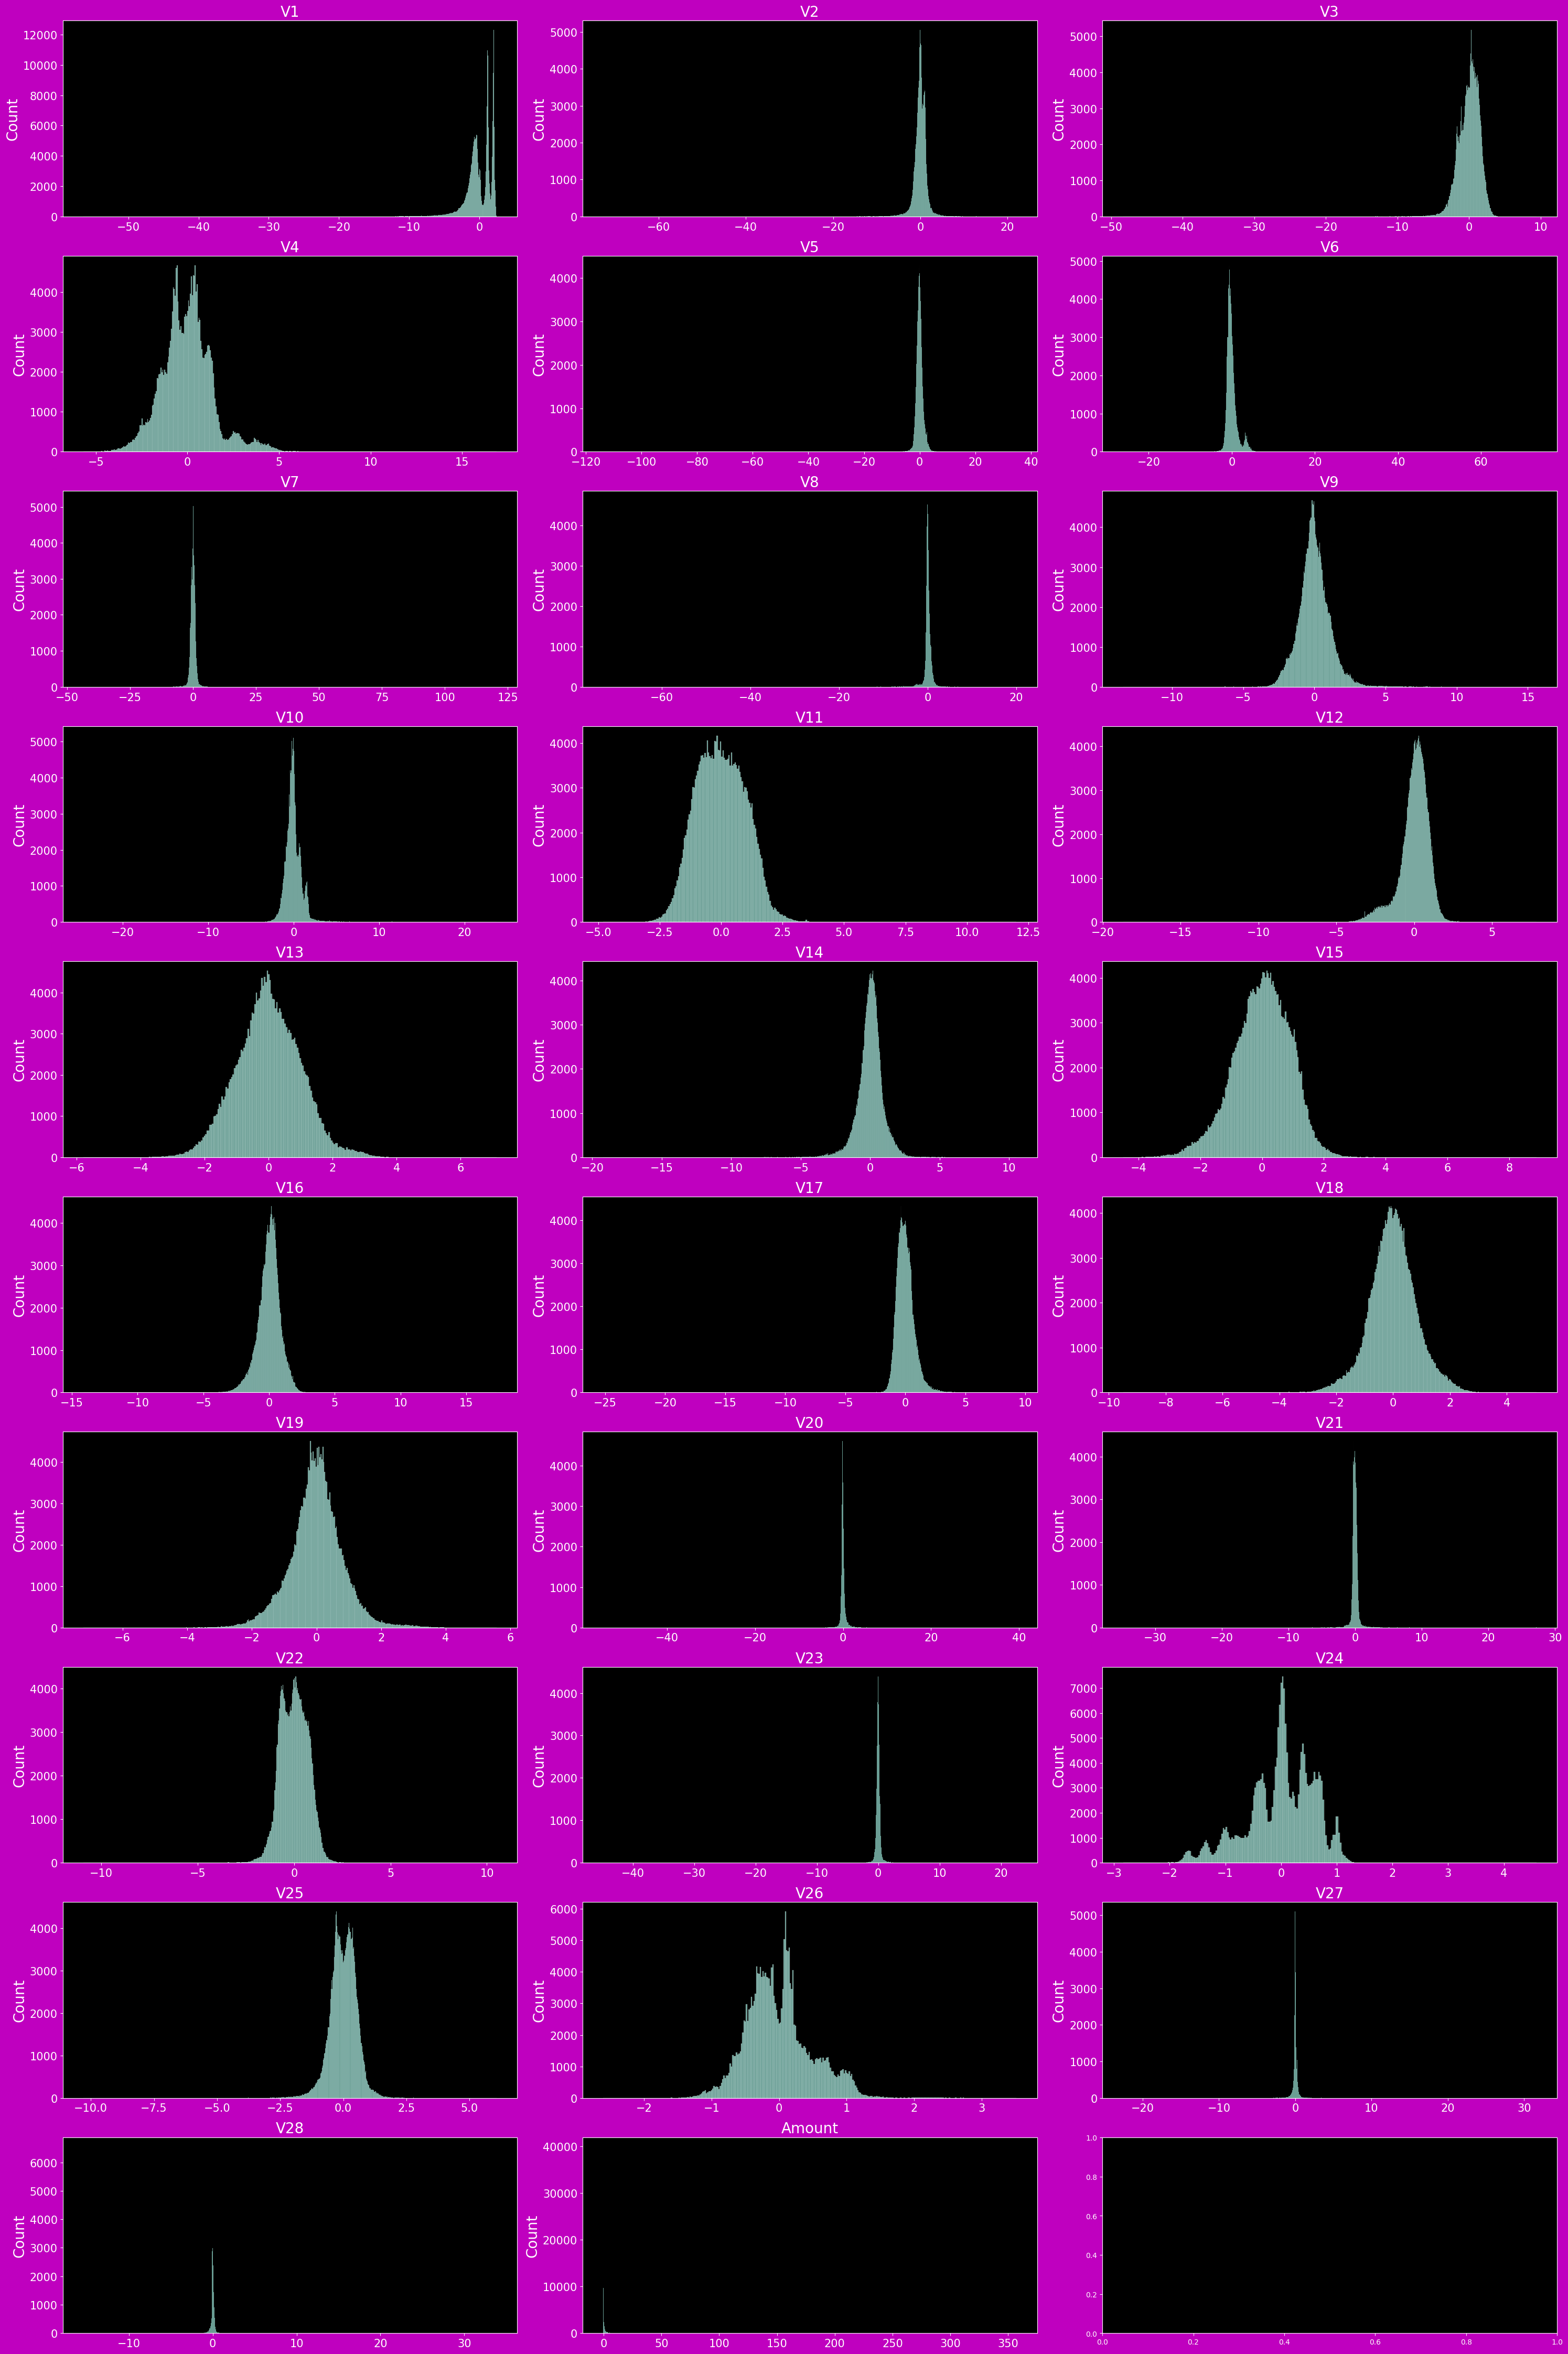

In [ ]:
var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20)
            ax.set_ylabel("Count", fontsize=20)  # setting ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15)
            ax.set_xlabel('') # setting empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

##Observations

**Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.**

#Checking the skewness of the features

In [ ]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

Skewness
Features          
V1       -3.306334
V2       -4.779484
V3       -2.247962
V4        0.687574
V5       -2.786851
V6        1.937381
V7        3.152665
V8       -8.639485
V9        0.541869
V10       1.132688
V11       0.354102
V12      -2.286654
V13       0.064819
V14      -1.969112
V15      -0.308419
V16      -1.077909
V17      -3.733377
V18      -0.254948
V19       0.106133
V20      -1.960492
V21       3.490183
V22      -0.219171
V23      -6.258558
V24      -0.549854
V25      -0.436292
V26       0.574980
V27      -0.890209
V28       9.978409
Amount   18.193943

##Observation

**There is skewness present in the distribution**
* **Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian**

#Filtering the features which has skewness less than -1 and greater than +1

In [ ]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

#Treating Skewness

In [ ]:
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creating an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [ ]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(227845, 29)
(227845,)


**Visualization of Data after Treating skewness**

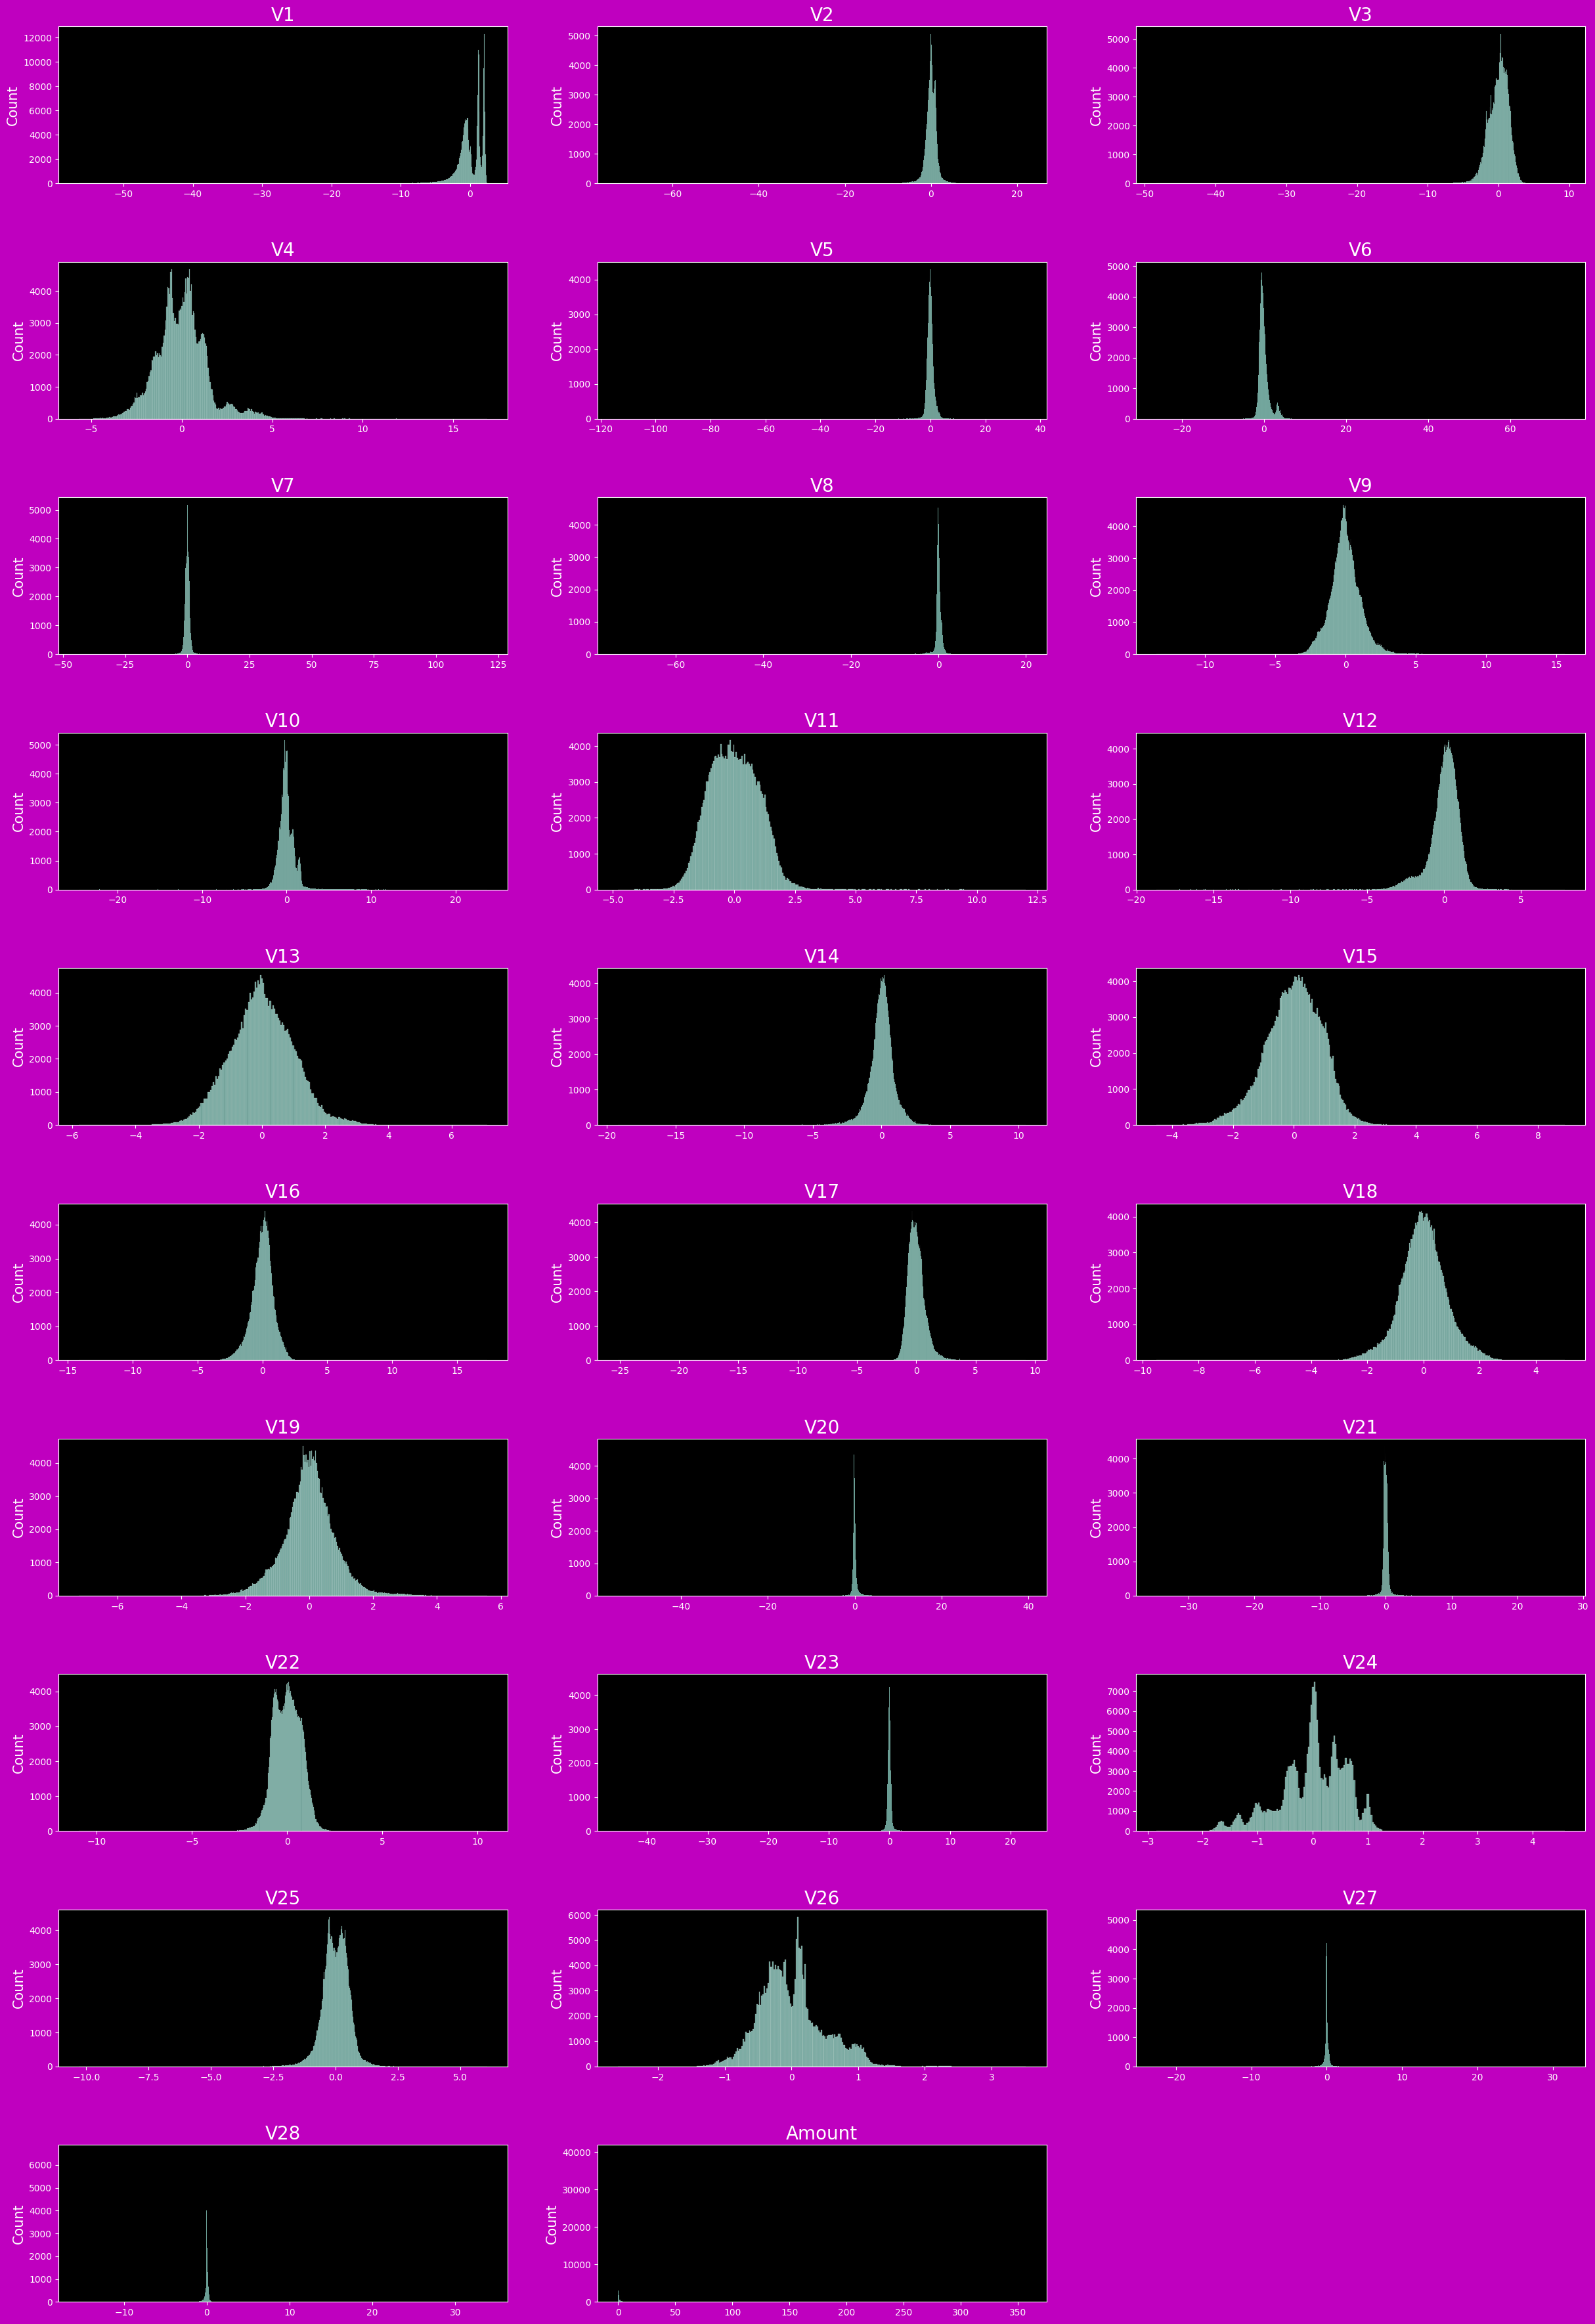

In [ ]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m')
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i)
        sns.histplot(X_train[col], ax=ax)
        ax.set_title(col, fontsize=20)
        ax.set_ylabel('Count', fontsize=15)
        ax.set_xlabel('')
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    plt.show()

#**Model Building with the imbalanced data**

**Going to build models on the below mentioned algorithms , then comparing the best model.**

**1.Logistic Regression**

**2.KNN**

**3.SVM**

**4.Decision Tree**

**5.Random Forest**

**6.XGBoost**

#**Metric selection on the imbalance data**

**We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.**

In [ ]:
y_train.value_counts()/y_train.shape

0   0.998271
1   0.001729
Name: Class, dtype: float64

**Creating a Stratified Cross Validation Scheme & Performing a GridSearchCV after narrowing the range of best model**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


#**Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



======================================Logistic Regression Classifier:=======================================


C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.844348669052124 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.8118886947631836 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.8003761768341064 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002


------------------------------------------------------------------------------------------------------------


C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.85

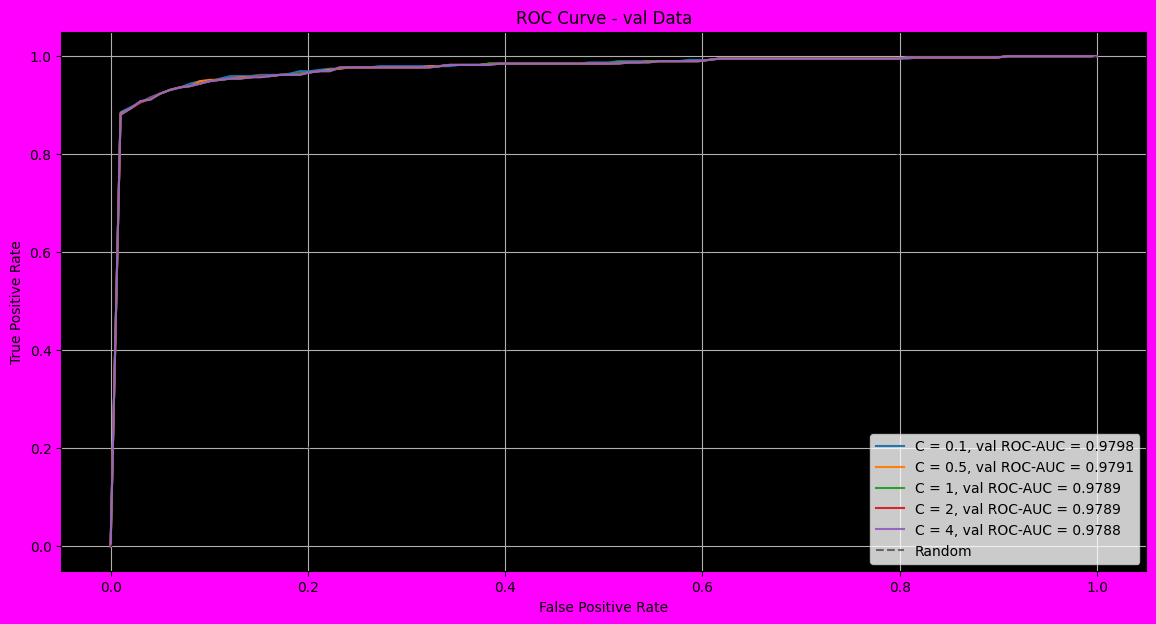

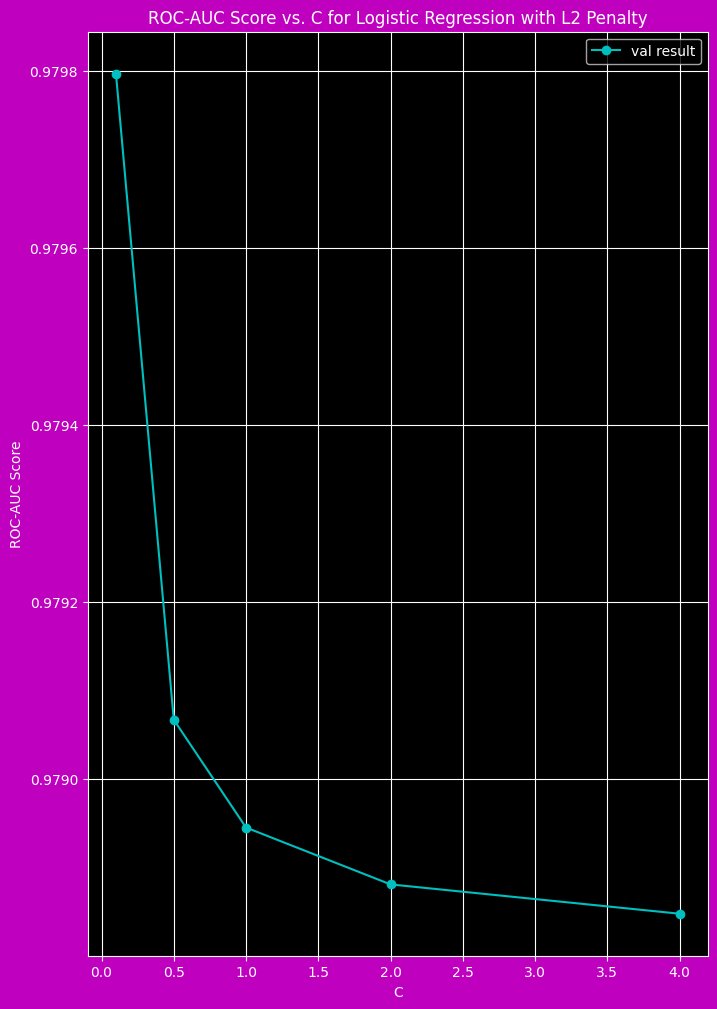





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]


Best C: 0.1


Best Mean ROC-AUC score for val data: 0.9797969874466093


Mean precision val score for best C 0.885478588591554


Mean recall val score for best C 0.6295975017349064


Mean f1 val score for best C 0.7341406860856002






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("======================================Logistic Regression Classifier:=======================================")
print("\n")
# Defining our values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates to train and val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))

        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores to val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

print("\n")
print("===============================Logistic Regression Has Run Successfully:====================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")
# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")


**B. Performing Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
#printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")
#printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Time taken: 6.61 seconds


Best ROC AUC score:  0.9812052138770543


Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


##**Observations**

**We're seeing a nan value for the score when using the GridSearchCV function in scikit-learn, it typically indicates that the model did not converge or encountered some numerical instability during the training process.**

**This can happen for a variety of reasons, such as**

**1.An insufficient number of iterations,**

**2.A learning rate that's too high or too low,**

**3.A dataset that has features with a wide range of values.**

#**Performing KNN Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 10.821098804473877 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 11.450348377227783 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 10.781638622283936 seconds
Mean ROC-AUC for train data: 0.9999479085933528
Mean ROC-AUC for val data: 0.9110686212594891
------------------------------------------------------------------------------------------------------------


=================================KNN Classifier Has Run Successfully:=======================================


------------------------------------------------------------------------------------------------------------


===================

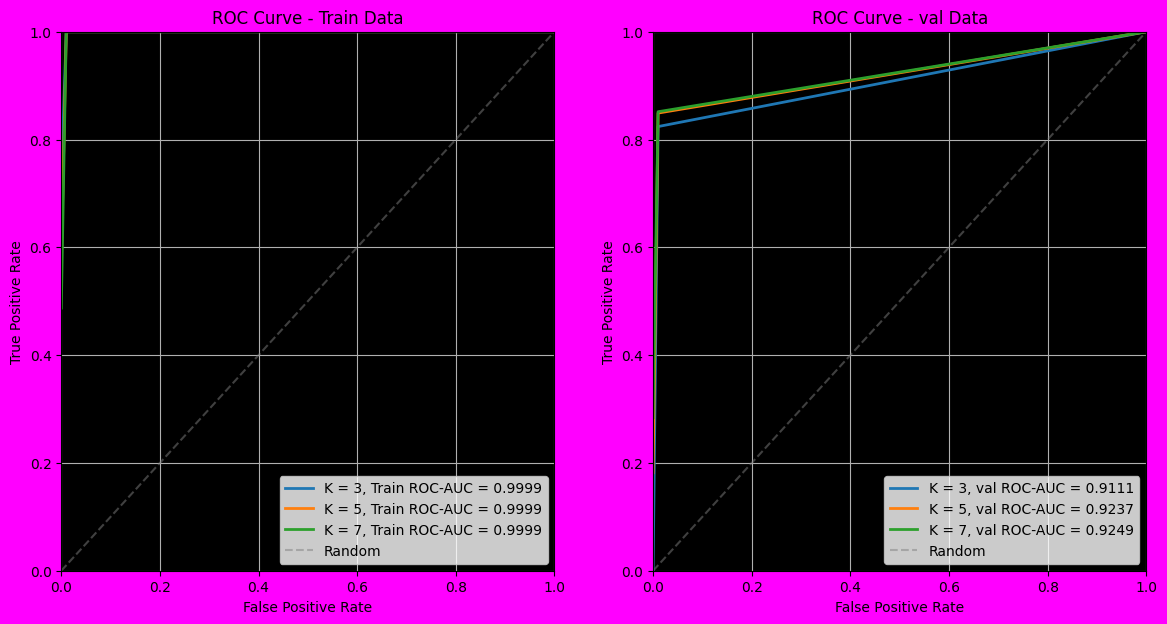

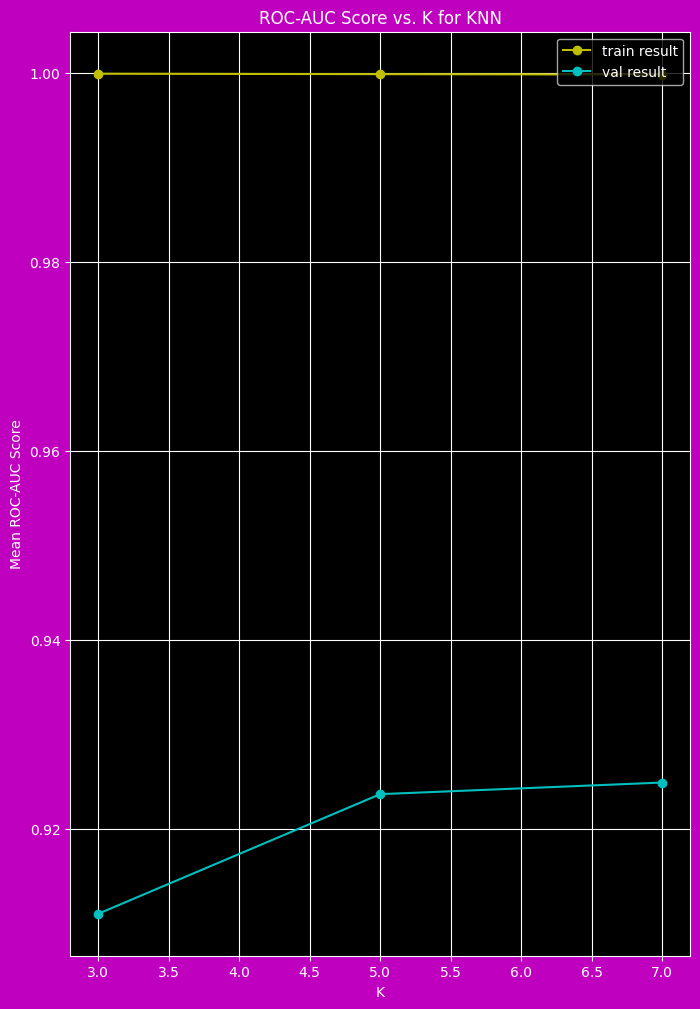





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of K: 
 [0.9999479085933528, 0.9999030150193778, 0.9998607640754523]
Mean ROC-AUC scores for val data for all values of K: 
 [0.9110686212594891, 0.9237188714312442, 0.9249482980359366]


Best K: 7


Best Mean ROC-AUC score for val data: 0.9249482980359366






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining our values of K (number of neighbors)

K_values = [3, 5, 7]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# Creating subplots for ROC curves

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Defining the KFold object


# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = knn_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0]

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0]

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_fpr_train = mean_fpr
    ax1.plot(mean_fpr_train, mean_tpr_train, linestyle='-', lw=2, label='K = ' + str(k) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)).format(k))

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)).format(k))

    print("Mean ROC-AUC for train data:", mean_roc_auc_train)
    print("Mean ROC-AUC for val data:", mean_roc_auc_val)


    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("=================================KNN Classifier Has Run Successfully:=======================================")
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")
    print("======================================Plotting the ROC AUC Curve:===========================================")
    print("\n")

# Plotting ROC curves for train and val data

ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc='lower right')
ax1.grid(True)  # Adding grid to the plot

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score vs. K for KNN')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for train data for all values of K: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_k = K_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Euclidean distance is a good choice for problems where the variables have similar importance and are measured in the same scale. On the other hand, Manhattan distance is a good choice when variables have different scales or when you want to penalize differences in some variables more heavily than others.**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for KNN

params = {'n_neighbors': [5, 7, 9], 'metric': ['euclidean', 'manhattan']}


# Creating  a KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

#printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Time taken: 3031.69 seconds
Best ROC AUC score:  0.9274613536399045
Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 9}


In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.9237188714312442
{'metric': 'euclidean', 'n_neighbors': 7} 0.9249482980359366
{'metric': 'euclidean', 'n_neighbors': 9} 0.9261800797907048
{'metric': 'manhattan', 'n_neighbors': 5} 0.9199133911827756
{'metric': 'manhattan', 'n_neighbors': 7} 0.9249464674108103
{'metric': 'manhattan', 'n_neighbors': 9} 0.9274613536399045

Rank of each hyperparameter combination:
1 {'metric': 'euclidean', 'n_neighbors': 5}
2 {'metric': 'euclidean', 'n_neighbors': 7}
3 {'metric': 'euclidean', 'n_neighbors': 9}
4 {'metric': 'manhattan', 'n_neighbors': 5}
5 {'metric': 'manhattan', 'n_neighbors': 7}
6 {'metric': 'manhattan', 'n_neighbors': 9}

Standard deviation of test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.008173267654223946
{'metric': 'euclidean', 'n_neighbors': 7} 0.009939580795531786
{'metric': 'euclidean', 'n_neighbors': 9} 0.009497669930691913
{'metric': 'manhattan', 'n_neighbors': 5} 0.006252931353180843
{'metric': 'manhattan'

#**Performing SVM Classifier**

**Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



=============================================SVM Classifier:================================================


C = 0.1 Kernel = rbf
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 2949.979889392853 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 2766.841893672943 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 3103.2891988754272 seconds
ROC-AUC Score for train data = 0.9991621768007429


ROC-AUC Score for val data = 0.9557423977242937


------------------------------------------------------------------------------------------------------------


C = 1 Kernel = rbf
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 731.3885748386383 seconds
Train: [     0      1      2 ... 227842 227843 227844

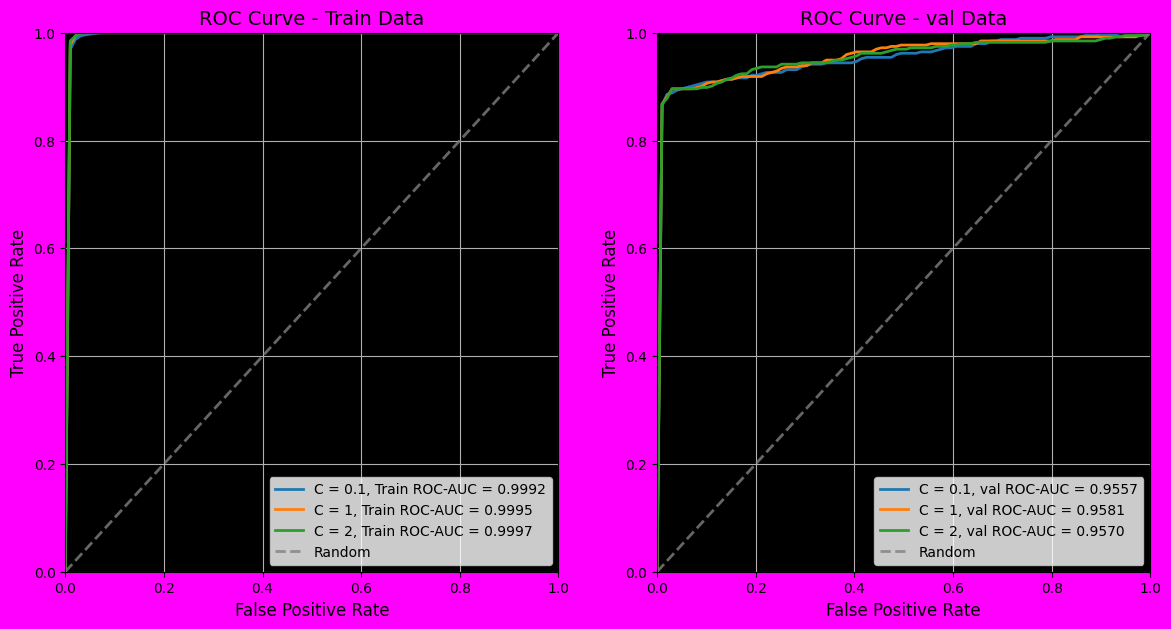

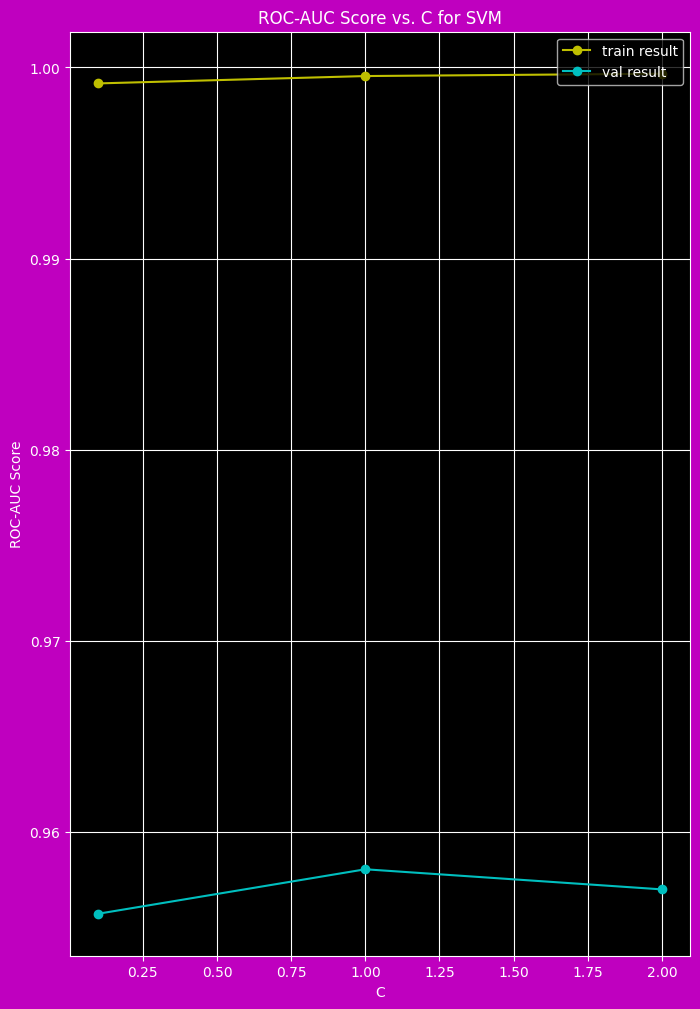





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for train data for all values of C: 
 [0.9991621768007429, 0.9995467697650952, 0.9996688377423705]


Mean ROC-AUC scores for val data for all values of C: 
 [0.9557423977242937, 0.9580665640884014, 0.9570148341035694]


Best C: 1


Best Mean ROC-AUC score for val data: 0.9580665640884014










In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("=============================================SVM Classifier:================================================")
print("\n")

# Defining our values of C

C_values = [0.1, 1, 2]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = svm_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")

    # Plotting ROC curves for train data

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='C = {}, Train ROC-AUC = {:.4f}'.format(c, mean_roc_auc_train))

    # Plotting ROC curves for val data

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))
print("\n")
print("=========================================SVM Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")
print("\n")

# Setting plot properties for train data

ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve - Train Data', fontsize=14)
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

# Setting plot properties for val data

ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of C

print("Mean ROC-AUC scores for train data for all values of C: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("\n")
print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Defining the SVM classifier

svm_classifier = svm.SVC()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        pre_dispatch = 6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 764.58 seconds
Best ROC AUC score:  0.9565173998635063
Best hyperparameters:  {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
cv_results = model_GridSearch.cv_results_

# Prints the mean test scores for each hyperparameter combination

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Prints the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Prints the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9565173998635063
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9555807607718613

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.012505854322583103
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.009905889149890136


#**Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



==============================================Decision Tree:================================================


Max Depth = 1
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.0661475658416748 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.9993298053741455 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.0029094219207764 seconds
ROC-AUC Score for val data = 0.8260369152950421


Mean precision val score: 0.7687499999999999


Mean recall val score: 0.6524211581463489


Mean f1 val score: 0.7037697164558141


------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.8652098178

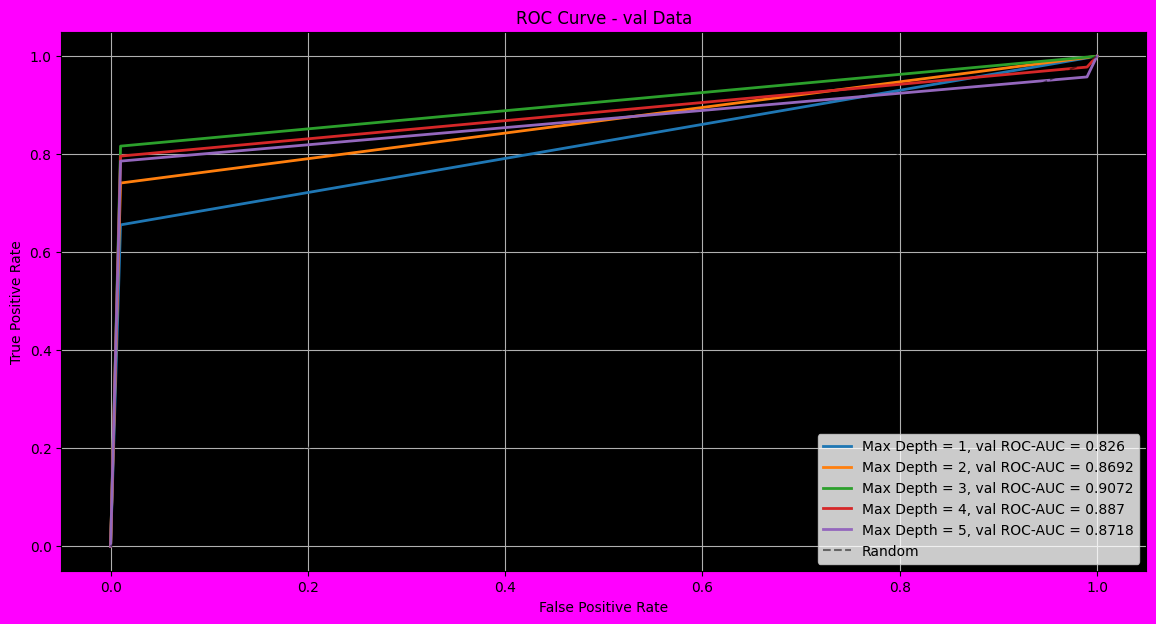

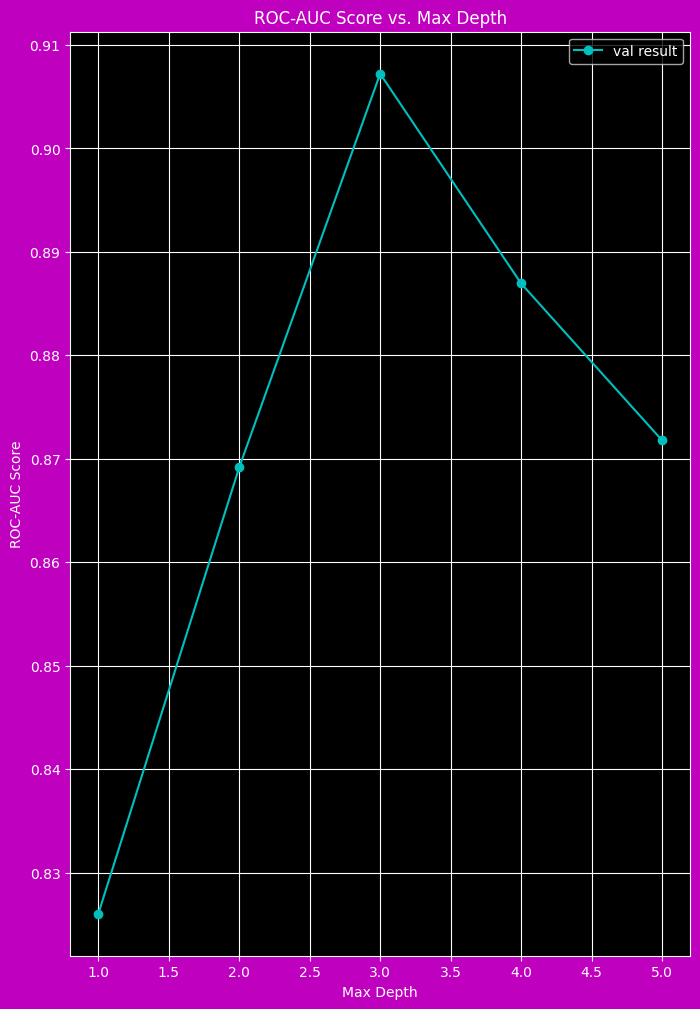





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8260369152950421, 0.869181657800751, 0.9072181066158983, 0.886952322308305, 0.8717966229071088]


Best Max Depth: 3


Best Mean ROC-AUC score for val data: 0.9072181066158983


Mean precision val score for best C 0.8375089694761826


Mean recall val score for best C 0.720853573907009


Mean f1 val score for best C 0.7742228800726004






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")
print("\n")
print("==============================================Decision Tree:================================================")
print("\n")

# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")

**Narrowing max depth to 2,3,4**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Defining the parameters to be tuned

params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Printing the time taken to fit the model

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 34.00 seconds
Best ROC AUC score:  0.9337472016466822
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 3, 'min_samples

#**Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



================================================Random Forest:==============================================


n_estimators = 10
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 18.02935481071472 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 16.811784267425537 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 17.56156301498413 seconds
ROC-AUC Score for train data = 0.9999990847004879


ROC-AUC Score for val data = 0.9234927960929838


------------------------------------------------------------------------------------------------------------


n_estimators = 50
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 85.06820750236511 seconds
Train: [     0      1      2 ... 227842 227843 227844] va

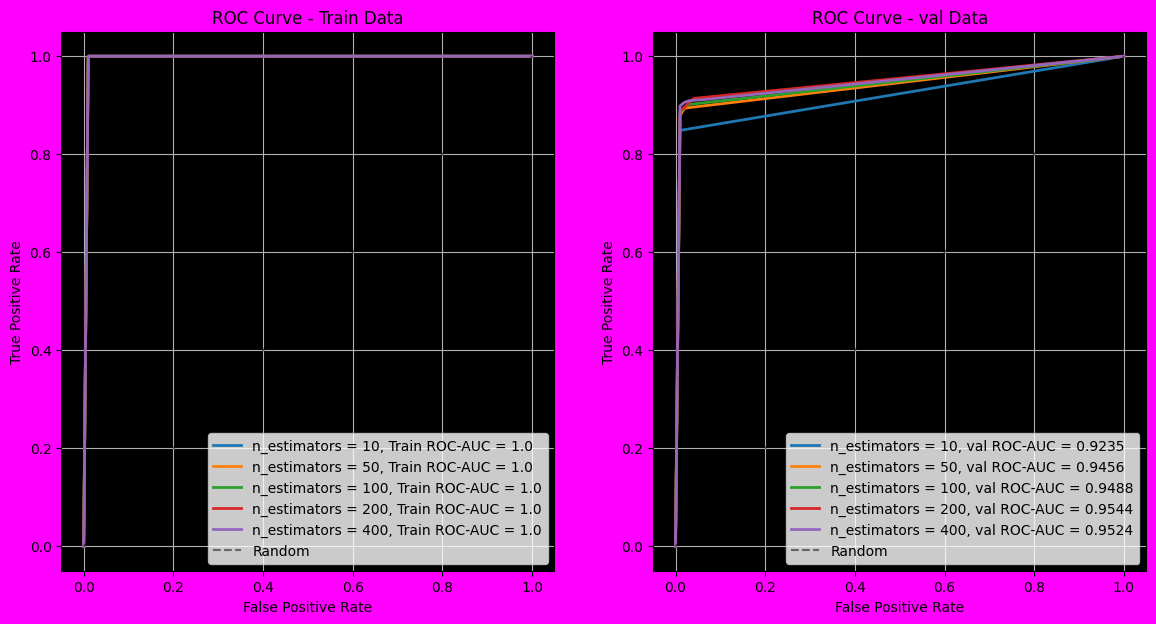

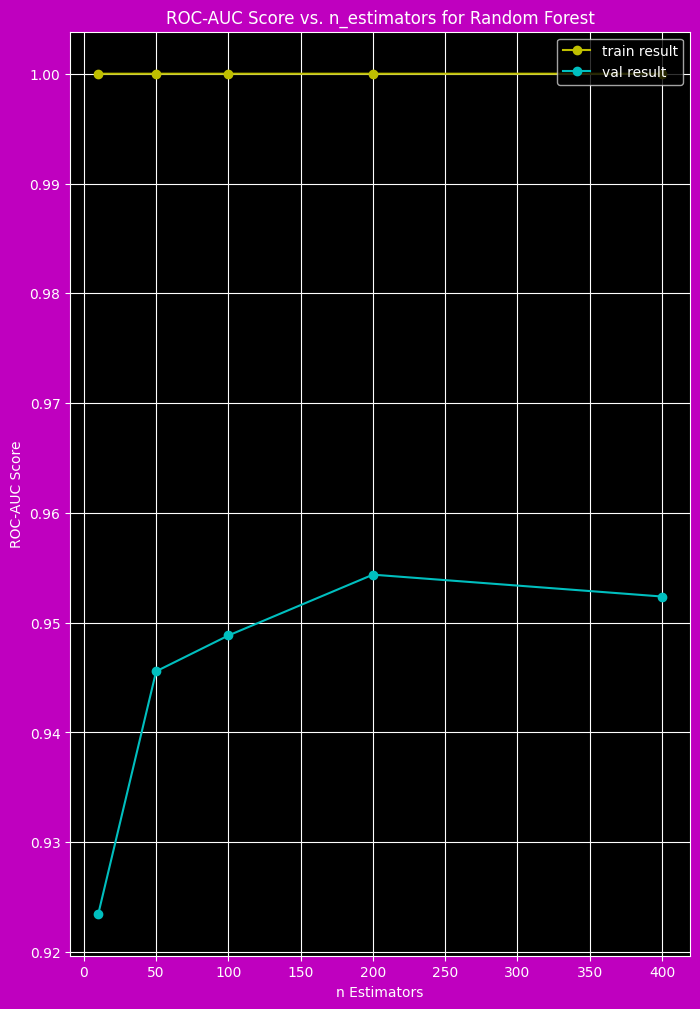





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for train data for all values of n Estimators: 
 [0.9999990847004879, 1.0, 1.0, 1.0, 1.0]


Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9234927960929838, 0.9455706712102864, 0.9488346198748063, 0.9543741946069412, 0.9523838391750753]




Best n Estimators: 200


Best Mean ROC-AUC score for val data: 0.9543741946069412






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")
print("\n")
print("================================================Random Forest:==============================================")
print("\n")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for train and val data

mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for train and val data

    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("\n")
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")
    print("\n")

    # Plotting ROC curve for the current value of C

    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Adding grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')

    # plt.xscale('log')

    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for train and val data for all values of n Estimators

print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("\n")
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]
print("\n")
print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

##**Observations**

**Narrowing to Best n Estimators: 400 It is taking Time elapsed: ~ 1517.3193807601929 seconds for each set of 3 folds**


**1. Increasing the number of trees in the forest can improve the performance of the model by reducing the variance and increasing the accuracy of the predictions.**

**2. This is because more trees mean a larger number of votes for the final prediction, leading to more stable and reliable predictions.**

**3. Moreover, increasing the number of trees can help to capture the complex relationships between the features in the dataset, leading to better generalization.**

**So taking the range of n Estimators as [500], which will take nearly 2000 seconds (35 min) to run a set of 3 folds.**



**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**min_samples_leaf: It depends on the dataset and the specific problem being addressed. Generally, a smaller min_samples_leaf will lead to a more complex decision tree that overfits the training data, while a larger min_samples_leaf will lead to a simpler decision tree that underfits the training data.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

# Defining the hyperparameters grid for tuning

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 1901.27 seconds


Best ROC AUC score:  0.9652869576635892


Best hyperparameters:  {'min_samples_split': 7, 'n_estimators': 500}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.9596865895236562
{'min_samples_split': 7, 'n_estimators': 500} 0.9652869576635892

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.013091405041586119
{'min_samples_split': 7, 'n_estimators': 500} 0.004703803223760141


#**Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**



============================================XGBoost Classifier:=============================================


Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.38544774055480957 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 0.38106417655944824 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 0.34751391410827637 seconds
ROC-AUC Score for val data = 0.9291700281139169


Mean precision val score: 0.0


Mean recall val score: 0.0


Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 0.385343074798584 seconds
Train: [     0 

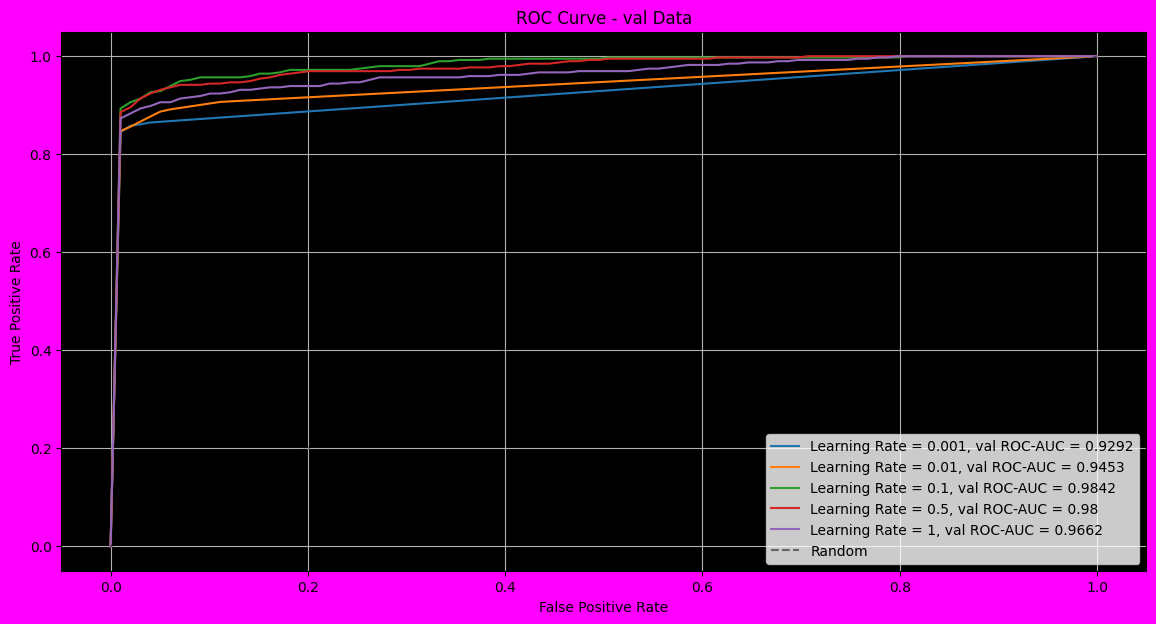

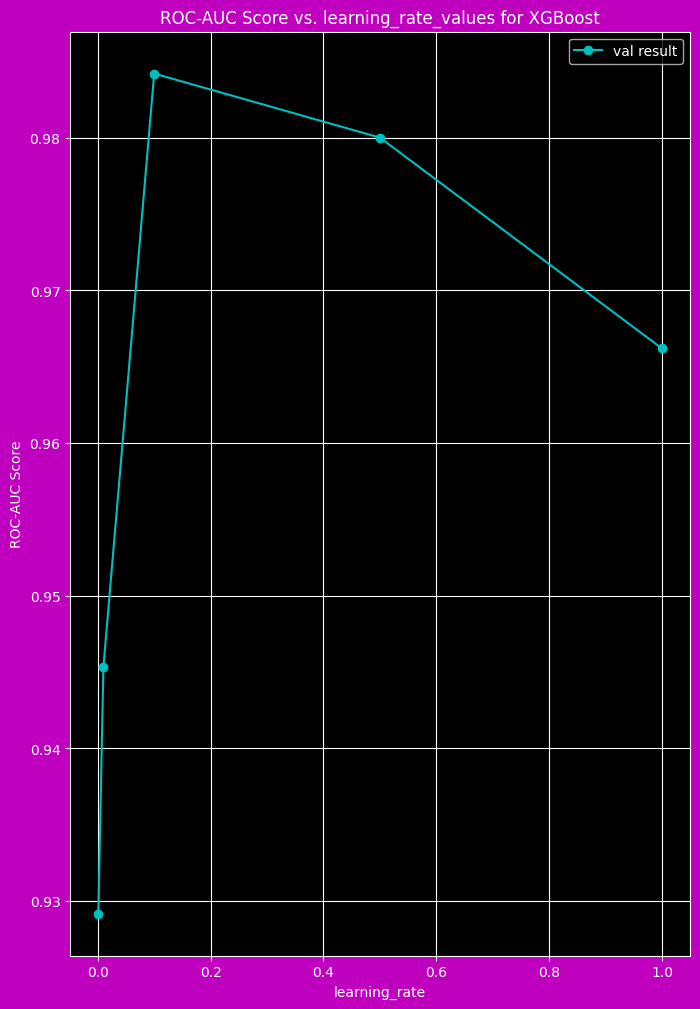





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9291700281139169, 0.945335595298488, 0.9841956933358063, 0.9800009951074783, 0.9661872321498599]


Best Learning Rate : 0.1


Best Mean ROC-AUC score for val data: 0.9841956933358063


Mean precision val score for best Learning Rate: 0.9231163950991537


Mean recall val score for best Learning Rate: 0.7767175572519084


Mean f1 val score for best Learning Rate: 0.843119362083911








In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")
print("\n")
print("============================================XGBoost Classifier:=============================================")
print("\n")

# Defining your values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_train_pt,y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()
print("\n")
print("============================================================================================================")
print("\n")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("\n")
print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Best Learning Rate : 0.1**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning

model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 12.68 seconds


Best ROC AUC score:  0.9835201260497678


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.982702128119914
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9835201260497678
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9822449799639249
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9824771506482223
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9795080825114776
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9786927396236905
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.9818957435995855
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9820154584738643
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9784259310965945

Rank of each hyperparameter combination:


1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate

#**Final Observation on Imbalanced Dataset**

**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**



**1. Logistic Regression { ' C ' : 0.01 , ' Penalty ' : ' L2 ' } :-**

*   **Best Mean ROC-AUC score for val data: 0.9797969874466093**
*   **Mean precision val score for best C: 0.885478588591554**
*   **Mean recall val score for best C: 0.6295975017349064**
*   **Mean f1 val score for best C: 0.7341406860856002**

---



**2. KNeighborsClassifier {'metric': 'manhattan', 'n_neighbors': 9} :-**
*  **Best Mean ROC-AUC score for val data: 0.9274613536399045**


---

**3. SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**

* **Best Mean ROC-AUC score for val data: 0.9565173998635063**


---


**4. DecisionTreeClassifier {'criterion': 'entropy', '': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} :-**

* **Best Mean ROC-AUC score for val data: 0.9337472016466822**

* **Mean precision val score for best max_depth: 0.8480952241800844**

* **Mean recall val score for best max_depth: 0.71578379211967**

* **Mean f1 val score for best max_depth: 0.7752315571186218**


---

**5. RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} :-**

* **Best Mean ROC-AUC score for val data: 0.9646808744238831**

---

**6. XGBClassifier {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} :-**

* **Best Mean ROC-AUC score for val data: 0.9859738836378374**

* **Mean precision val score for best Learning Rate: 0.9233400094242072**

* **Mean recall val score for best Learning Rate: 0.779204256303493**

* **Mean f1 val score for best Learning Rate: 0.8448234879500908**

#**Evaluation Over Test Set**


**Proceeding with the model that showed the best result**


*   **Applying the best hyperparameter on the model**
*   **Predicting on the test dataset**



In [ ]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020 23.000000  
11378  11.850000  
147283 76.070000  
219439  0.990000  
36939   1.500000

In [ ]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

**As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field**

In [ ]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020  0.014079  
11378  -0.142897  
147283  0.761228  
219439 -0.295791  
36939  -0.288610

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# Initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# Predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")

# Initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")




LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737


LogisticRegression F1-Score on Test Set = 0.5977011494252873


LogisticRegression Precision on Test Set = 0.4785276073619632


LogisticRegression Recall on Test Set = 0.7959183673469388


Time taken: 0.92 seconds




KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163


KNeighbors Classifier F1-Score on Test Set = 0.824858757062147


KNeighbors Classifier Precision on Test Set = 0.9240506329113924


KNeighbors Classifier Recall on Test Set = 0.7448979591836735


Time taken: 57.69 seconds




Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987


Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001


Decision Tree Classifier Precision on Test Set = 0.803921568627451


Decision Tree Classifier Recall on Test Set = 0.8367346938775511


Time taken: 4.51 seconds






In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc')
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")

print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")

print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")


XGBOOST Classifier ROC-AUC Score on Test Set = 0.9698374496112456


XGBOOST Classifier F1-Score on Test Set = 0.8241206030150754


XGBOOST Classifier Precision on Test Set = 0.8118811881188119


XGBOOST Classifier Recall on Test Set = 0.8367346938775511


Time taken: 5.18 seconds




In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

start_time = time.time()
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')
clf.fit(X_train_pt, y_train_pt)
y_pred_proba = clf.predict_proba(X_test_saved)
y_pred = clf.predict(X_test_saved)
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved, y_pred=y_pred)

print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")

print("F1 Score on Test Set =", f1)
print("\n")

print("Precision on Test Set =", preci_sion)
print("\n")

print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")


SVM Classifier ROC-AUC Score on Test Set = 0.9545869557727423


F1 Score on Test Set = 0.0


Precision on Test Set = 0.0


Recall on Test Set = 0.0


Time taken: 3085.46 seconds






In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")

print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")

print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")
print("\n")


Random Forest Classifier ROC-AUC Score on Test Set = 0.964199131045215
Random Forest Classifier F1-Score on Test Set = 0.814070351758794


Random Forest Classifier Precision on Test Set = 0.801980198019802


Random Forest Classifier Recall on Test Set = 0.826530612244898


Time taken: 1232.52 seconds






**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

**1. Logistic Regression {'C': 0.01, 'penalty': 'l2'} :-**

---


* **Logistic Regression ROC-AUC Score on Test Set =  0.9752271441778737**
* **Logistic Regression F1-Score on Test Set      =  0.5977011494252873**
* **Logistic Regression Precision on Test Set     =  0.4785276073619632**
* **Logistic Regression Recall on Test Set        =  0.7959183673469388**



---

**2. KNeighbors Classifier {'metric': 'manhattan', 'n_neighbors': 9} :-**


---

* **KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163**
* **KNeighbors Classifier F1-Score on Test Set      = 0.824858757062147**
* **KNeighbors Classifier Precision on Test Set     = 0.9240506329113924**
* **KNeighbors Classifier Recall on Test Set        = 0.7448979591836735**


---

**3. SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**


---
* **SVM ROC-AUC Score on Test Set = 0.9701114653796241**
* **SVM F1-Score on Test Set      = 0.8121827411167513**
* **SVM Precision on Test Set     = 0.8080808080808081**
* **SVM Recall on Test Set        = 0.8163265306122449**


---

**4. Decision Tree Classifier {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} :-**


---

* **Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987**
* **Decision Tree Classifier F1-Score on Test Set      = 0.8200000000000001**
* **Decision Tree Classifier Precision on Test Set     = 0.803921568627451**
* **Decision Tree Classifier Recall on Test Set        = 0.8367346938775511**


---

**5. Random Forest Classifier {'min_samples_split': 5, 'n_estimators': 500} :-**

---
* **Random Forest Classifier ROC-AUC Score on Test Set = 0.9623530686894904**
* **Random Forest Classifier F1-Score on Test Set      = 0.8282828282828283**
* **Random Forest Classifier Precision on Test Set     = 0.82**
* **Random Forest Classifier Recall on Test Set        = 0.8367346938775511**


---

**6.XGB Classifier  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} :-**


---
* **XGB Classifier ROC-AUC Score on Test Set = 0.9713649035866456**
* **XGB Classifier F1-Score on Test Set      = 0.7962085308056872**
* **XGB Classifier Precision on Test Set     = 0.7433628318584071**
* **XGB Classifier Recall on Test Set        = 0.8571428571428571**


---




#**Best model is Logistic Regression**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 0.01, 'penalty': 'l2'}</th><th>0.975227144</th><th>0.59770115</th><th>0.47852761</th><th>0.79591836</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>	{'metric': 'manhattan', 'n_neighbors': 9}</th><th>0.938565557</th><th>0.82485875</th><th>0.92405063</th><th>0.74489795</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>0.970111465</th><th>0.81218274</th><th>0.80808081</th><th>0.81632653</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}</th><th>0.931446530</th><th>0.82000000</th><th>0.80392156</th><th>0.83673469</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>0.962353068</th><th>0.82828283</th><th>0.82000000</th><th>0.83673469</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}	</th><th>0.971364903</th><th>0.79620853</th><th>0.74336283</th><th>0.85714286</th>
</tr>
</table>





**Best model is Logistic Regression based on ROC-AUC Score**


**Best model is Random Forest Classifier based on F1 Score**

#**Printing the important features of the best model to understand the dataset**

Top var = 17
2nd Top var = 12
3rd Top var = 14


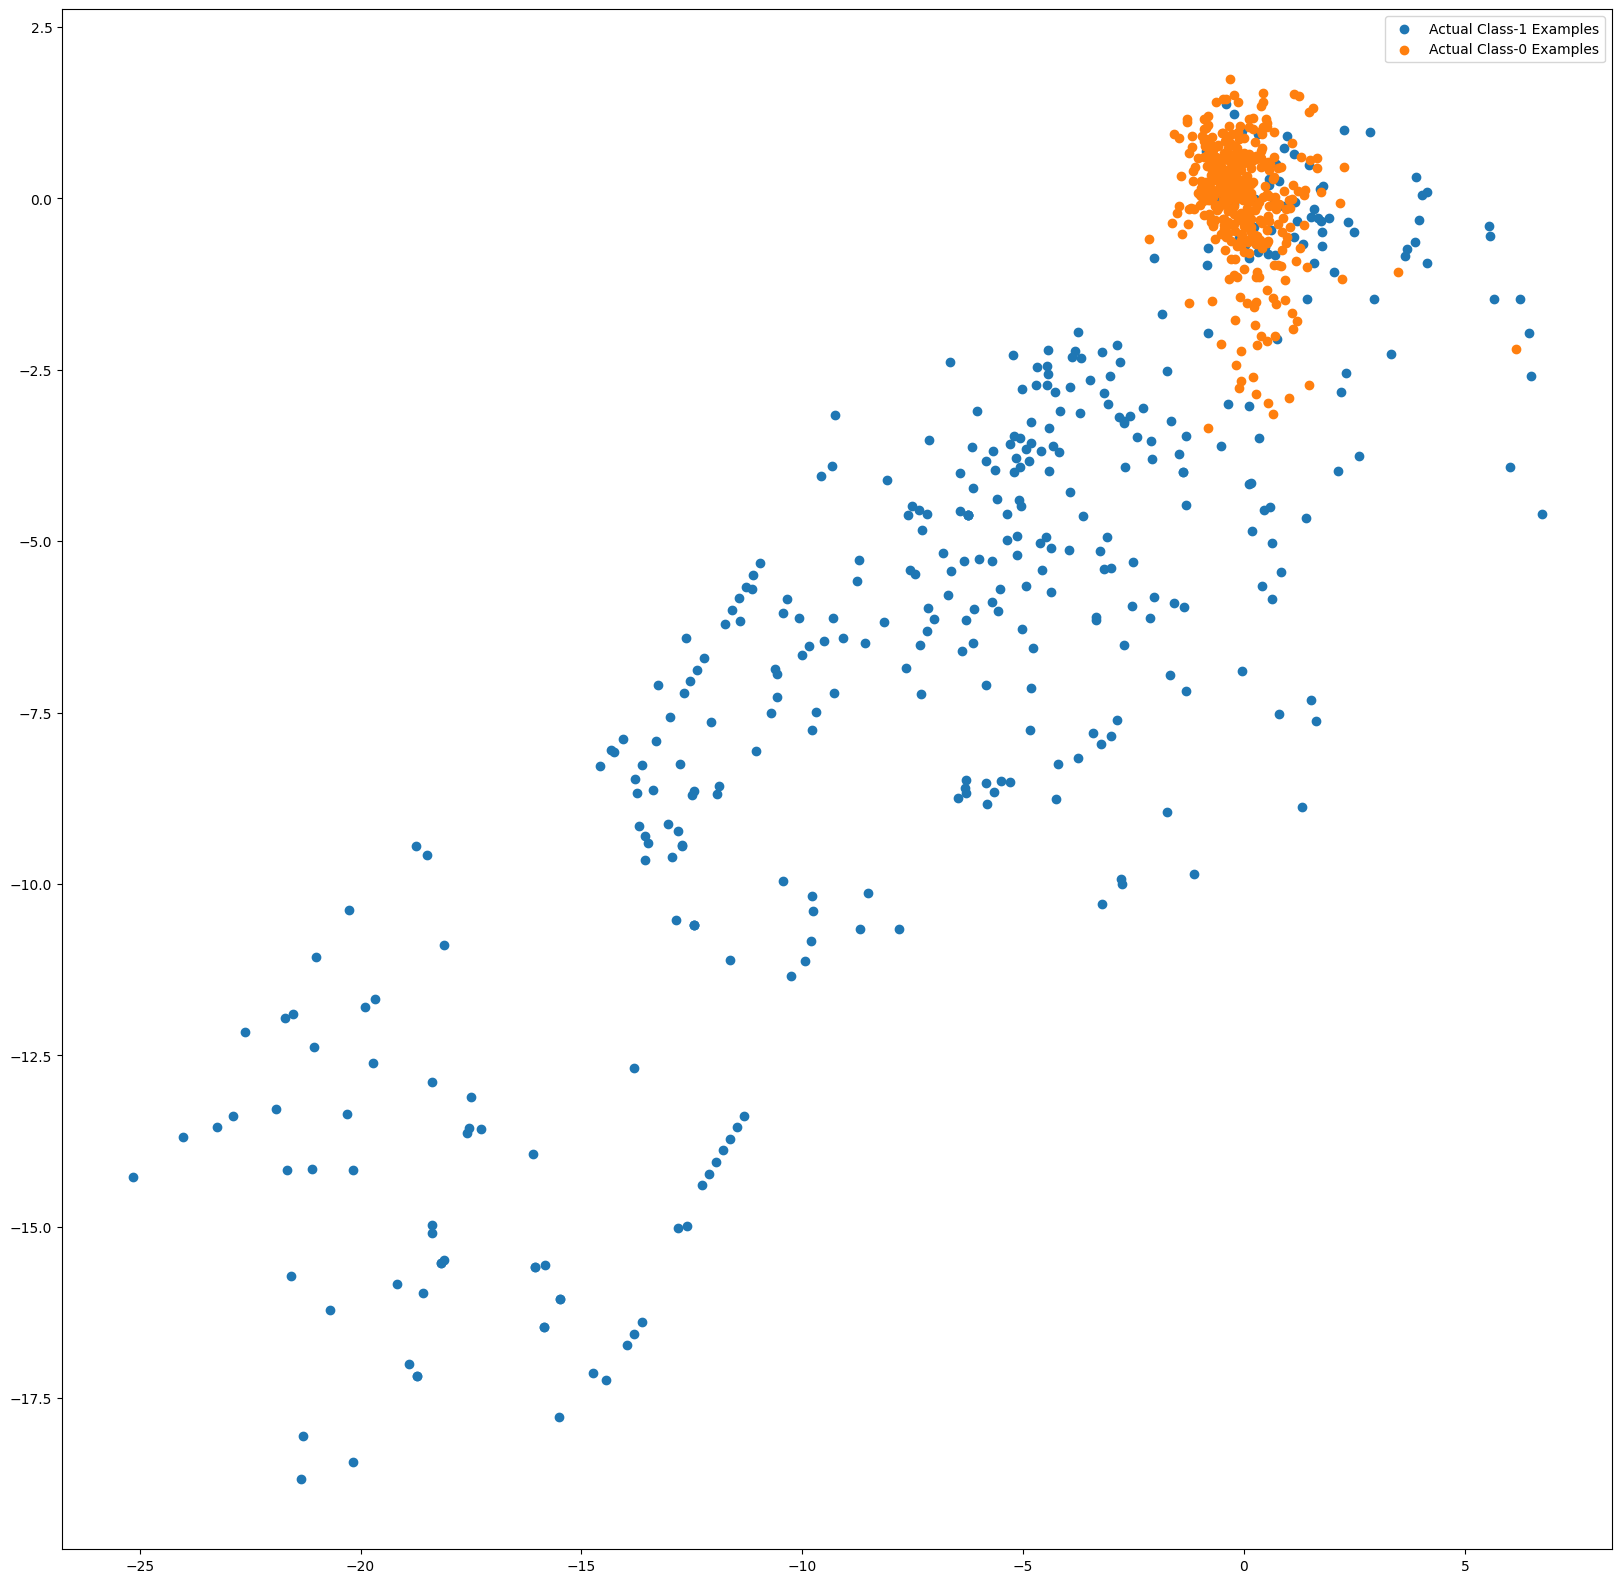

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**Model building with balancing Classes**

**Performing class balancing with:**

**1. Random Oversampling**

**2. SMOTE (Synthetic Minority Oversampling TEchnique)**

**3. ADASYN (Adaptive Synthetic)**

#**I. Random Sampling**

**Building different models on the balanced dataset and seeing the result**

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Defining the RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resampling the training data using RandomOverSampler

X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

**Printing the class distribution after applying Random Oversampling**

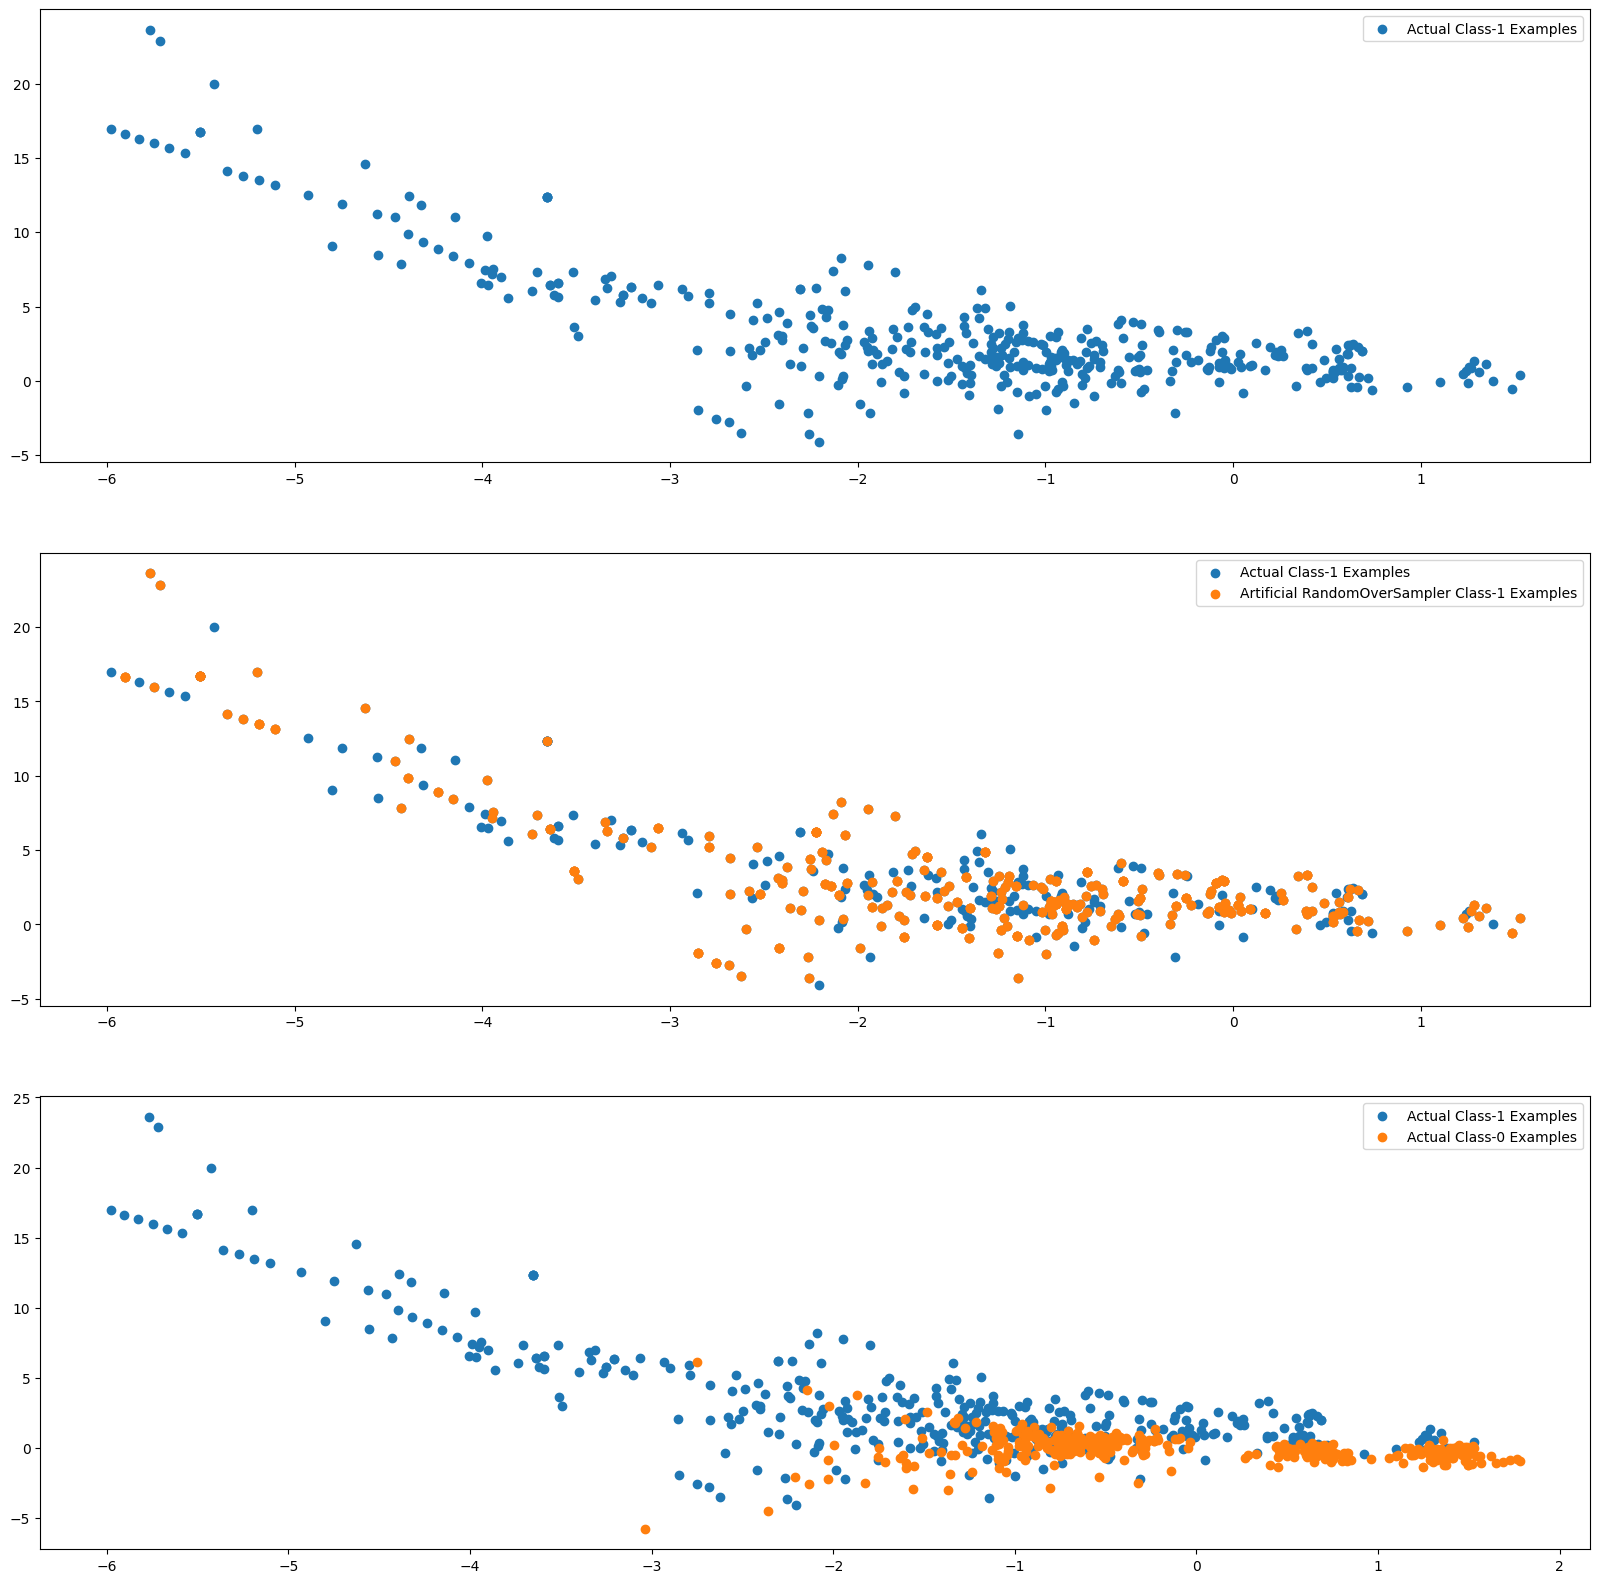

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do

X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

**SOME MORE VISUALIZATION**

*   **Checking the distribution of our target variable: We use value_counts() method to check the distribution of our target variable.**

*  **y_ros_train_pt is our target variable, we can use the following code to check the distribution of its values:**

In [ ]:
print(y_ros_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

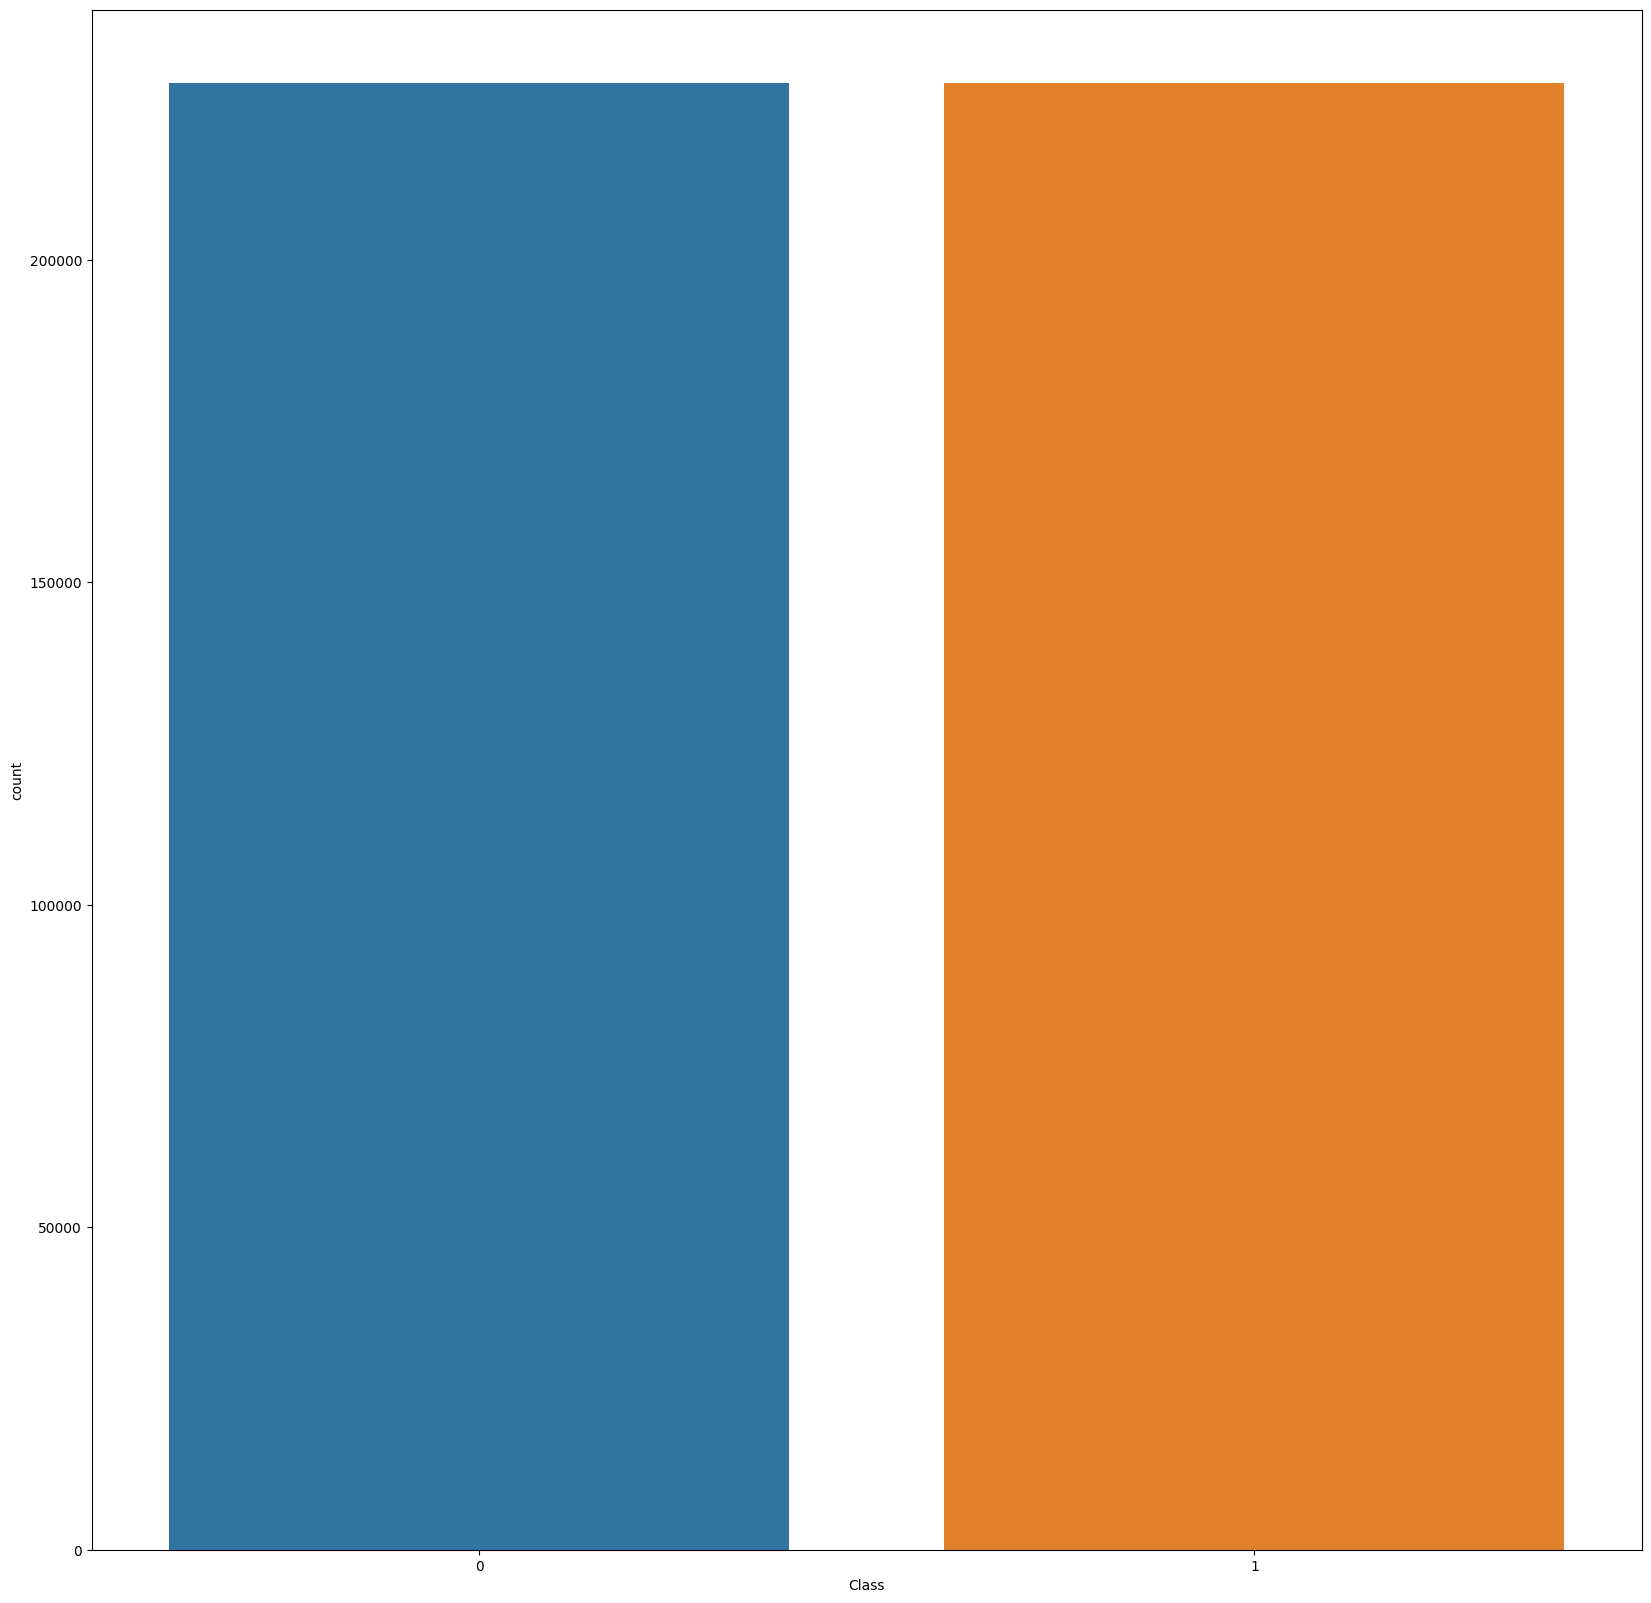

In [ ]:
import seaborn as sns

sns.countplot(x=y_ros_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.89000e+03, 8.64000e+03, 1.93390e+04,
        2.41990e+04, 7.23550e+04, 1.64576e+05, 9.98080e+04, 5.90810e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

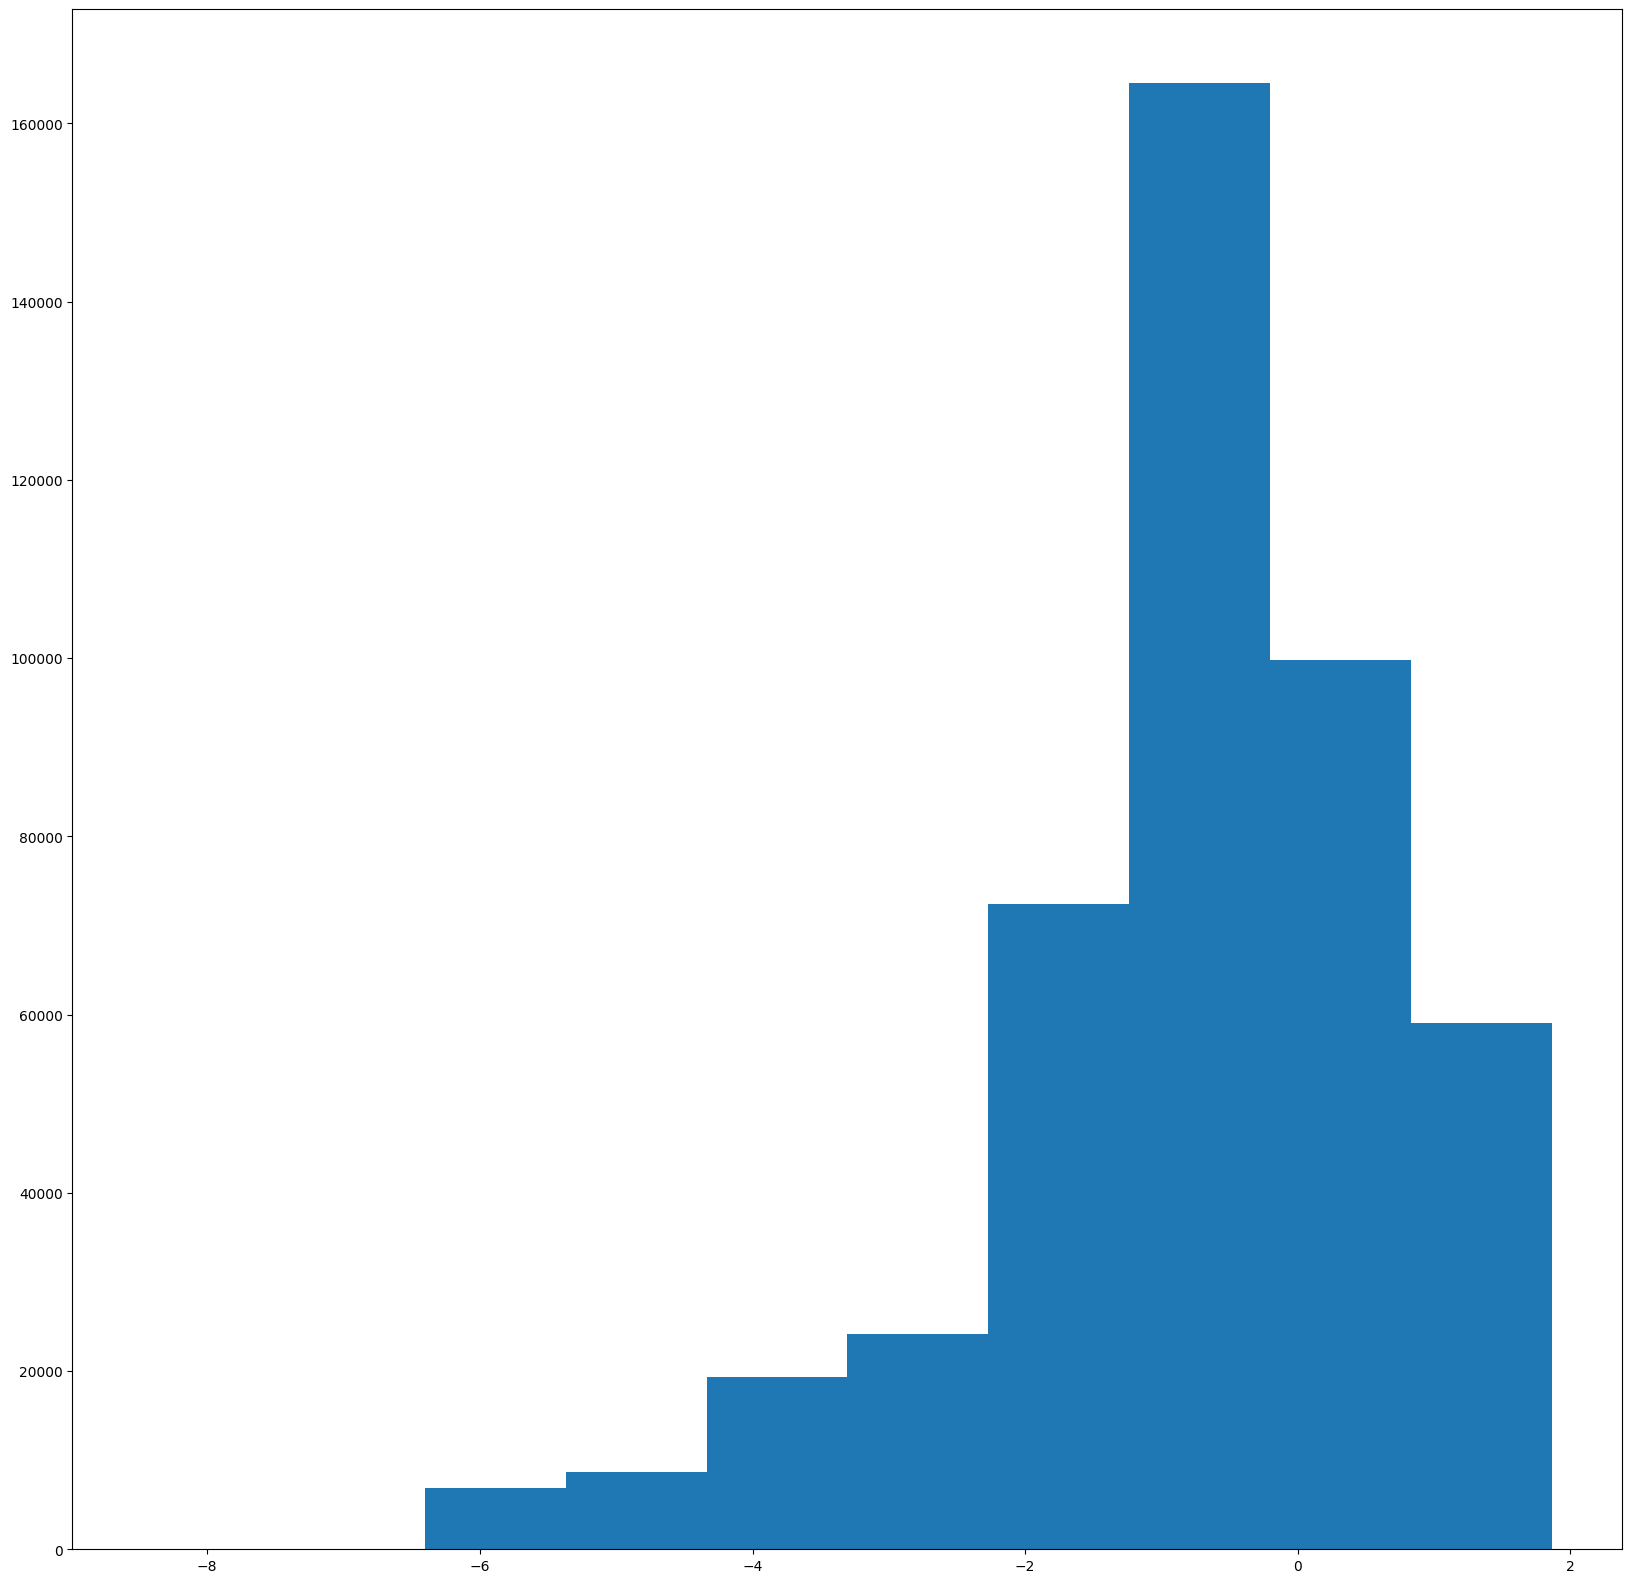

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_ros_train_pt[:,0])

#**1. Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.4748098850250244 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.6511530876159668 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.584089994430542 seconds
ROC-AUC Score for val data = 0.9884596673443649
Mean precision val score: 0.971995125195427
Mean recall val score: 0.9294177647053652
Mean f1 val score: 0.9502289914447828
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 

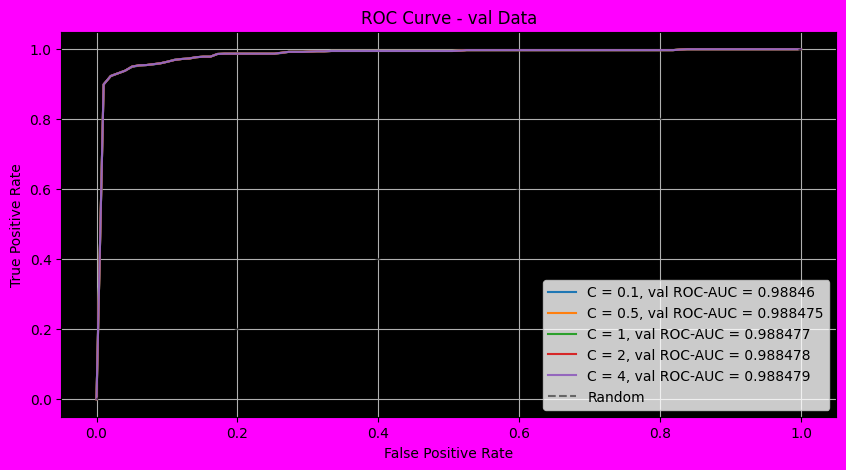

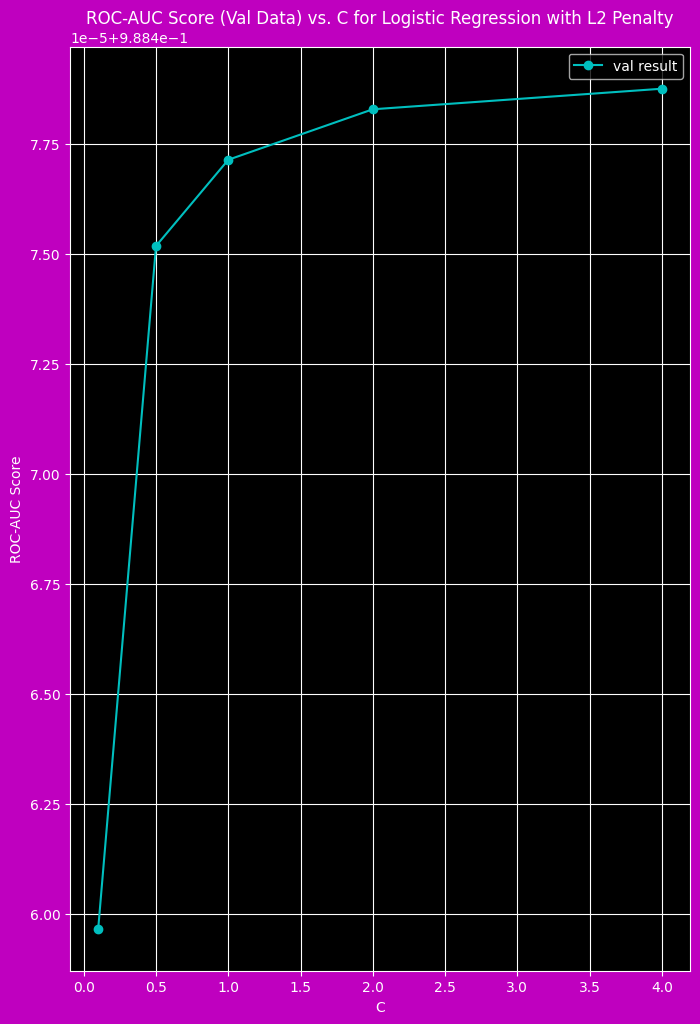





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9884596673443649, 0.9884751736875929, 0.9884771319758254, 0.9884782784761702, 0.9884787455195051]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9884787455195051
Mean precision val score for best C 0.9719371184117677
Mean recall val score for best C 0.9294177647053652
Mean f1 val score for best C 0.950201240931848
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 16.20 seconds
Best ROC AUC score:  0.9884840531068964
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9883179474109142
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9884639663582266
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.988480560951858
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9884825141950481
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9884836085053008
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9884840531068964

Rank of each hyperparameter combination:


1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 8.902337312208437e-0

#**2. Performing KNN Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 14.279289960861206 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 14.180199146270752 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 14.379319190979004 seconds
Mean ROC-AUC for val data: 0.9998373276002304
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 14.161311388015747 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 14.40038

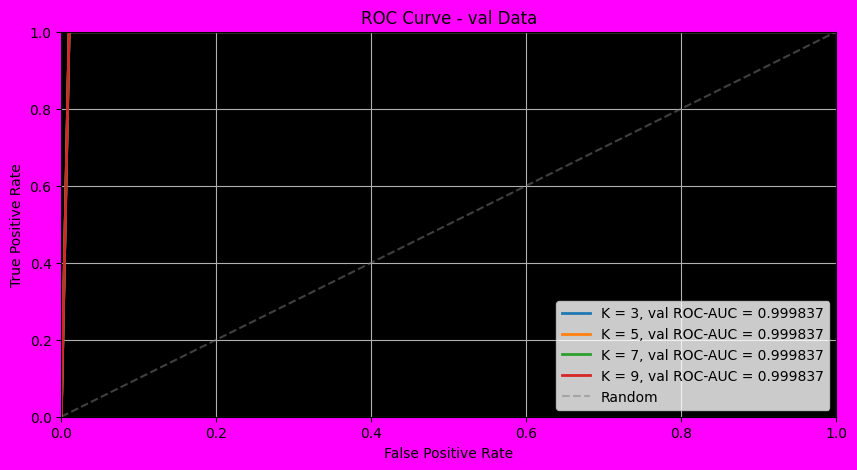

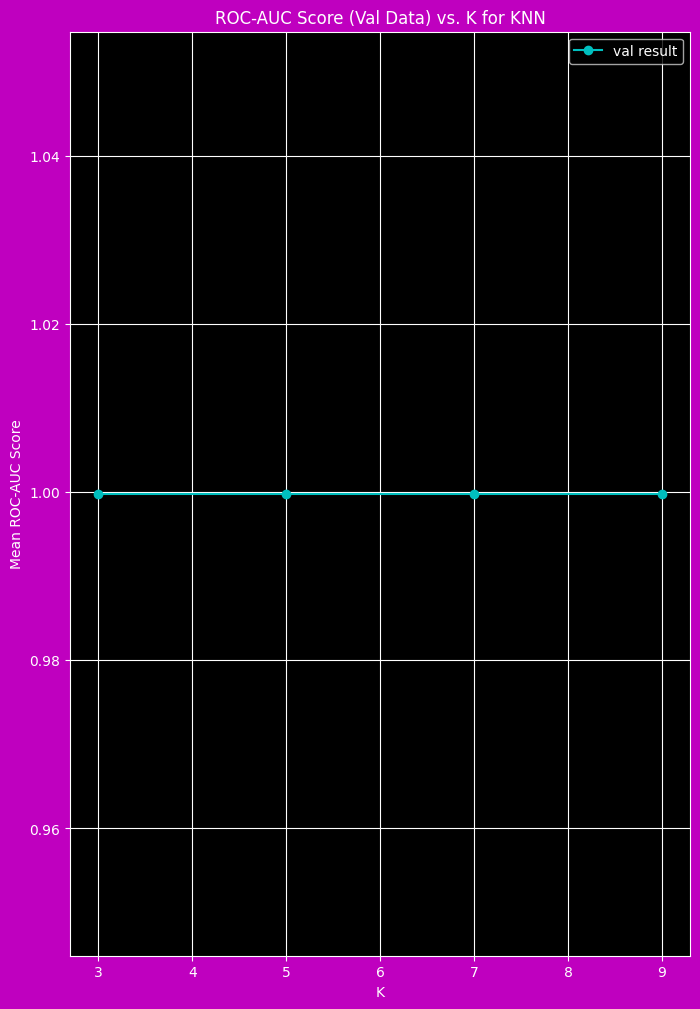





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.9998373276002304, 0.9998373276002304, 0.9998373276002304, 0.9998373276002304]


Best K: 9


Best Mean ROC-AUC score for val data: 0.9884787455195051


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining your values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt[train_index], y_ros_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printting mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")
# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

In [ ]:
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
print(best_k)

9


**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")
# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 868.09 seconds


Best ROC AUC score:  0.9998373276002304


Best hyperparameters:  {'n_neighbors': 9}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'n_neighbors': 9} 0.9998373276002304

Rank of each hyperparameter combination:


1 {'n_neighbors': 9}

Standard deviation of test scores:


{'n_neighbors': 9} 3.155119145309202e-05


#**3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.3640432357788086 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.3719499111175537 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.3896207809448242 seconds
ROC-AUC Score for val data = 0.9211016878360613
Mean precision val score: 0.9678135262862111
Mean recall val score: 0.8711766490364958
Mean f1 val score: 0.9169555972886232
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 2.3735561370

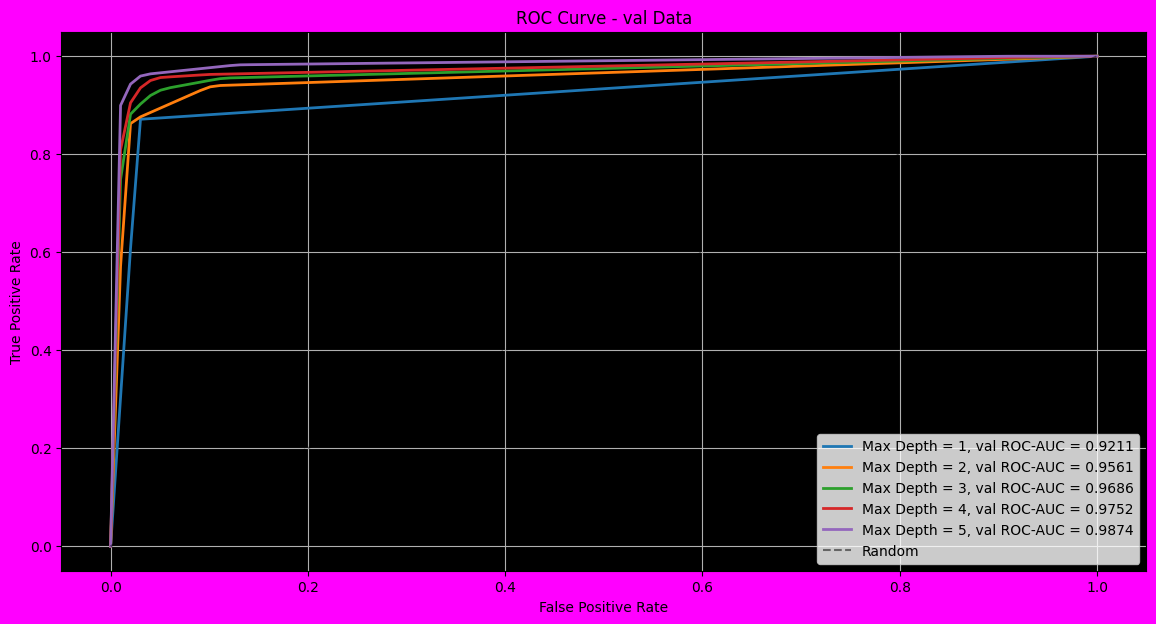

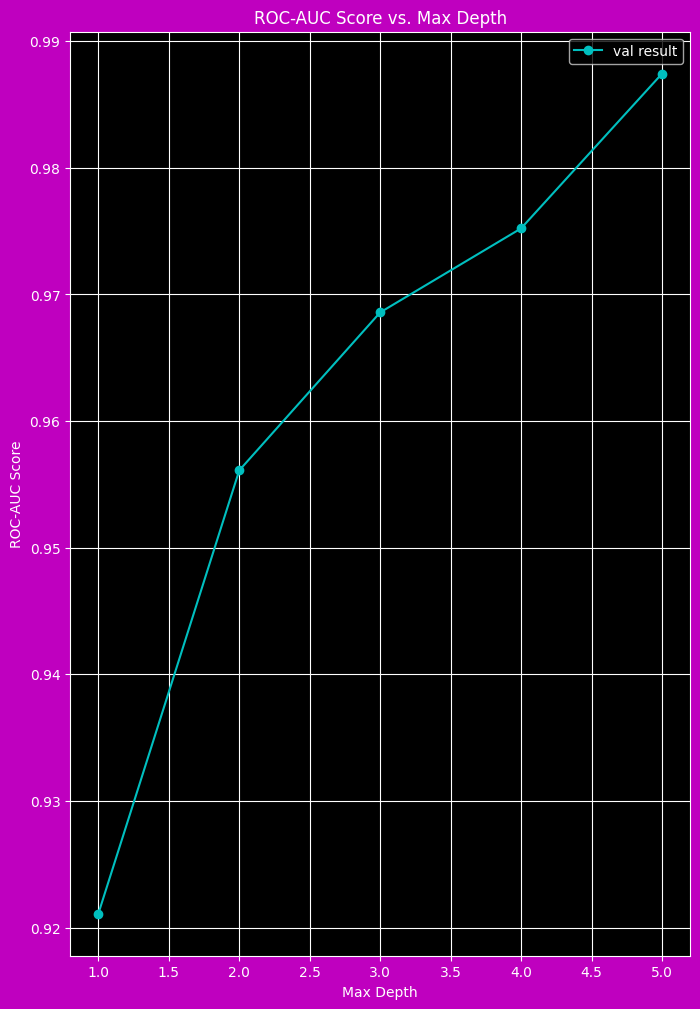





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9211016878360613, 0.9561066498470479, 0.9685818111129348, 0.9752145303990369, 0.9874290209144636]


Best Max Depth: 5


Best Mean ROC-AUC score for val data: 0.9874290209144636


Mean precision val score for best Max Depth: 0.9736125554386047


Mean recall val score for best Max Depth: 0.9558410382895657


Mean f1 val score for best Max Depth: 0.964631942249586






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 56.18 seconds


Best ROC AUC score:  0.9981460788751075


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9752145303990369
{'criterion': 'gini', 'max_depth': 5, 'mi

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 11.646509170532227 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 11.564920902252197 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 11.563539981842041 seconds
ROC-AUC Score for val data = 0.9999846120702921
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 57.7768931388855 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 3790

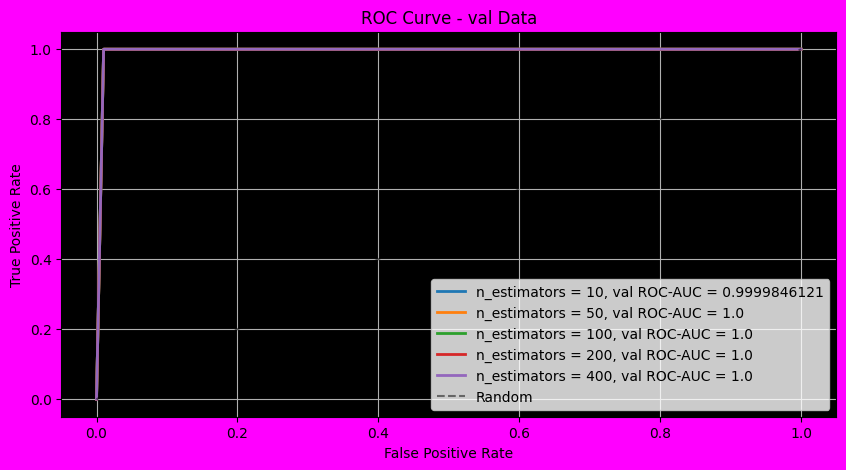

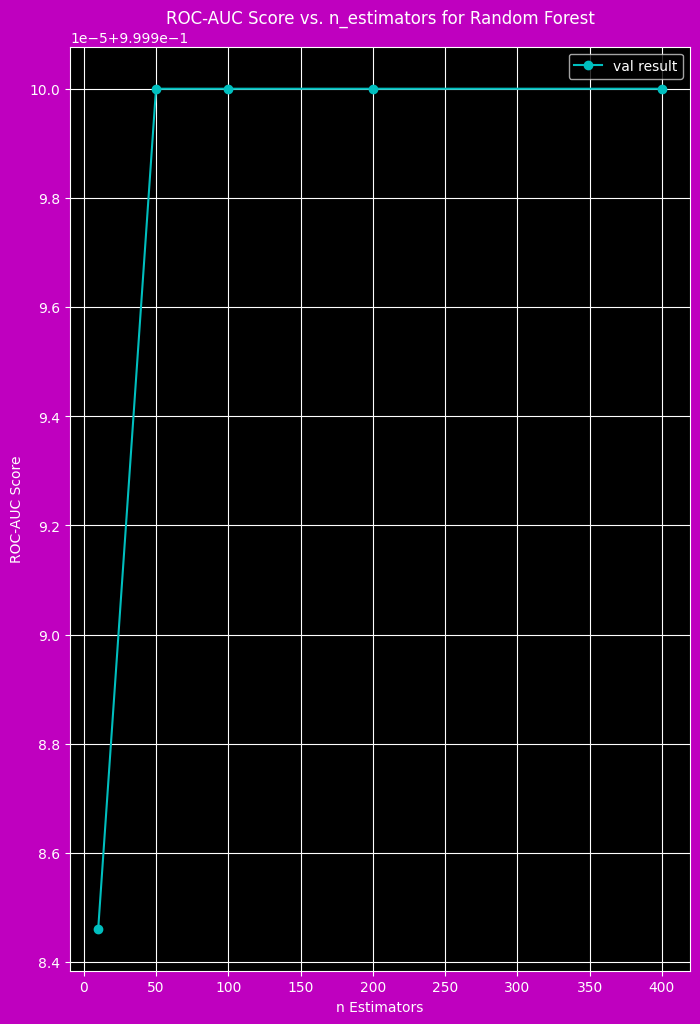





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================


Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999846120702921, 1.0, 1.0, 1.0, 1.0]


Best n Estimators: 400


Best Mean ROC-AUC score for val data: 0.9874290209144636


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Settng plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')

    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")
print("\n")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 1683.53 seconds


Best ROC AUC score:  1.0


Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'min_samples_split': 5, 'n_estimators': 500} 1.0
{'min_samples_split': 7, 'n_estimators': 500} 1.0

Rank of each hyperparameter combination:


1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:


{'min_samples_split': 5, 'n_estimators': 500} 0.0
{'min_samples_split': 7, 'n_estimators': 500} 0.0


#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 0.8301725387573242 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.6184089183807373 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 0.9975183010101318 seconds
ROC-AUC Score for val data = 0.9806291986667035
Mean precision val score: 0.9756684275862587
Mean recall val score: 0.9179559553486246
Mean f1 val score: 0.9459222957655885
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapse

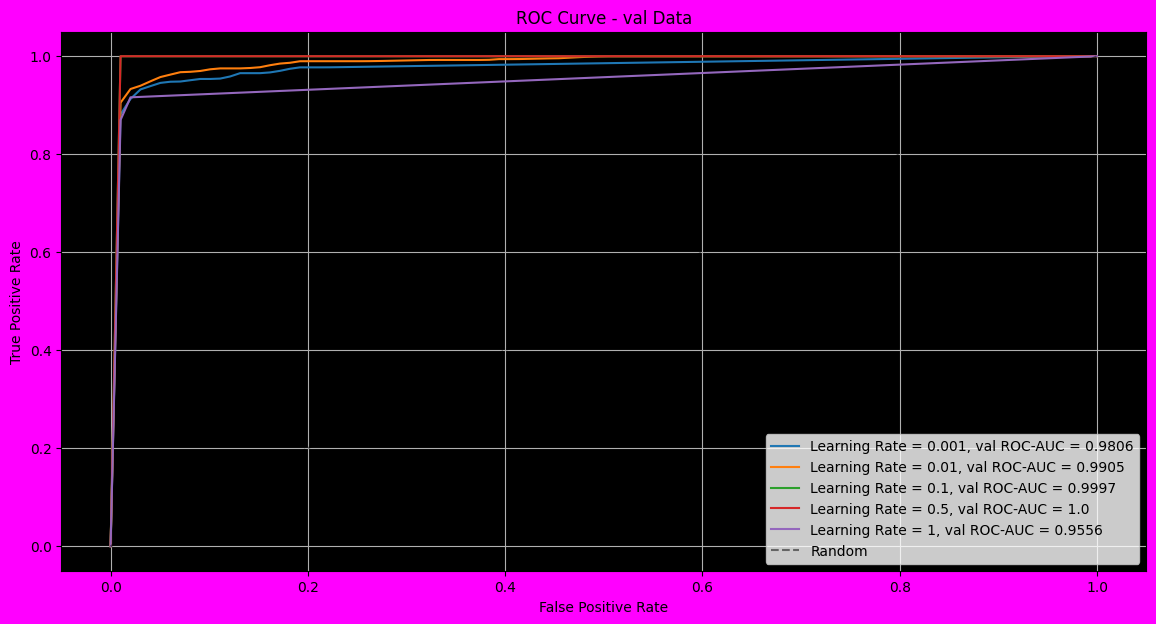

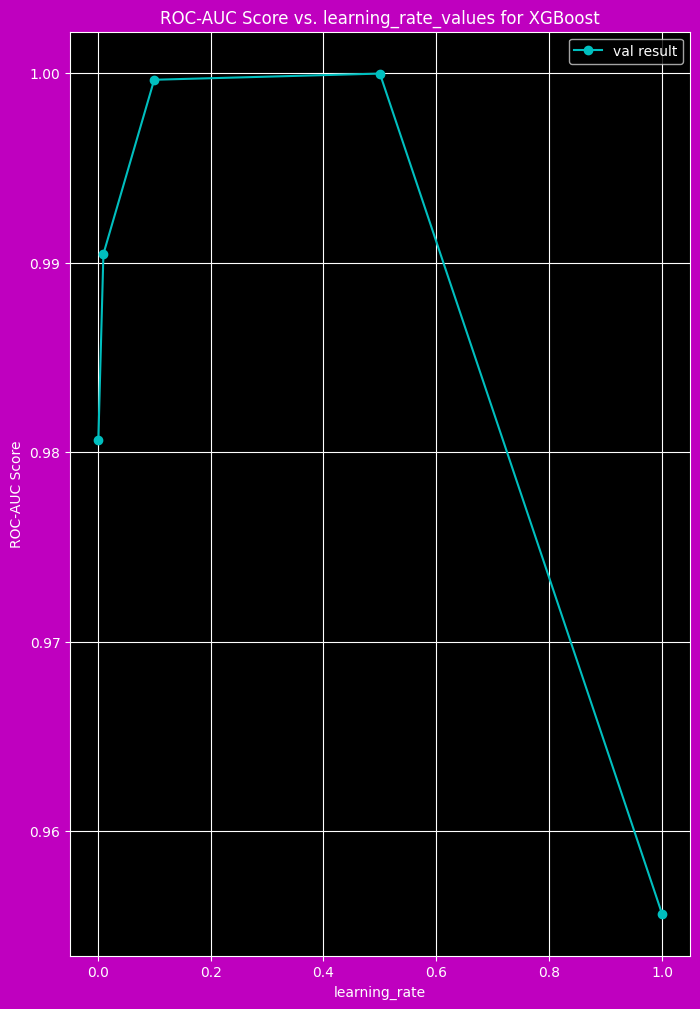





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9806291986667035, 0.9904589809325034, 0.9996561084074411, 0.9999820937243825, 0.9556443707135451]


Best Learning Rate : 0.5


Best Mean ROC-AUC score for val data: 0.9999820937243825


Mean precision val score for best Learning Rate: 0.9994814799235198


Mean recall val score for best Learning Rate: 1.0


Mean f1 val score for best Learning Rate: 0.9997406717344318






In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")
print("\n")
print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Time taken: 34.71 seconds


Best ROC AUC score:  0.9999940388186891


Best hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5} 0.9999823992973718
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.7} 0.9999804704675467
{'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.9} 0.9999820922166688
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.5} 0.9999907835776741
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.7} 0.9999940388186891
{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9} 0.9999919618849806
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.5} 0.9999891158432819
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.7} 0.9999927088121816
{'learning_rate': 0.5, 'max_depth': 7, 'subsample': 0.9} 0.9999870588867809
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.5} 0.9999854569698936
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.7} 0.9999861053737987
{'learning_rate': 0.6, 'max_depth': 3, 'subsample': 0.9} 0.9999876620882673
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.5} 0.999991422

##**Observations**

**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

*  **Logistic Regression**
*  **KNeighbors Classifier**
*  **SVM**
*  **Decision Tree Classifier**
*  **Random Forest Classifier**
*  **XGB Classifier**

**Proceed with the model which shows the best result**

*  **Appling the best hyperparameter on the model**
*  **Predicting on the test dataset**

In [ ]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020  0.014079  
11378  -0.142897  
147283  0.761228  
219439 -0.295791  
36939  -0.288610

In [ ]:
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [ ]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020  0.014079  
11378  -0.142897  
147283  0.761228  
219439 -0.295791  
36939  -0.288610

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

**The below code appears to be initializing and training several classification models with best hyperparameters and
then evaluating their performance using ROC-AUC score.**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")


print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524863
LogisticRegression F1-Score on Test Set = 0.932017141909525


LogisticRegression Precision on Test Set = 0.925193643972344


LogisticRegression Recall on Test Set = 0.9389420371412492


Time taken: 2.10 seconds


KNeighbors Classifier ROC-AUC Score on Test Set = 0.9398546705943079
KNeighbors Classifier F1-Score on Test Set = 0.9241250283468138


KNeighbors Classifier Precision on Test Set = 0.9986317595164189


KNeighbors Classifier Recall on Test Set = 0.8599641249296567


Time taken: 225.65 seconds


Decision Tree Classifier ROC-AUC Score on Test Set = 0.9356105342166989
Decision Tree Classifier F1-Score on Test Set = 0.9189785371841284


Decision Tree Classifier Precision on Test Set = 0.929737415186365


Decision Tree Classifier Recall on Test Set = 0.9084658131682611


Time taken: 5.74 seconds




In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_ros)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_ros)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")
print("\n")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9750475063279259
Random Forest Classifier F1-Score on Test Set = 0.8054149425528786


Random Forest Classifier Precision on Test Set = 0.9997653439015487


Random Forest Classifier Recall on Test Set = 0.6743282217220034


Time taken: 1095.91 seconds






**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

1. **Logistic Regression {'C': 4, 'penalty': 'l2'} :-**

    * **LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524862 [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.9752271441778737]**
    
    * **LogisticRegression F1-Score on Test Set = 0.932017141909525 [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.5977011494252873]**
    
    * **LogisticRegression Precision on Test Set = 0.925193643972344 [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.4785276073619632]**

    * **LogisticRegression Recall on Test Set = 0.9389420371412492 [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.7959183673469388]**


---


2. **KNeighbors Classifier {'n_neighbors': 9} :-**

    * **KNeighbors Classifier ROC-AUC Score on Test Set = 0.9398546705943079 [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9385655570613163]**

    * **KNeighbors Classifier F1-Score on Test Set = 0.9241250283468138 [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.824858757062147]**

    * **KNeighbors Classifier Precision on Test Set = 0.9986317595164189 [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9240506329113924]**

    * **KNeighbors Classifier Recall on Test Set = 0.8599641249296567 [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.7448979591836735]**


---


3. **SVM.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} :-**

    * ** **


---


4. **Decision Tree Classifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} :-**

  * **Decision Tree Classifier ROC-AUC Score on Test Set = 0.9356105342166989 [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9314465304973987]**

  * **Decision Tree Classifier F1-Score on Test Set = 0.9189785371841284 [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8200000000000001]**

  * **Decision Tree Classifier Precision on Test Set = 0.929737415186365 [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.803921568627451]**

  * **Decision Tree Classifier Recall on Test Set = 0.9084658131682611 [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8367346938775511]**


---


5. **Random Forest Classifier {'min_samples_split': 5, 'n_estimators': 500} :-**

  * **Random Forest Classifier ROC-AUC Score on Test Set = 0.9634288542372493 [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.9623530686894904]**

  * **Random Forest Classifier F1-Score on Test Set = 0.8258706467661691 [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8282828282828283]**

  * **Random Forest Classifier Precision on Test Set = 0.8058252427184466 [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.82]**

  * **Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8367346938775511]**


---


6. **XGB Classifier {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} :-**

  * **XGBOOST Classifier ROC-AUC Score on Test Set = 0.977483446853241 [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9713649035866456]**

  * **XGBOOST Classifier F1-Score on Test Set = 0.9368538930690137 [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7962085308056872]**

  * **XGBOOST Classifier Precision on Test Set = 0.9888057514603317 [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7433628318584071]**

  * **XGBOOST Classifier Recall on Test Set = 0.8900886325267304 [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8571428571428571 ]**

##**Observations**

**1. Based on ROC-AUC Scores-**

* **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**

* **LogisticRegression score decreased. But, the best model is XGBClassifier**

**2. Based on F1 Scores-**

* **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.**

* **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'n_neighbors': 9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

**Printing the important features of the best model to understand the dataset**

* **This will not give much explanation on the already transformed dataset**

* **But it will help us in understanding if the dataset is not PCA transformed**

Top var = 14
2nd Top var = 10
3rd Top var = 12


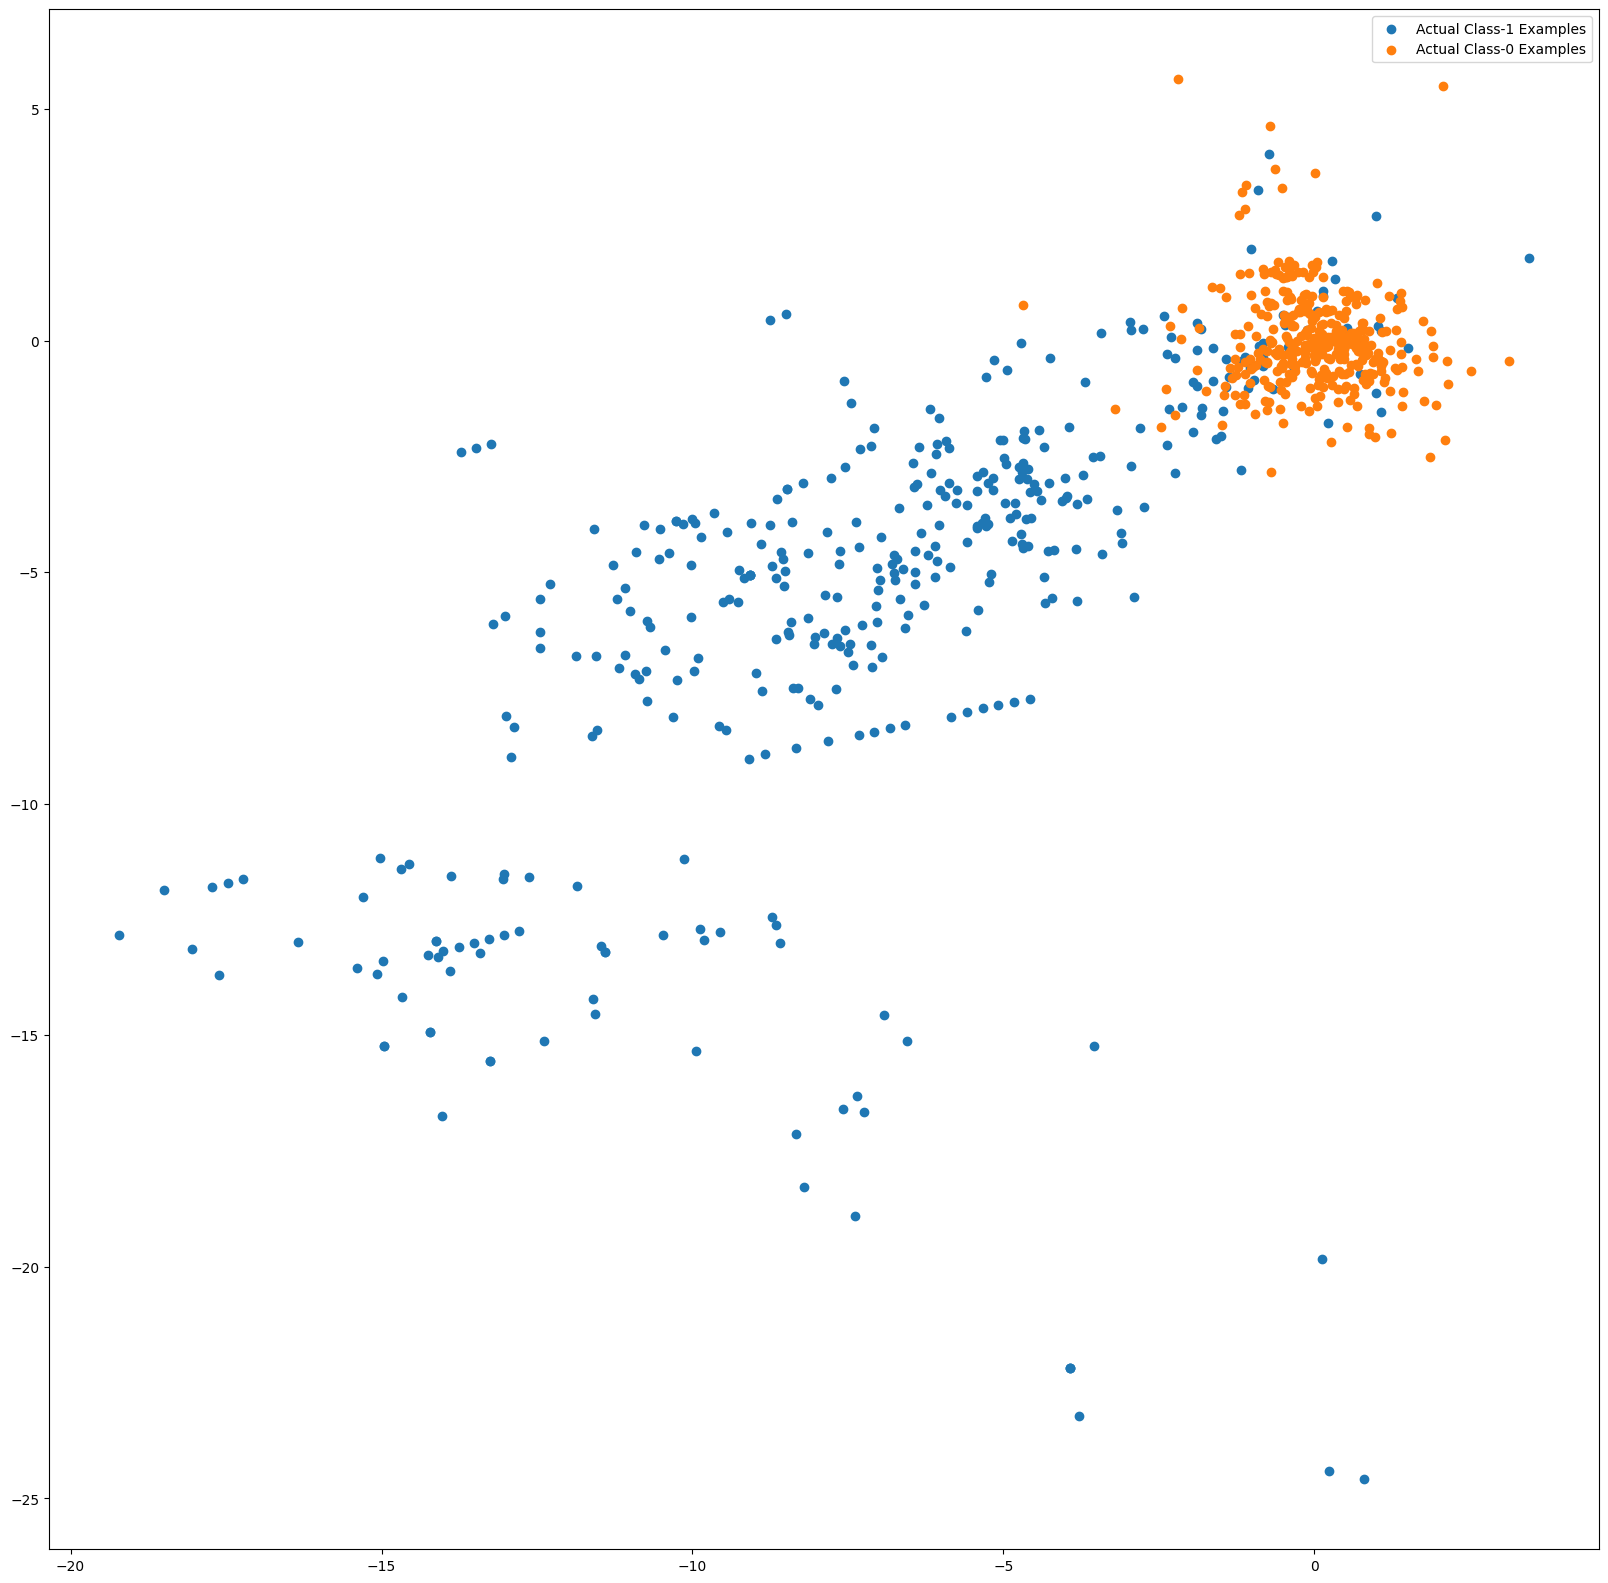

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**II. SMOTE(Synthetic Minority Over-sampling Technique)**

**Building different models on the balanced dataset and see the result**

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

**By setting a fixed random_state value, the SMOTE algorithm will use the same randomly generated numbers each time the code is run, which will produce the same synthetic samples for each minority class observation. This ensures that the training and validation process is consistent and can be repeated, which is important when developing and testing machine learning models.**

**Therefore, using random_state=0 in the SMOTE constructor helps ensure that the model performance will be consistent and reproducible when the code is re-run. However, it is important to note that changing the random seed will produce a different set of synthetic samples and may result in different performance metrics.**

In [ ]:
from imblearn.over_sampling import SMOTE

# Defining the SMOTE

smote = over_sampling.SMOTE(random_state=0)

# Resampling the training data using SMOTE

X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

##**Printing the class distribution after applying SMOTE**

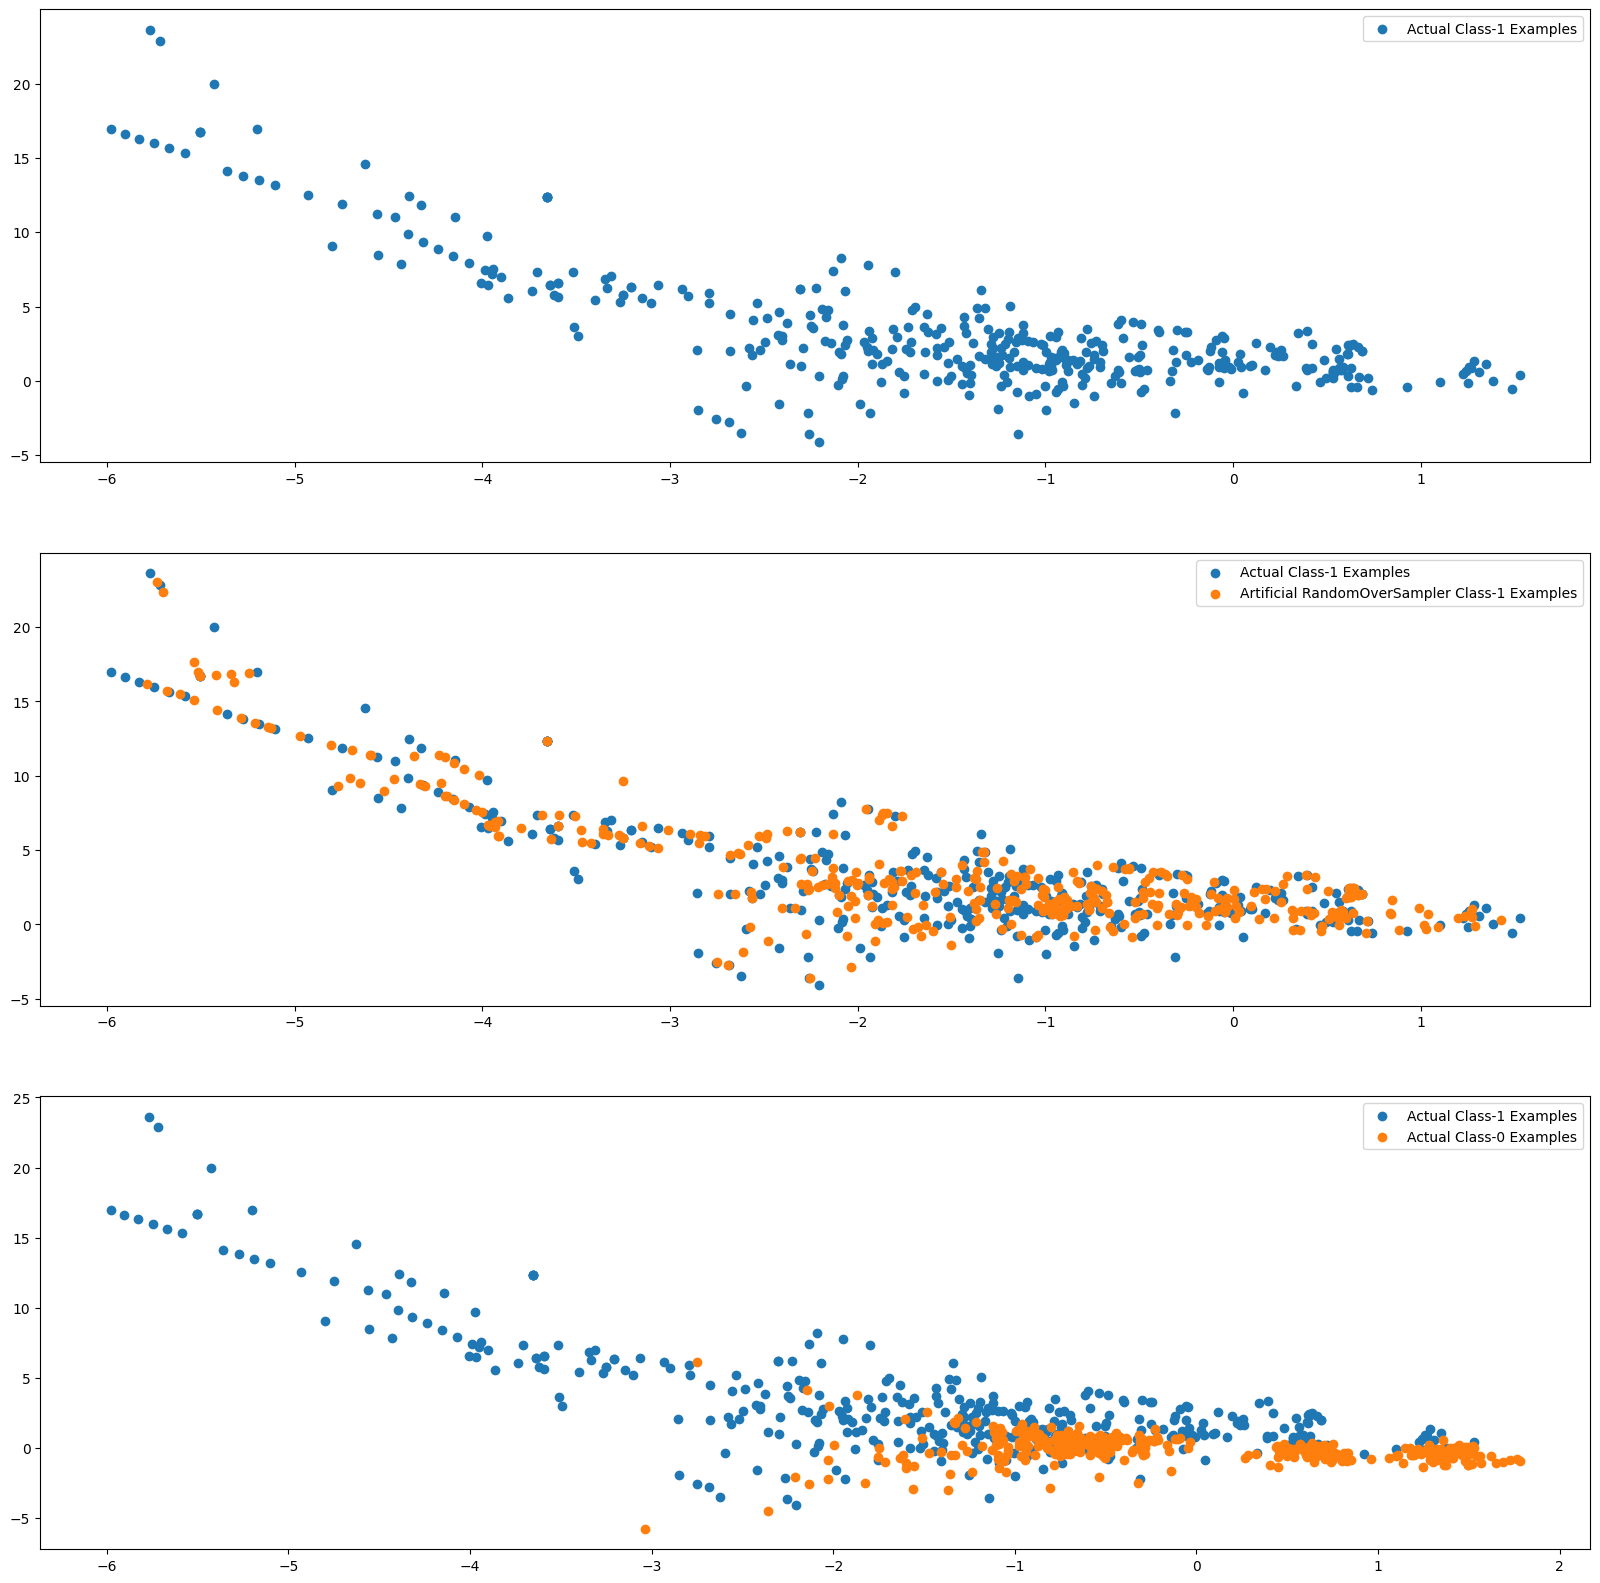

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##**SOME MORE VISUALIZATION**

* **Checking the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.**

* **y_ros_train_pt is target variable, we can use the following code to check the distribution of its values:**

In [ ]:
print(y_smote_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

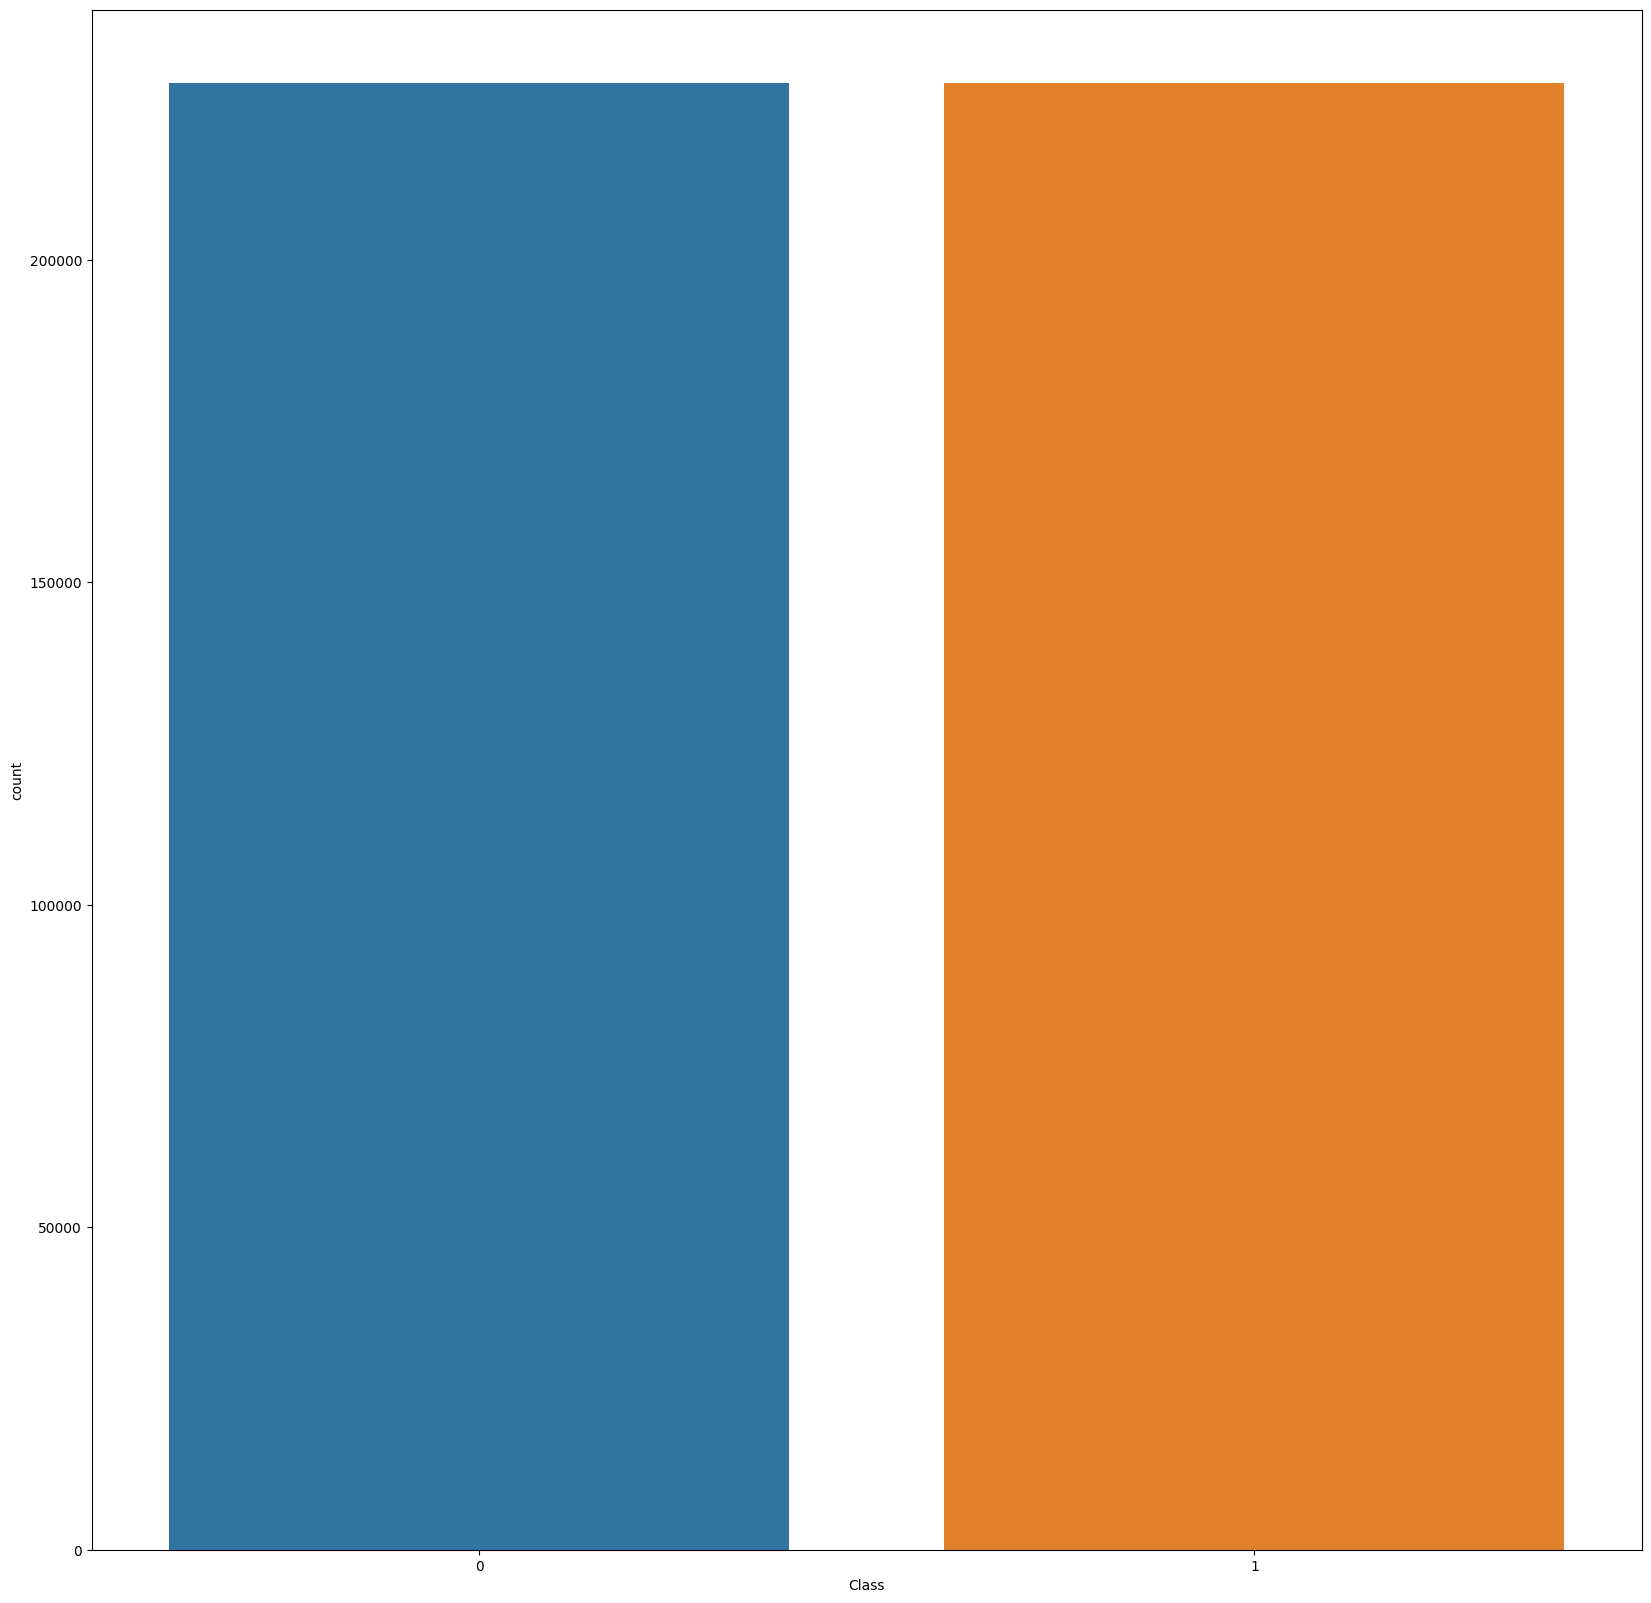

In [ ]:
import seaborn as sns

sns.countplot(x=y_smote_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.48400e+03, 8.61800e+03, 1.85730e+04,
        2.23130e+04, 6.63820e+04, 1.69144e+05, 1.04130e+05, 5.92440e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

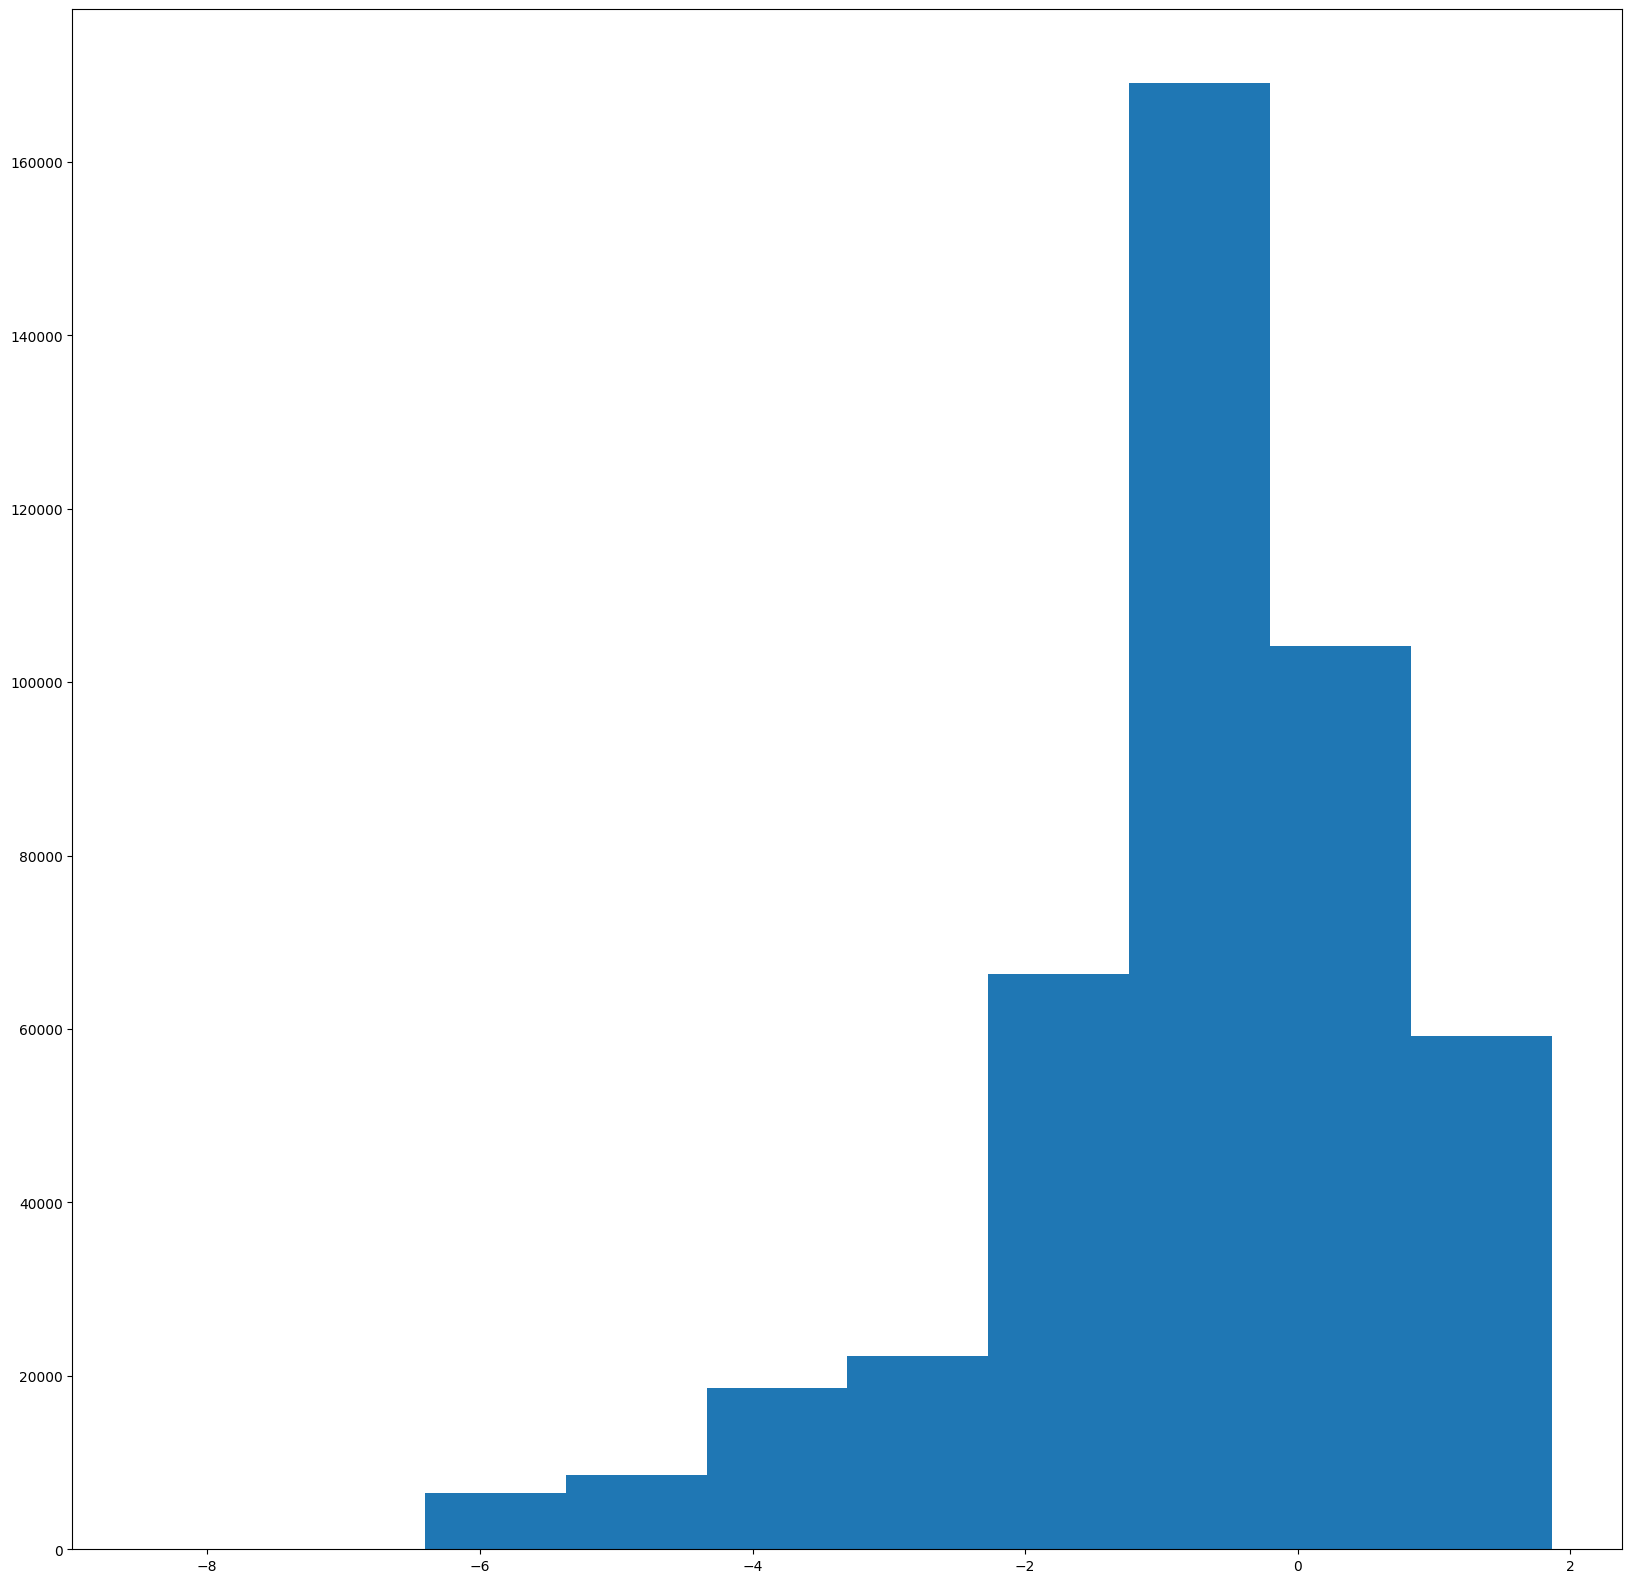

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_smote_train_pt[:,0])

#**Building models on other algorithms to see the better performing on SMOTE**

#**1. Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.7908360958099365 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.4189317226409912 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.4485599994659424 seconds
ROC-AUC Score for val data = 0.9907335768983577
Mean precision val score: 0.9702187684974365
Mean recall val score: 0.9289517302627819
Mean f1 val score: 0.9491353412846303
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed

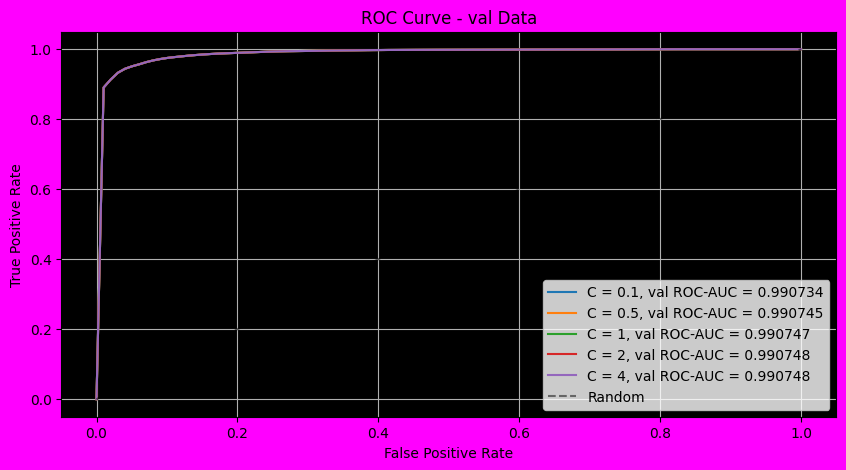

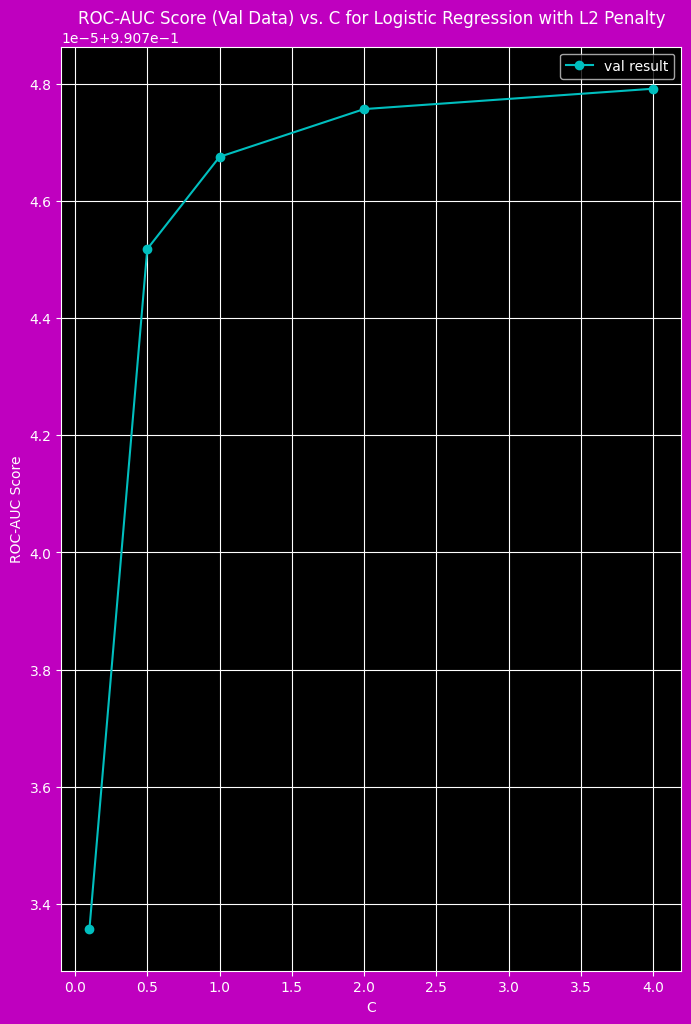





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9907335768983577, 0.9907451784368858, 0.9907467507503931, 0.9907475658726477, 0.99074791351665]


Best C: 4


Best Mean ROC-AUC score for val data: 0.99074791351665


Mean precision val score for best C 0.9700892879660502


Mean recall val score for best C 0.9292199198948344


Mean f1 val score for best C 0.9492131800549414


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot


# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)
print("\n")
# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining  the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 8.65 seconds


Best ROC AUC score:  0.9907510842387103


Best hyperparameters:  {'C': 4, 'penalty': 'l2'}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9906123995650367
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9907366389490487
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.990748446029556
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9907499645872683
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9907507538754275
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9907510842387103

Rank of each hyperparameter combination:


1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:


{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.000173407073988908

#**2. Performing KNN Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 14.64914870262146 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 14.169600486755371 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 14.542871952056885 seconds
Mean ROC-AUC for val data: 0.999575729025911
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 14.027438640594482 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 14.3727314

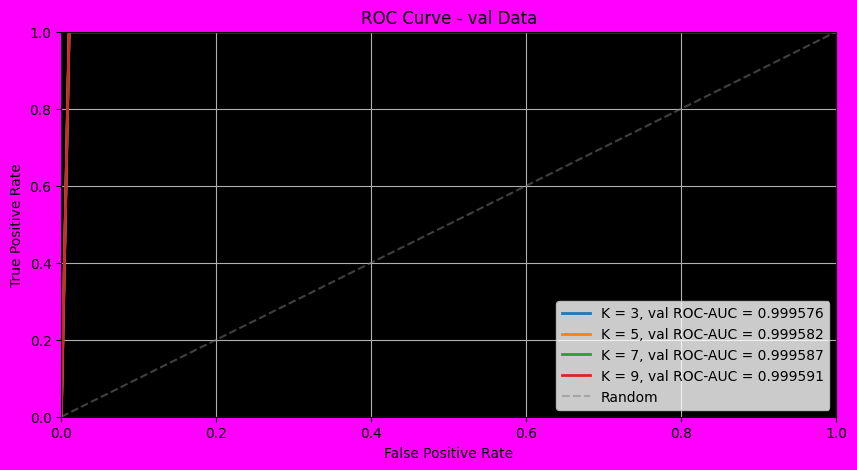

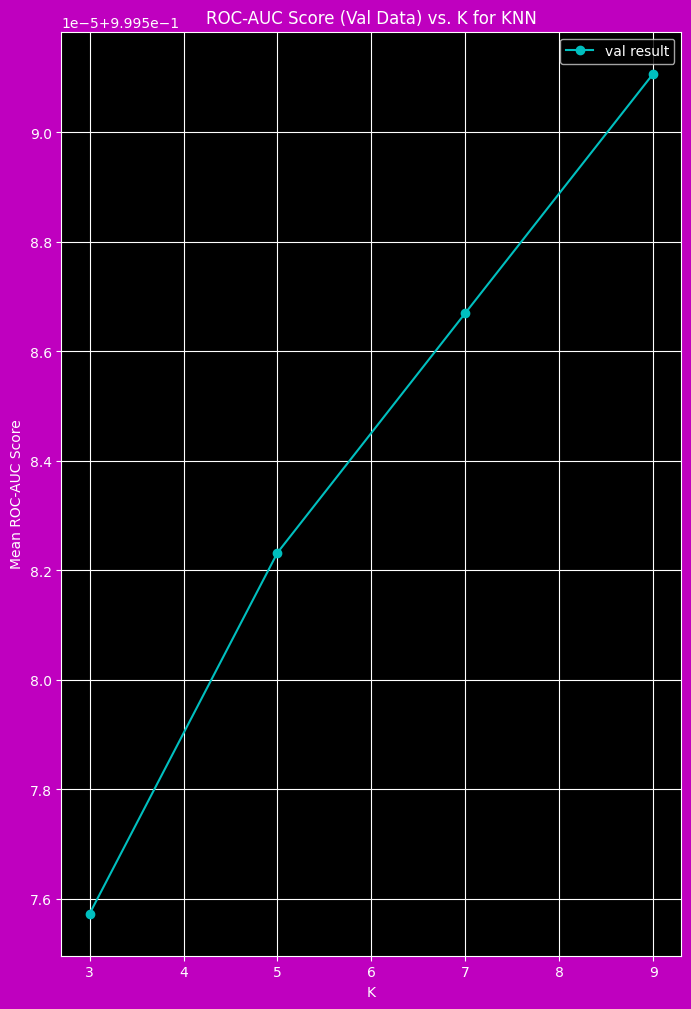





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.999575729025911, 0.9995823239109177, 0.9995867020797528, 0.999591073318903]


Best K: 9


Best Mean ROC-AUC score for val data: 0.99074791351665


------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining your values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cro ss-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt[train_index], y_smote_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

**Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        #pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Time taken: 879.75 seconds


Best ROC AUC score:  0.999591073318903


Best hyperparameters:  {'n_neighbors': 9}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'n_neighbors': 9} 0.999591073318903

Rank of each hyperparameter combination:


1 {'n_neighbors': 9}

Standard deviation of test scores:


{'n_neighbors': 9} 3.535869384302741e-05


#**3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.**

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 2.0958900451660156 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 2.0868780612945557 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 2.0633175373077393 seconds
ROC-AUC Score for val data = 0.9236033255514374
Mean precision val score: 0.9678815927340984
Mean recall val score: 0.8762854416995308
Mean f1 val score: 0.9198087736064844
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 3.8088753223

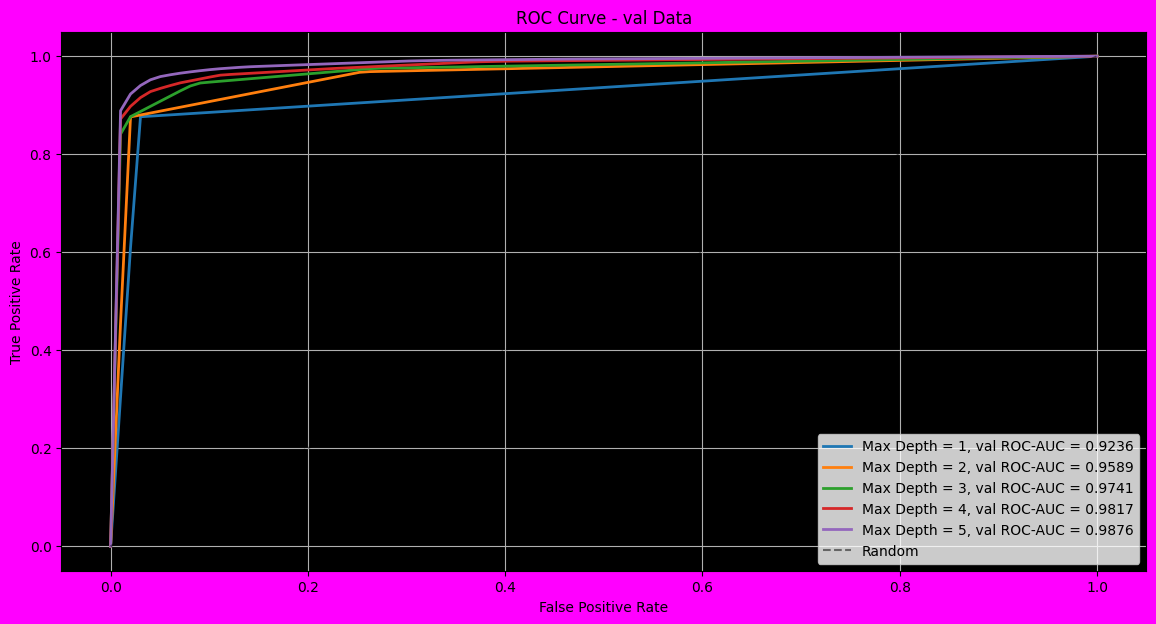

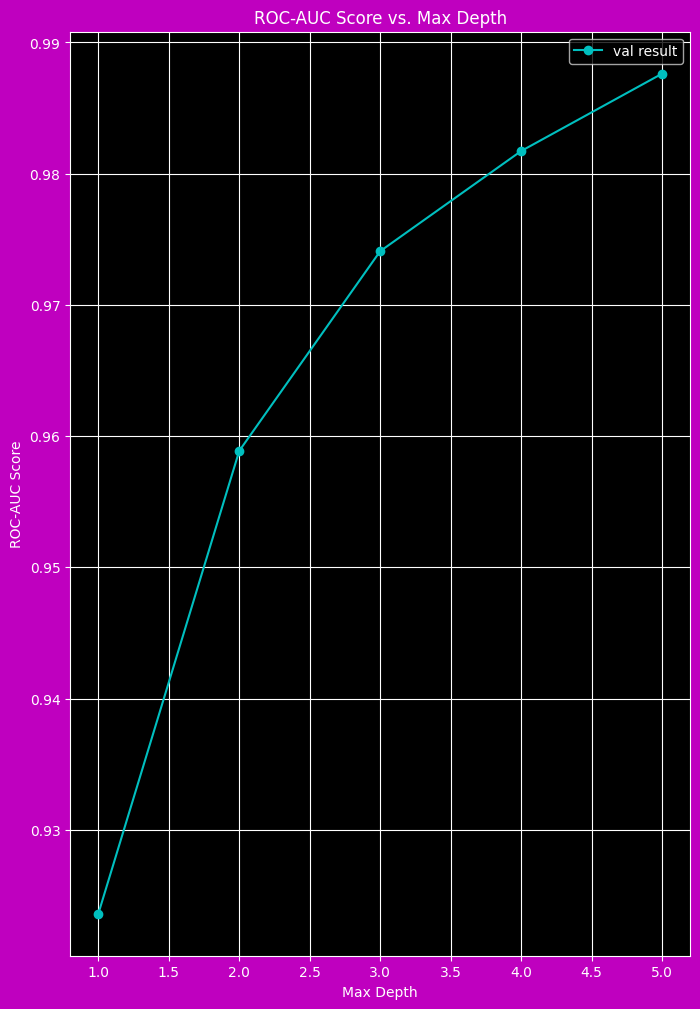





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.9236033255514374, 0.9588771035915595, 0.9740918136010585, 0.9817219012906652, 0.9876182390507088]


Best Max Depth: 5


Best Mean ROC-AUC score for val data: 0.9876182390507088


Mean precision val score for best Max Depth: 0.9559803470320745


Mean recall val score for best Max Depth: 0.956135607229689


Mean f1 val score for best Max Depth: 0.9560475733357633








In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining your values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Ploting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])
print("\n")

print("============================================================================================================")
print("\n")
print("============================================================================================================")
print("\n")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 97.53 seconds


Best ROC AUC score:  0.9947661967283646


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}




In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.9817271492943679
{'criterion': 'gini', 'max_depth': 5, 'mi

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

================================================Random Forest:==============================================
n_estimators = 100
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 269.6502058506012 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 256.7569570541382 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 263.80890560150146 seconds
ROC-AUC Score for val data = 0.9999961062422029
------------------------------------------------------------------------------------------------------------
n_estimators = 200
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 534.2530226707458 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379

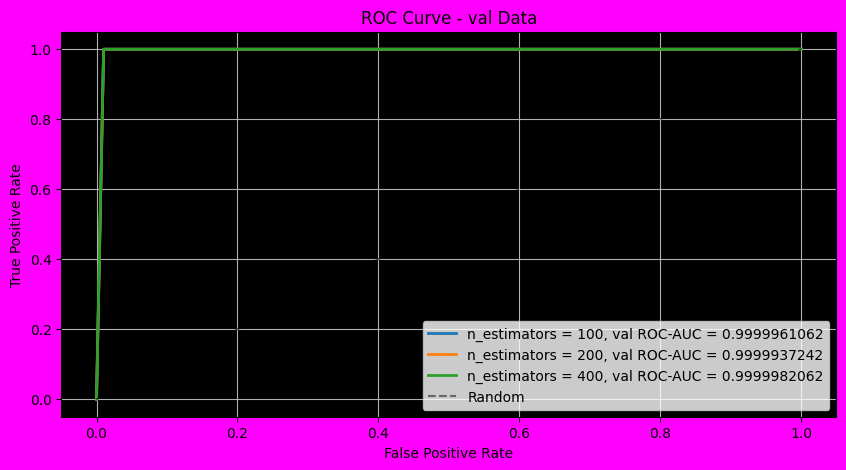

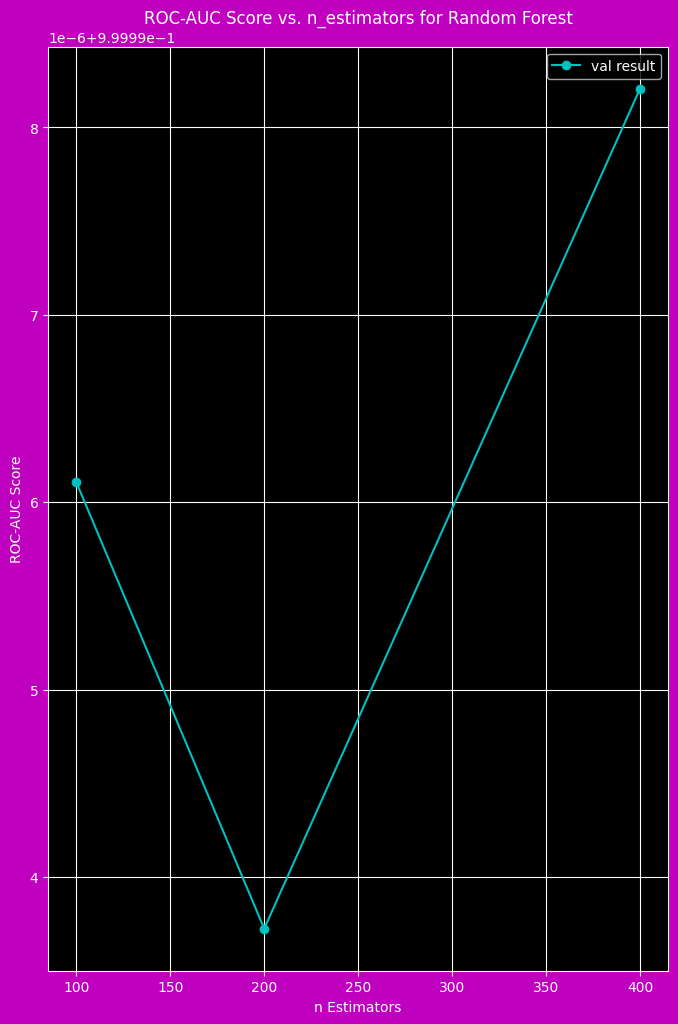





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9999961062422029, 0.9999937241704228, 0.9999982062265355]


Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9999982062265355
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

================================================Random Forest:==============================================
n_estimators = 10


NameError: ignored

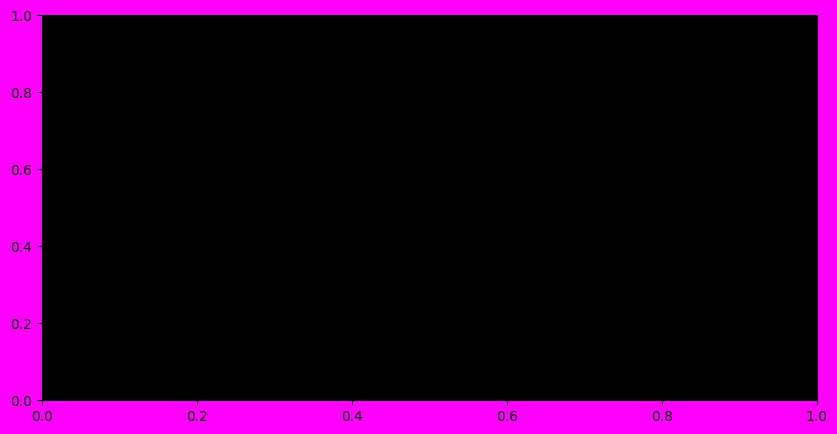

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining your values of n_estimators

n_values = [10, 50, 100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

NameError: ignored

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining your values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("\n")
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val dat

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])
print("\n")


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")

for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")

for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

##**Observations**

#**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

* **Logistic Regresion** {'C': 4, 'penalty': 'l2'} =
   *  **Best Mean ROC-AUC score for val data:**  **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean precision val score for best C:**   **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean recall val score for best C:**      **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
   *  **Mean f1 val score for best C:**          **[Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**


---
* **KNeighborsClassifier** {'n_neighbors': 9} =
   *  **0.9998373276002304 [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = 0.9274613536399045]**


---
* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
   * **Not computed due to very large training time** **[Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]**


---
* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
   * **Best Mean ROC-AUC score for val data:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean precision val score for best Max Depth:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean recall val score for best Max Depth:** **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
   * **Mean f1 val score for best Max Depth:**  **[Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  

---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
   * **1.0** **[Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **Best Mean ROC-AUC score for val data:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =]**
  * **Mean precision val score for best Learning Rate:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean recall val score for best Learning Rate:** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean f1 val score for best Learning Rate: ** **[Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**


---



**Proceeding with the model that shows the best results**

**Applying the best hyperparameter on the model**

**Predicting on the test dataset**

In [ ]:
X_test_saved.head()

In [ ]:
y_test_saved.head()

In [ ]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
# Defining the RandomOverSampler

smote = over_sampling.SMOTE(random_state=0)

# Resampling the training data using RandomOverSampler

X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predict on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results
print("\n")
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

In [ ]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")
print("F1 Score on Test Set =", f1)
print("\n")
print("Precision on Test Set =", preci_sion)
print("\n")
print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

#**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **LogisticRegression ROC-AUC Score on Test Set = [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression F1-Score on Test Set =     [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression Precision on Test Set =  [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} =      ]**
  * **LogisticRegression Recall on Test Set =     [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**


---

* **KNeighborsClassifier** {'n_neighbors': 9} =
  * **KNeighbors Classifier ROC-AUC Score on Test Set = [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier F1-Score on Test Set =  [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Precision on Test Set =  [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Recall on Test Set = [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9701114653796241]**
  * **Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8121827411167513]**
  * **Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8080808080808081]**
  * **Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8163265306122449 ]**

---
* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =
 * **Decision Tree Classifier ROC-AUC Score on Test Set =  [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier F1-Score on Test Set =  [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Precision on Test Set = [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Recall on Test Set =  [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**


---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **Random Forest Classifier ROC-AUC Score on Test Set =  [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier F1-Score on Test Set =  [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Precision on Test Set =  [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Recall on Test Set =  [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **XGBOOST Classifier ROC-AUC Score on Test Set = [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier F1-Score on Test Set =  [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Precision on Test Set =  [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Recall on Test Set =  [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =  ]**


##**Observations**
* **Based on ROC-AUC Scores-**
  * **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**
  * **LogisticRegression score decreased. But, the best model is XGBClassifier**


---

* **Based on F1 Scores-**
  * **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.**
  * **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'metric': 'manhattan', 'n_neighbors': 9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

**Printing the important features of the best model to understand the dataset**
* **This will not give much explanation on the already transformed dataset**
* **But it will help us in understanding if the dataset is not PCA transformed**

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)

print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print("\n")
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print("\n")
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**III. ADASYN(Adaptive Synthetic)**

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

In [ ]:
# Defining the ADASYN

ada = over_sampling.ADASYN(random_state=0)

# Resampling the training data using ADASYN

X_adasyn_train_pt, y_adasyn_train_pt = ada.fit_resample(X_train_pt, y_train_pt)


**Printing the class distribution after applying ADASYN**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from adasyn are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from adasyn, we do

X_adasyn_train_pt_1 = X_adasyn_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 0], X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##**SOME MORE VISUALIZATION**

* **Checking the distribution of our target variable: We use value_counts() method to check the distribution of our target variable.**
* **y_ros_train_pt is our target variable, we can use the following code to check the distribution of its values:**

In [ ]:
print(y_adasyn_train_pt.value_counts())

In [ ]:
import seaborn as sns

sns.countplot(x=y_adasyn_train_pt)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_adasyn_train_pt[:,0])

#**Building models on other algorithms to see the better performing on ADASYN**



#**1. Performing Logistic Regression**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Defining values of C

C_values = [0.1, 0.5, 1, 2, 4]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of C

for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for Logistic Regression classifier for val data

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for  and val data for all values of C

print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Defining the logistic regression parameters for Stratified K-fold cross-validation

params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Defining the logistic regression classifier

logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        #pre_dispatch=6, # preventing explosion of consumption of memory
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# Printing the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**2. Performing KNN Classifier**


**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Defining  values of K (number of neighbors)

K_values = [3, 5, 7, 9]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of K

for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores and mean false positive rates for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of k

    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plotting ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for train and val data for all values of K

print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)
print("\n")

# Finding the index of maximum mean ROC-AUC score for val data

if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")

print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Defining the KNN parameters for Stratified K-fold cross-validation

params = {'n_neighbors': [9]}

# Defining the KNN classifier

knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True)

# Fiting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)


In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination
print("Mean test scores:")

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

# **3. Performing SVM Classifier**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

#**4. Performing Decision Tree**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Defining values of max_depth

max_depth_values = [1, 2, 3, 4, 5]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of max_depth

for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        # Creating a decision tree classifier with the specified max_depth value

        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plotting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printting mean ROC-AUC scores for val data for all values of Max Depth

print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {'max_depth': [6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Defining the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)


In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**5. Performing Random Forest**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Defining values of n_estimators

n_values = [100, 200, 400]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Setting facecolor to black for dark background
ax2.set_facecolor('black')

# Looping through each value of n_estimators

for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of n_estimators

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plotting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs n_estimators

    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of n Estimators

print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Defining the parameters to be tuned

params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }

# Defining the Random Forest classifier

rf_classifier = RandomForestClassifier()

start_time = time.time()

# Creating a GridSearchCV object with stratified cross-validation

start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = skf,
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Printing the evaluation result by choosing a evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#**6. Performing XGBoost**

**A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Defining values of C

learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initializing lists to store mean ROC-AUC scores and mean false positive rates for val data

mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Setting facecolor to black for dark background

# Setting background color for subplots

ax2.set_facecolor('black')

# Looping through each value of C

for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Performing cross-validation

    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculating mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("\n")
    print("Mean precision val score:", mean_precision_val)
    print("\n")
    print("Mean recall val score:", mean_recall_val)
    print("\n")
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Ploting ROC curve for the current value of C

    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Ploting ROC curve for random classifier

ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Setting labels and title for ROC curves

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Adding grid to the plot

# Showing the plot

plt.show()

print("============================================================================================================")

# Setting plot style and figure size

with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plotting ROC-AUC scores vs C

    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Printing mean ROC-AUC scores for val data for all values of learning_rate_values

print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Finding the index of maximum mean ROC-AUC score for val data

best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("\n")
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("\n")
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("\n")
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("\n")
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")


**B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score**

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Defining the XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Creating a GridSearchCV object with stratified Cross validation

model_GridSearch = GridSearchCV(xgb_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Fitting the GridSearchCV object and perform hyperparameter tuning on the resampled data

model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

# printing the evaluation result by choosing an evaluation metric

print('Best ROC AUC score: ', model_GridSearch.best_score_)
print("\n")

# printing the optimum value of hyperparameters

print('Best hyperparameters: ', model_GridSearch.best_params_)
print("\n")

In [ ]:
cv_results = model_GridSearch.cv_results_

# Printing the mean test scores for each hyperparameter combination

print("Mean test scores:")
print("\n")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Printing the rank of each hyperparameter combination based on mean test score

print("\nRank of each hyperparameter combination:")
print("\n")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Printing the standard deviation of test scores for each hyperparameter combination

print("\nStandard deviation of test scores:")
print("\n")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

##**Observations**

##**A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **Best Mean ROC-AUC score for val data: [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean precision val score for best C:  [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean recall val score for best C:    [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**
  * **Mean f1 val score for best C:        [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = ]**


---

* **KNeighborsClassifier** {'n_neighbors': 9} =
  * ** [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]**


---

* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
  * **Best Mean ROC-AUC score for val data: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =]**
  * **Mean precision val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  * **Mean recall val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
  * **Mean f1 val score for best Max Depth: [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**

---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **[Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = ]**


---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =
  * **Best Mean ROC-AUC score for val data:  [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean precision val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean recall val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **Mean f1 val score for best Learning Rate: [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**

---



##**Observations**

**Selecting the oversampling method which shows the best result on a model**

  * **Applying the best hyperparameter on the model**
  * **Predicting on the test dataset**



In [ ]:
X_test_saved.head()

In [ ]:
y_test_saved.head()

In [ ]:
scaler = RobustScaler()

# Transforming the test data

X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
# Defining the ADASYN

ada = over_sampling.ADASYN(random_state=0)

# Resampling the training data using ADASYN

X_test_saved_adasyn, y_test_saved_adasyn = ada.fit_resample(X_test_saved,y_test_saved)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialising the model with optimum hyperparameters

start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 4, min_samples_split = 2)
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predicting on test set to give probability

y_pred_proba = clf.predict_proba(X_test_saved_adasyn)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])

print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf.predict(X_test_saved_adasyn)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

In [ ]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)

print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("\n")
print("F1 Score on Test Set =", f1)
print("\n")
print("Precision on Test Set =", preci_sion)
print("\n")
print("Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

##**B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set**

* **LogisticRegression** {'C': 4, 'penalty': 'l2'} =
  * **LogisticRegression ROC-AUC Score on Test Set = [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression F1-Score on Test Set = [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} =]**
  * **LogisticRegression Precision on Test Set = [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**
  * **LogisticRegression Recall on Test Set = [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = ]**



---



* **KNeighborsClassifier** {'n_neighbors': 9} =
  * **KNeighbors Classifier ROC-AUC Score on Test Set =  [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier F1-Score on Test Set =  [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Precision on Test Set =  [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**
  * **KNeighbors Classifier Recall on Test Set =  [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = ]**


---

* **SVM.SVC** {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =
  * **Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = ]**
  * **Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =  ]**

---

* **DecisionTreeClassifier** {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =
 * **Decision Tree Classifier ROC-AUC Score on Test Set =  [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier F1-Score on Test Set = [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Precision on Test Set = [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**
 * **Decision Tree Classifier Recall on Test Set = [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = ]**


---

* **RandomForestClassifier** {'min_samples_split': 5, 'n_estimators': 500} =
  * **Random Forest Classifier ROC-AUC Score on Test Set =  [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier F1-Score on Test Set =  [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Precision on Test Set =  [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**
  * **Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = ]**

---

* **XGBClassifier** {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}
  * **XGBOOST Classifier ROC-AUC Score on Test Set =  [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier F1-Score on Test Set =  [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Precision on Test Set =  [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = ]**
  * **XGBOOST Classifier Recall on Test Set =  [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =  ]**

##**Observations**

* **Based on ROC-AUC Scores-**
  * **KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.**
  * **LogisticRegression score decreased. But, the best model is XGBClassifier**
* **Based on F1 Scores-**
  * **LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.
  * **RandomForestClassifier score decreased. But, the best model is XGBClassifier**

#**Table Of Scores**

<table>
<tr>
<th>Model</th><th>Parameters</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>KNeighborsClassifier</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SVM</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Decision Tree</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>Random Forest</th><th>{'min_samples_split': 5, 'n_estimators': 500}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>XGBoost</th><th>{'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

##**Observations**

* **1. Model sensitivity: Some models may be more sensitive to the effects of oversampling than others.**

 **For example, decision trees may be less affected by oversampling than linear models.**

* **2. Overfitting: The oversampled data may introduce too much noise and overfit the model to the training data.**

 **This can result in poor generalization performance on new, unseen data.**

**Printing the important features of the best model to understand the dataset**
  * **This will not give much explanation on the already transformed dataset**
  * **But it will help us in understanding if the dataset is not PCA transformed**

In [ ]:
clf.feature_importances_

In [ ]:
np.sort(clf.feature_importances_)

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])


X_train_pt_1 = X_train_pt[y_train_pt == 1.0]
X_train_pt_0 = X_train_pt[y_train_pt == 0.0]

np.random.shuffle(X_train_pt_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_pt_1[:, top_var_index], X_train_pt_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], top_var_index], X_train_pt_0[:X_train_pt_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#**Model For each Type of OverSampling**

#**1. Logistic Regression**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>Logistic Regression</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>Logistic Regression</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>Logistic Regression</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>Logistic Regression</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**2. KNeighbors Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>KNeighbors Classifier	</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>KNeighbors Classifier	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>KNeighbors Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>KNeighbors Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**3. SVM.SVC**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>SVM.SVC	</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>SVM.SVC	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>SVM.SVC	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>SVM.SVC	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**4. DecisionTree Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>DecisionTree Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>DecisionTree Classifier		</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>DecisionTree Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>DecisionTree Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**5. RandomForest Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>RandomForest Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>RandomForest Classifier	</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>RandomForest Classifier	</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>RandomForest Classifier	</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

#**6. XGB Classifier**

<table>
<tr>
<th>Type of Oversampling</th><th>Model</th><th>Parameter</th><th>ROC-AUC Score	</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>None</th><th>XGB Classifier		</th><th>{'C': 4, 'penalty': 'l2'}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ROS</th><th>XGB Classifier</th><th>{'n_neighbors': 9}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>SMOTE</th><th>XGB Classifier</th><th>{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
<tr>
<th>ADASYN</th><th>XGB Classifier</th><th>{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	</th><th>ROC-AUC Score</th><th>F1-Score</th><th>Precision</th><th>Recall</th>
</tr>
</table>

##**Observation**


* **Selecting the oversampling method which shows the best result on a model**

* **Using the best models to Predict on the test dataset**

In [ ]:
# performing the best oversampling method on X_train & y_train

from sklearn.metrics import f1_score, precision_score, recall_score


print("============================================================================================================")
print("\n")

#**Logistic Regression**

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_LogisticRegression = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf_LogisticRegression.fit(X_train_pt, y_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_LogisticRegression.predict_proba(X_test_saved)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])

print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_LogisticRegression.predict(X_test_saved)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)

# printing the results

print("LogisticRegression F1-Score on Test Set =", f1)
print("\n")
print("LogisticRegression Precision on Test Set =", preci_sion)
print("\n")
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")


#**KNeighbors Classifier**

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf_KNeighborsClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_KNeighborsClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_KNeighborsClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("\n")
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("\n")
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

#**DecisionTree Classifier**

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_DecisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf_DecisionTreeClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_DecisionTreeClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_DecisionTreeClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("\n")
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")
print("============================================================================================================")

#**XGB Classifier**

In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_XGBClassifier = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc')
clf_XGBClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_XGBClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_XGBClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("\n")
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("\n")
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

#**RandomForest Classifier**


In [ ]:
# initialising the model with optimum hyperparameters

start_time = time.time()
clf_RandomForestClassifier = RandomForestClassifier(min_samples_split=5, n_estimators=500)
clf_RandomForestClassifier.fit(X_smote_train_pt, y_smote_train_pt)

# predicting on test set to give probability

y_pred_proba = clf_RandomForestClassifier.predict_proba(X_test_saved_smote)

# calculating the ROC-AUC score

roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])

print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)

# predicting on test set to get the class labels

y_pred = clf_RandomForestClassifier.predict(X_test_saved_smote)

# calculating the F1-score, precision, and recall

f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)

# printing the results

print("Random Forest Classifier F1-Score on Test Set =", f1)
print("\n")
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("\n")
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("\n")
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("\n")

print("============================================================================================================")

#**Conclusion**

* **Best Oversampling Technique and Hyper Parameter for Each model**
  * **Best LogisticRegression Model Performance: 0.9752271442 {'C': 0.01, 'penalty': 'l2'} [None]**
  * **Best KNeighborsClassifier Model Performance: 0.9520626163 {'metric': 'manhattan', 'n_neighbors': 9} [SMOTE]**
  * **Best svm.SVC Model Performance: NA [Due to High Training Time]**
  * **Best DecisionTreeClassifier Model Performance: 0.9484931499 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} [SMOTE]**
  * **Best RandomForestClassifier Model Performance: 0.9788061953689164 {'min_samples_split': 5, 'n_estimators': 500} [SMOTE]**
  * **Best XGBClassifier Model Performance: 0.9921570289753232 {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} [SMOTE]**

#**Best Model is XGBOOST CLassifier with SMOTE: 0.992157029**

**Printing the FPR,TPR & selecting the best threshold from the roc curve**

**To choose the best threshold we will create a data frame with columns "actual_label" and "predicted_prob" on training data**

In [ ]:
y_train_pred = clf_XGBClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

In [ ]:
# finding the best threshold best on roc_curve to know the range for search

fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [ ]:
# Creating columns with different probability cutoffs

thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

In [ ]:
# calculating Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

In [ ]:
# Formula for f1 = (2*precision*recall)/(precision+recall)

f1 = (2*0.994203*0.997093)/(0.994203+0.997093)
print(f1)

**The Threshold of "0.9880" gives a Precision of 99.42% and F1 Score of 99.56% on Training data. Let see these scores on test**

In [ ]:
y_test_pred= clf_XGBClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.9880 else 0)
y_df.head()

In [ ]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("\n")
print("Recall:",recall)
print("\n")
print("F1 Score:",f1)
print("\n")

**We will be using this threshold as High Precision is good in predicting "Actual possitives as True Possitives".**